<a href="https://colab.research.google.com/github/Pramathesh1/Capstone-3-MobilePriceRange-Classification/blob/main/Mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Mobile Price Range Classification**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

This classification project aimed to predict the price range of mobile phones based on features such as battery power, RAM, internal memory, and screen size. The project was carried out in several steps, including preliminary data exploration and data wrangling, exploratory data analysis and data visualization, hypothesis testing, feature engineering, model implementation, and use of explainability tool.

In the first step, the dataset was explored to identify any missing or erroneous data points, and data wrangling techniques were employed to clean the dataset. Exploratory data analysis was then conducted to identify any patterns or trends in the data. The analysis revealed that RAM was the main feature to affect the mobile phone price range.

Hypothesis testing was performed to validate the observations of the EDA phase. Hypothesis testing was conducted to determine whether there was a significant impact on the output by the features of RAM, battery power and 4G connectivity. The results showed that RAM and battery power did have a significant impact on the output, but output was not affected significantly by 4G connectivity.

In the next step, feature engineering was performed to modify existing features that would improve the predictive performance of the model. Then, the features were separated into dependent and independent variables to make it easier for model implementation. Also the data was scaled for linear regression.

Four different classification models were trained and evaluated on the dataset, namely Decision Tree, Random Forest, XGBoost and K-Nearest Neighbor (KNN). The evaluation metrics used were accuracy, precision, recall, F1-score, and the Area Under the Receiver Operating Characteristic Curve (AUC-ROC). The results showed that KNN outperformed the other models, achieving the highest accuracy, precision, recall, F1-score, and AUC-ROC. The hyperparameters of each model were also tuned using grid search to identify the optimal hyperparameters.

The hyperparameters of each model were also tuned using grid search to identify the optimal hyperparameters. The KNN model was also tuned using grid search. The results showed that the KNN model achieved an accuracy of 92.53% and roc-auc score 99.05% before tuning and accuracy 92.96% and roc_auc score 99.16% meaning there is very less, almost negligible improvement in performance of model. Added to that, the tuned KNN model overfits with 100% accuracy on train set. So using tuned KNN model is not recommended.

To gain insights into the factors that influenced mobile phone price range, feature importance analysis was conducted using the SHapley Additive exPlanations (SHAP) method. The analysis revealed that RAM was the most important feature in predicting mobile phone price range, followed by battery power, pixel width and pixel height. The force plots also explained how the probability of getting each class as output is affected by which feature and what impact the features have on the output.

In conclusion, this project demonstrates the effectiveness of machine learning techniques in analyzing and predicting complex systems such as mobile phone pricing. The KNN model outperformed other models, and RAM was identified as the most important feature for accurate predictions. The findings of this project can be used by mobile phone manufacturers to optimize their pricing strategies and to develop mobile phones with the desired features to meet customer demands. Overall, this project highlights the importance of data preprocessing, feature engineering, and explainability tools in developing accurate and interpretable machine learning models.


# **GitHub Link -**

https://github.com/Pramathesh1/Capstone-3-MobilePriceRange-Classification.git

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.5 MB/s eta 0:00:00


In [ ]:
# importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML
from pandas.api.types import CategoricalDtype

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.inspection import permutation_importance
from scipy import stats
from scipy.stats import chi2_contingency
import shap

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data into pandas dataframe
file_location = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Classification Capstone Project/data_mobile_price_range.csv'
df = pd.read_csv(file_location, encoding='latin-1')

### Dataset First View

In [ ]:
# display setting 
pd.set_option('display.max_columns', None)
# printing the dataset
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
1       0.7        136        3   6        905      1988  2631    17     3   
2       0.9        145        5   6       1263      1716  2603    11     2   
3       0.8        131        6   9       1216      1786  2769    16     8   
4       0.6        141        2  14       1208      1212  1411     8     2   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

### Dataset Rows & Columns count

In [ ]:
# dataset dimensions
df.shape

(2000, 21)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
df.duplicated().sum()

0

No duplicate rows found so we proceed.

#### Checking Null values

In [ ]:
# checking null values in each column
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

The dataset has no null values in any column.

### What did you know about your dataset?

The dataset contains information on 2,000 mobile phones, including features such as battery power, RAM, camera quality, clock speed, mobile height and depth, screen size and internal memory. The dataset also includes a target variable indicating the price range of each phone, which is classified into four categories: low cost, medium cost, high cost, and very high cost.

It has 21 columns and 2000 rows.  There are no mising values and duplicate values in the dataset. 

## ***2. Understanding Your Variables***

In [ ]:
# getting statistical info on the columns
df.describe(include = 'all')

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

### Variables Description 

* #### Battery_power - Total energy a battery can store in one time measured in mAh
* #### Blue - Has bluetooth or not
* #### Clock_speed - speed at which microprocessor executes instructions
* #### Dual_sim - Has dual sim support or not
* #### Fc - Front Camera mega pixels
* #### Four_g - Has 4G or not
* #### Int_memory - Internal Memory in Gigabytes
* #### M_dep - Mobile Depth in cm
* #### Mobile_wt - Weight of mobile phone
* #### N_cores - Number of cores of processor
* #### Pc - Primary Camera mega pixels
* #### Px_height - Pixel Resolution Height
* #### Px_width - Pixel Resolution Width
* #### Ram - Random Access Memory in Mega Bytes
* #### Sc_h - Screen Height of mobile in cm
* #### Sc_w - Screen Width of mobile in cm
* #### Talk_time - longest time that a single battery charge will last when you are
* #### Three_g - Has 3G or not
* #### Touch_screen - Has touch screen or not
* #### Wifi - Has wifi or not
* #### Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### Check Unique Values for each variable.

In [ ]:
# print all columns in the dataset
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


## ***3. Data Wrangling***

### Renaming Columns

Few of the column in the dataset have confusing names like "fc". So we rename these and give proper name.

In [ ]:
# renaming columns
df.rename(columns={'blue':'bluetooth', 'fc':'front_camera','m_dep':'mobile_depth', 'pc':'primary_camera', 'sc_h':'screen_height', \
                   'sc_w':'screen_width',}, inplace=True)

In [ ]:
df.head()

battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0            842          0          2.2         0             1       0   
1           1021          1          0.5         1             0       1   
2            563          1          0.5         1             2       1   
3            615          1          2.5         0             0       0   
4           1821          1          1.2         0            13       1   

   int_memory  mobile_depth  mobile_wt  n_cores  primary_camera  px_height  \
0           7           0.6        188        2               2         20   
1          53           0.7        136        3               6        905   
2          41           0.9        145        5               6       1263   
3          10           0.8        131        6               9       1216   
4          44           0.6        141        2              14       1208   

   px_width   ram  screen_height  screen_width  talk_time  three_g  \
0       756  2549              9             7         19        0   
1      1988  2631             17             3          7        1   
2      1716  2603             11             2          9        1   
3      1786  2769             16             8         11        1   
4      1212  1411              8             2         15        1   

   touch_screen  wifi  price_range  
0             0     1            1  
1             1     0            2  
2             1     0            2  
3             0     0            2  
4             1     0            1

### Checking zero values in non-binary columns

In [ ]:
# checking unique values in each column
for col in df:
    print('Unique values in ',col,':',df[col].unique())

Unique values in  battery_power : [ 842 1021  563 ... 1139 1467  858]
Unique values in  bluetooth : [0 1]
Unique values in  clock_speed : [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values in  dual_sim : [0 1]
Unique values in  front_camera : [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values in  four_g : [0 1]
Unique values in  int_memory : [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values in  mobile_depth : [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values in  mobile_wt : [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83

In [ ]:
# getting those columns which cannot have value as 0
non_zero_cols = ['battery_power','mobile_depth','mobile_wt','px_height','px_width','screen_height','screen_width']
for col in non_zero_cols:
  df = df[df[col]!=0]
df

battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0               842          0          2.2         0             1       0   
1              1021          1          0.5         1             0       1   
2               563          1          0.5         1             2       1   
3               615          1          2.5         0             0       0   
4              1821          1          1.2         0            13       1   
...             ...        ...          ...       ...           ...     ...   
1995            794          1          0.5         1             0       1   
1996           1965          1          2.6         1             0       0   
1997           1911          0          0.9         1             1       1   
1998           1512          0          0.9         0             4       1   
1999            510          1          2.0         1             5       1   

      int_memory  mobile_depth  mobile_wt  n_cores  primary_camera  px_height  \
0              7           0.6        188        2               2         20   
1             53           0.7        136        3               6        905   
2             41           0.9        145        5               6       1263   
3             10           0.8        131        6               9       1216   
4             44           0.6        141        2              14       1208   
...          ...           ...        ...      ...             ...        ...   
1995           2           0.8        106        6              14       1222   
1996          39           0.2        187        4               3        915   
1997          36           0.7        108        8               3        868   
1998          46           0.1        145        5               5        336   
1999          45           0.9        168        6              16        483   

      px_width   ram  screen_height  screen_width  talk_time  three_g  \
0          756  2549              9             7         19        0   
1         1988  2631             17             3          7        1   
2         1716  2603             11             2          9        1   
3         1786  2769             16             8         11        1   
4         1212  1411              8             2         15        1   
...        ...   ...            ...           ...        ...      ...   
1995      1890   668             13             4         19        1   
1996      1965  2032             11            10         16        1   
1997      1632  3057              9             1          5        1   
1998       670   869             18            10         19        1   
1999       754  3919             19             4          2        1   

      touch_screen  wifi  price_range  
0                0     1            1  
1                1     0            2  
2                1     0            2  
3                0     0            2  
4                1     0            1  
...            ...   ...          ...  
1995             1     0            0  
1996             1     1            2  
1997             1     0            3  
1998             1     1            0  
1999             1     1            3  

[1819 rows x 21 columns]

### What all manipulations have you done and insights you found?

Data wrangling is the process of cleaning, transforming, and preparing raw data into a format suitable for analysis or machine learning. At first the column names were found to have confusing names so these were changed into suitable names. Then there were few columns which should not have values as zero, e.g. screen width cannot be zero as every mobile has a screen. So we remove those columns where these variables have value as zero, after which the number of rows in the dataset becomes 1819 from 2000.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In this section, we visualize the data and explore the variables before going for model building.

In [ ]:
# setting seaborn theme
sns.set_theme()

#### Chart - 1 Distribution of Target variable

In [ ]:
df['price_range'].value_counts()

3    461
2    456
1    451
0    451
Name: price_range, dtype: int64

<Axes: ylabel='price_range'>

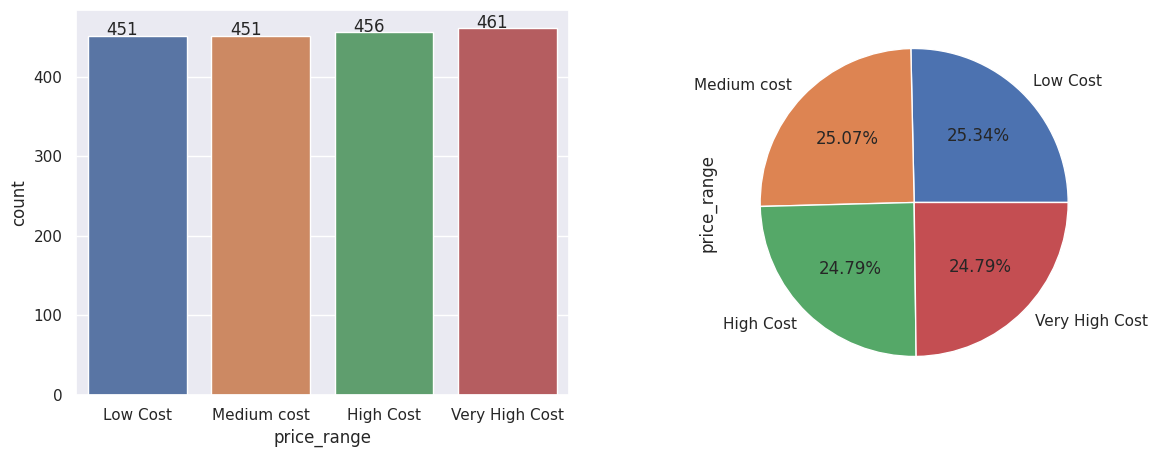

In [ ]:
# Chart - 1 visualization code
# creating labels for price range
label = ['Low Cost', 'Medium cost', 'High Cost', 'Very High Cost']
plt.figure(figsize=(14,5))
# subplot to print 2 plots side by side
plt.subplot(121)
ax = sns.countplot(x = df['price_range'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
ax.set_xticklabels(label)
plt.subplot(122)
df['price_range'].value_counts().plot(kind =  'pie',autopct = '%.2f%%', labels = label)

##### 1. Why did you pick the specific chart?

The target variable in the dataset is the "price_range" column. We go through the distribution of target variable here. Seaborn countplot is a type of categorical plot that shows the distribution of categorical data. It is a bar plot where the x-axis represents the categories and the y-axis represents the count of each category. The countplot is a powerful tool for visualizing the distribution of categorical data, and it can be used to compare the relative frequencies of different categories or to identify trends or patterns in the data. So we use the countplot to visualize the distribution of mobile price across the four ranges.

A pie chart is a type of data visualization that displays data as a circular graph, divided into slices or wedges that represent the proportion of each category in the dataset. Each slice is sized based on the percentage or proportion of the category it represents, with the total area of the chart representing 100% of the data. Pie plots are useful for visualizing the relative sizes of different categories in a dataset. So we use pie chart to see the proportion of mobiles belonging to the four categories.

##### 2. What is/are the insight(s) found from the chart?

The target variable has 4 categories. Data has 461 mobiles belonging to 'Very High cost',456 to 'High Cost' and 451 each to 'Medium Cost' and 'Low Cost'. These numbers are close to each other and so no imbalance in dataset is found. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This only tells about the distribution of target variable and there is no cause and effect relationship here. So it won't have any business impact.

### Chart 2 - Countplot and pieplot for Binary Categorical feature

In [ ]:
# separating binary and numeric features
binary_variable = ['bluetooth','dual_sim','four_g','three_g','touch_screen','wifi']
numeric_variable = [i for i in df.columns if i not in binary_variable][:-1]

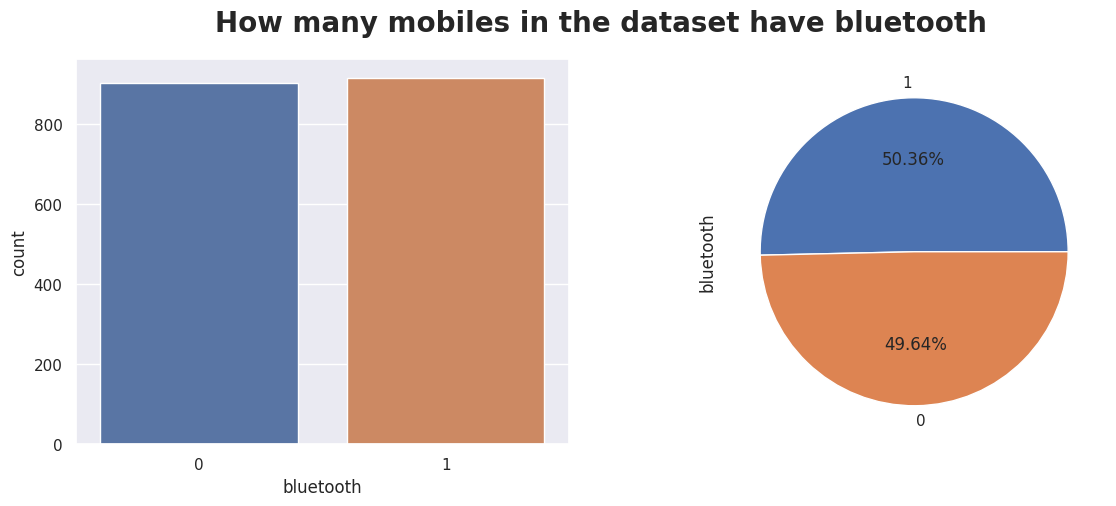

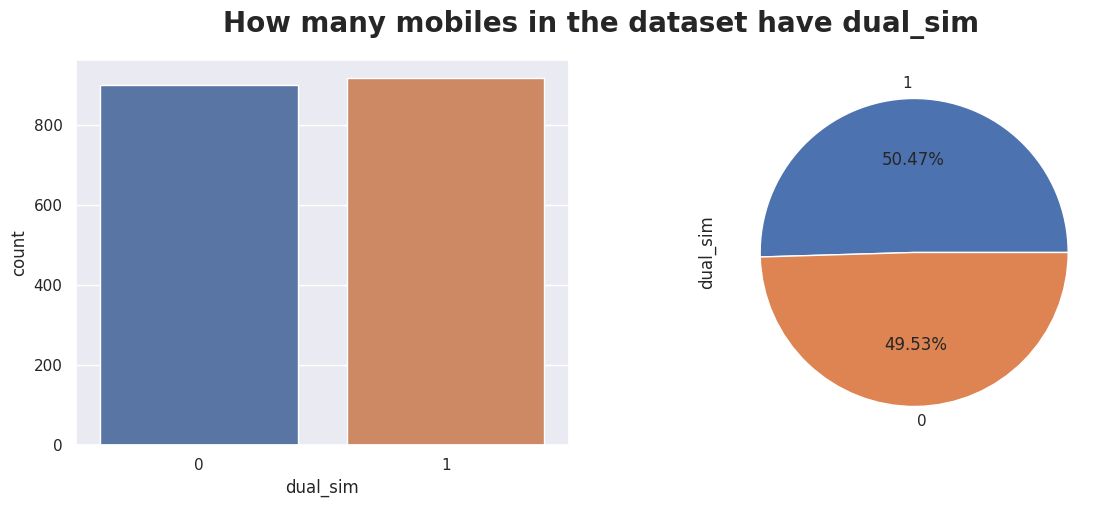

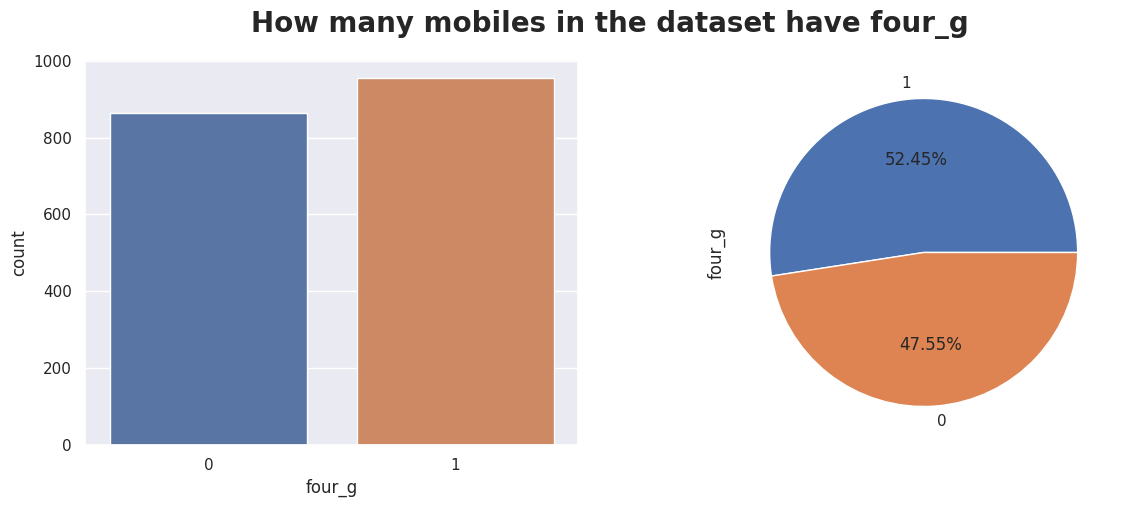

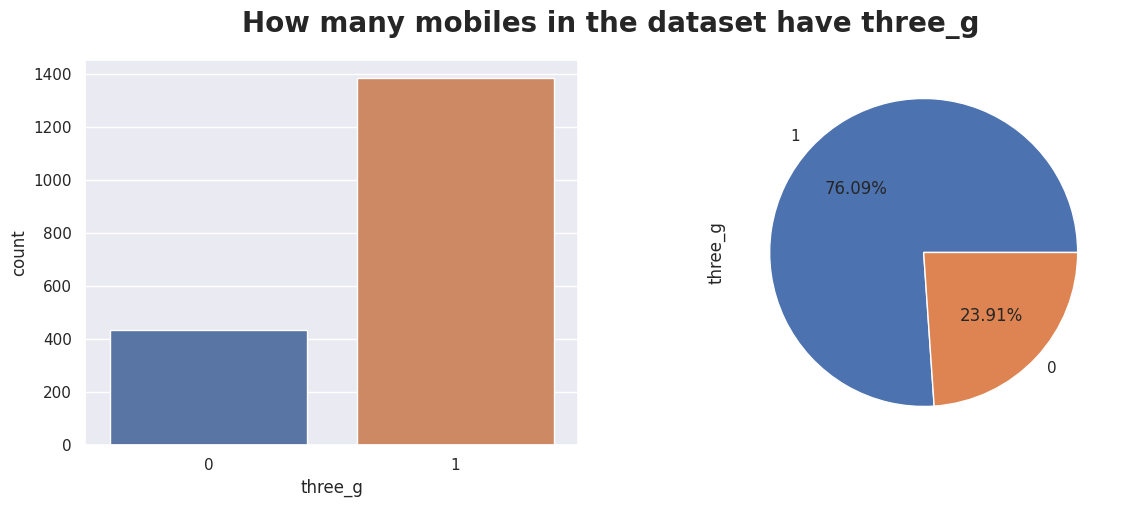

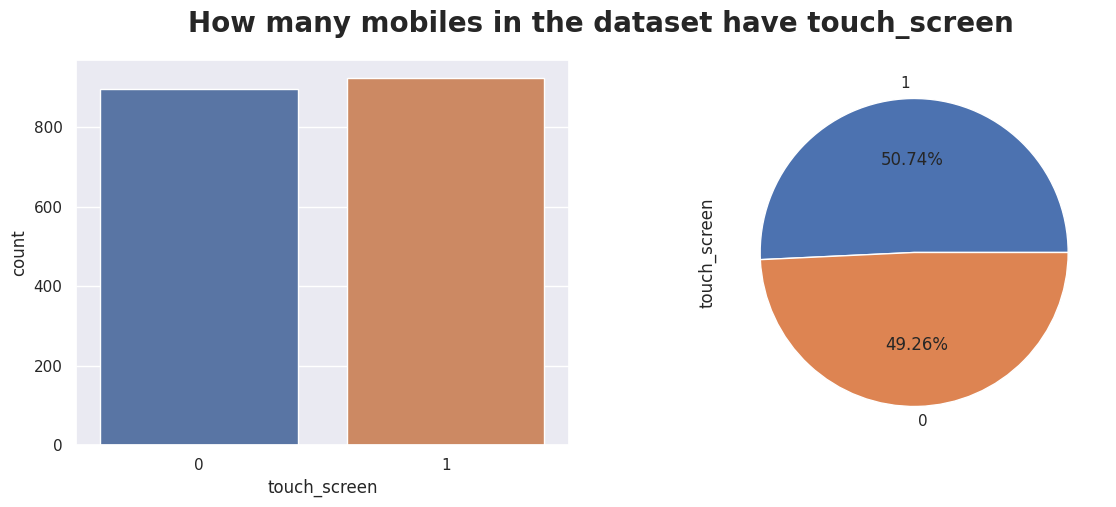

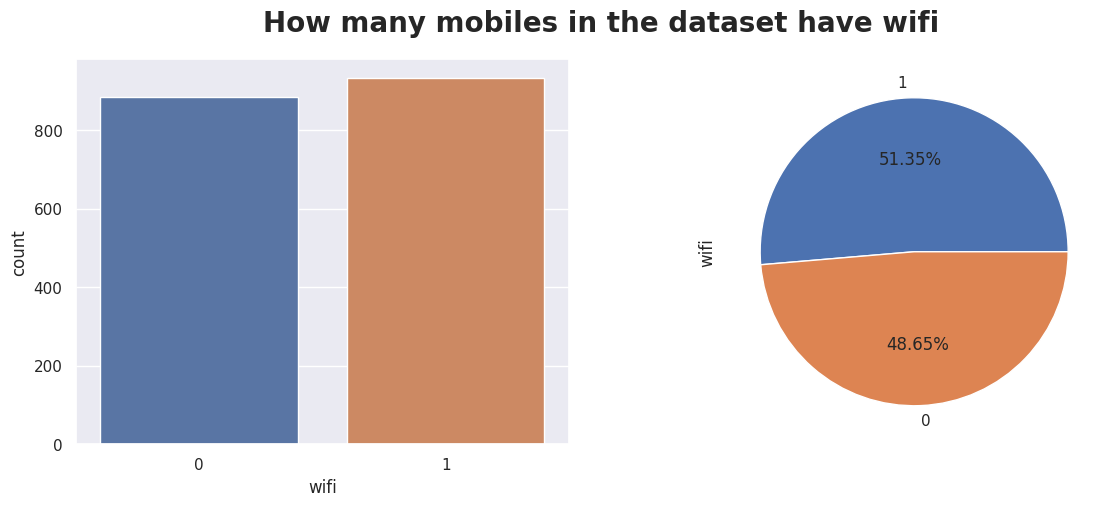

In [ ]:
# loop to plot for all binary features
for i in binary_variable:
  plt.figure(figsize=(14,5))
  plt.suptitle(f'How many mobiles in the dataset have {i}',fontsize=20,fontweight="bold")
  plt.tight_layout()
  plt.subplot(121)
  sns.countplot(data = df, x = i)
  plt.subplot(122)
  df[i].value_counts().plot(kind =  'pie',autopct = '%.2f%%')
  # plt.savefig(f"download{binary_variable.index(i)}.png")
  # files.download(f'download{binary_variable.index(i)}.png')
  plt.show()

##### 1. Why did you pick the specific chart?

We use the countplot to see the distribution of mobiles across the binary features i.e. for each feature, we plot what is the number of mobiles either having a particular feature or not having a particular feature. We also use the pie chart to see the proportion for same distribution.

The dataset has 6 binary categorical variables namely Bluetooth, Dual Sim, 3G, 4G, Touchscreen and Wifi, each having values 0, meaning not available, and 1, meaning available. We see distribution of data across these variables.

##### 2. What is/are the insight(s) found from the chart?

Binary features of 'bluetooth','dual_sim','four_g', 'touch_screen' and 'wifi' have almost equal distribution of mobiles on both 0 and 1 category. Only 'three_g' feature is skewed towards 1 meaning the dataset has more mobiles having 3G than mobiles not having 3G.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot only tells about the count of mobiles in the dataset having a particular feature or not. This won't be much useful. Still, businesses can get an idea about which features need to be added in a handset.

### Chart 3 - Distribution of mobiles across price range for binary features

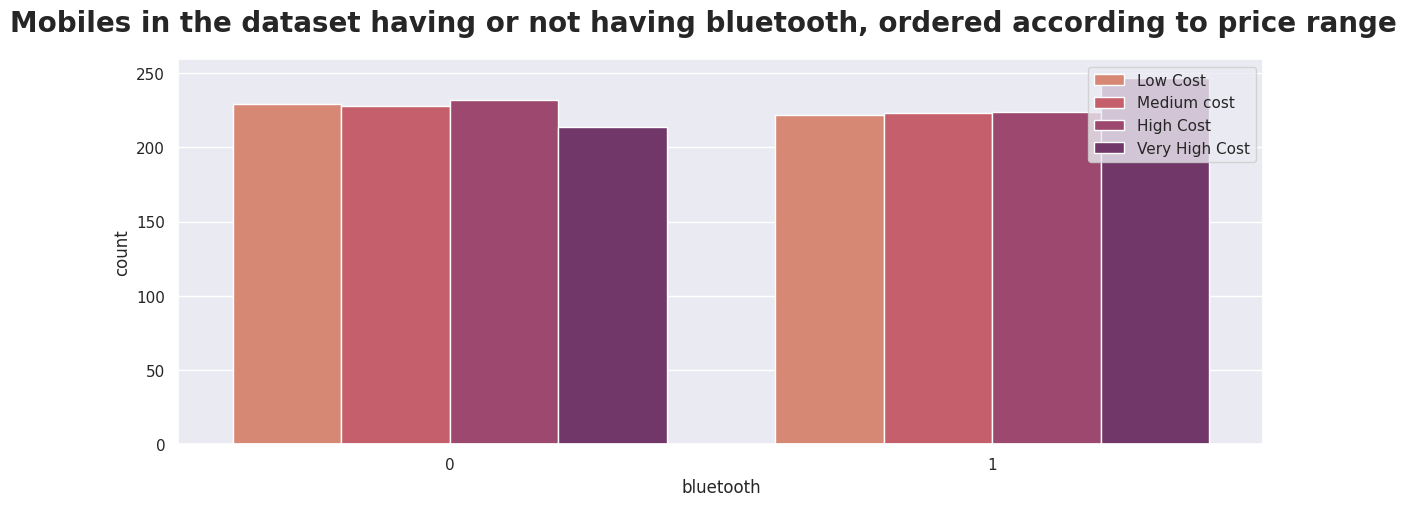

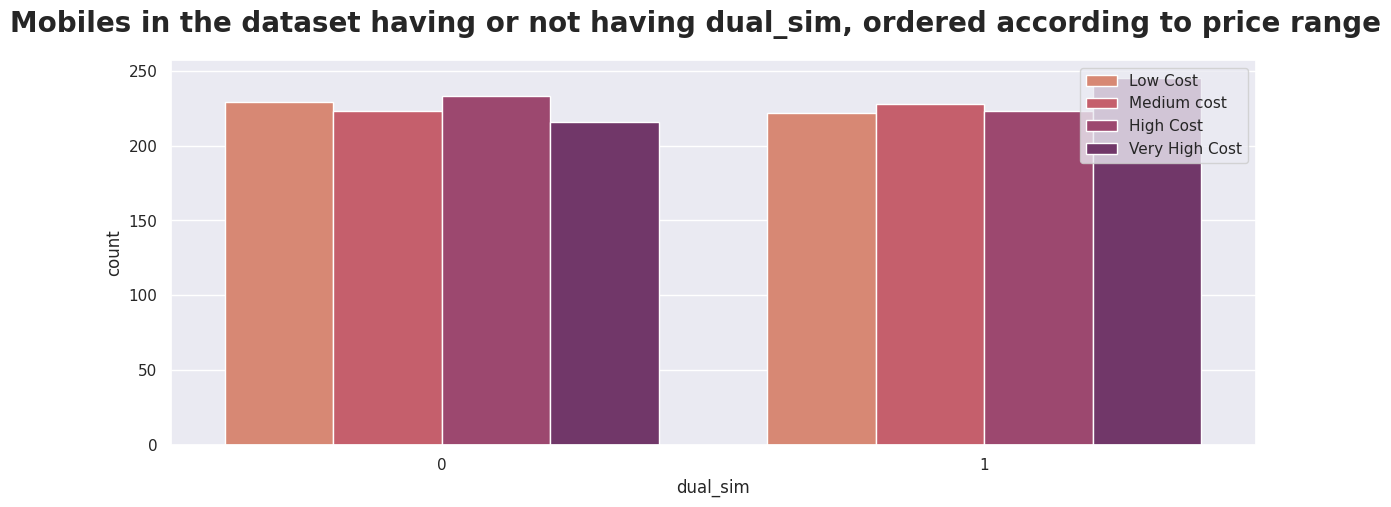

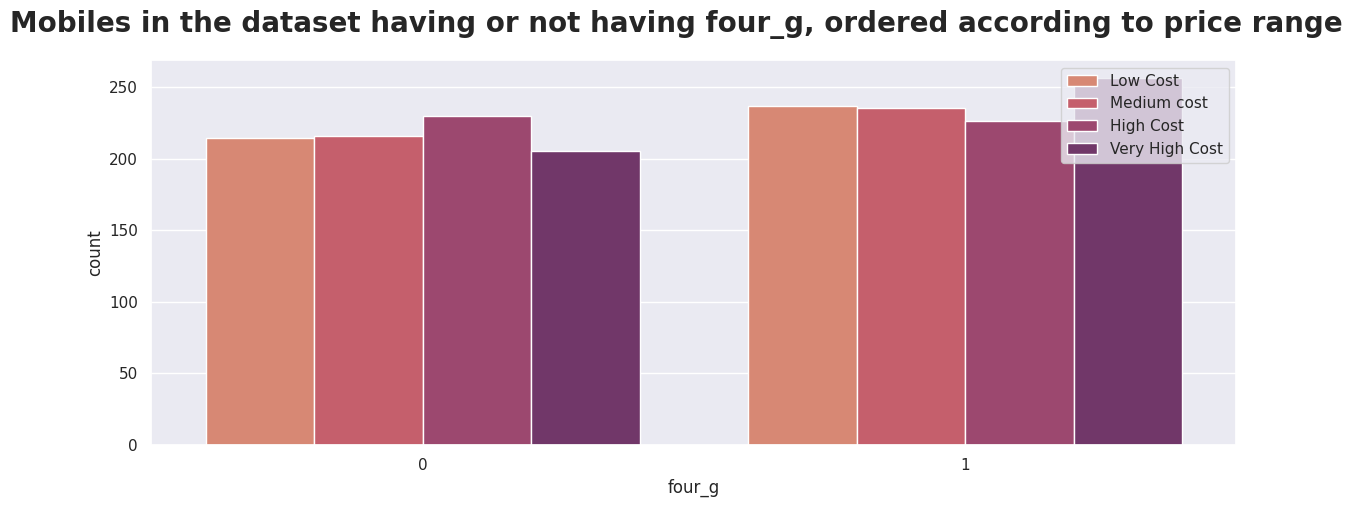

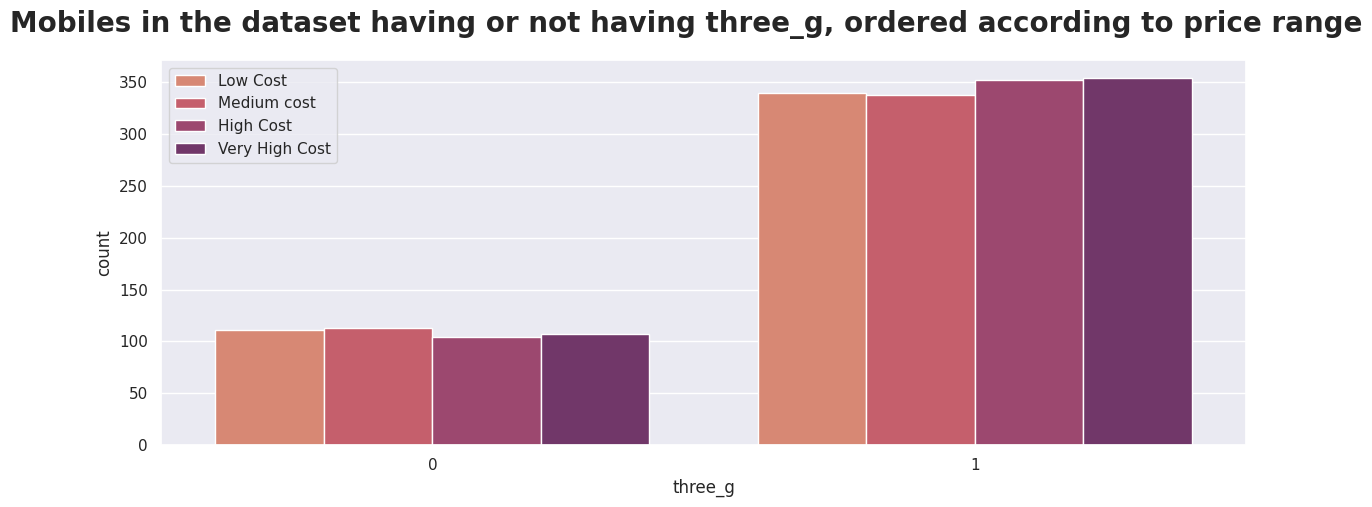

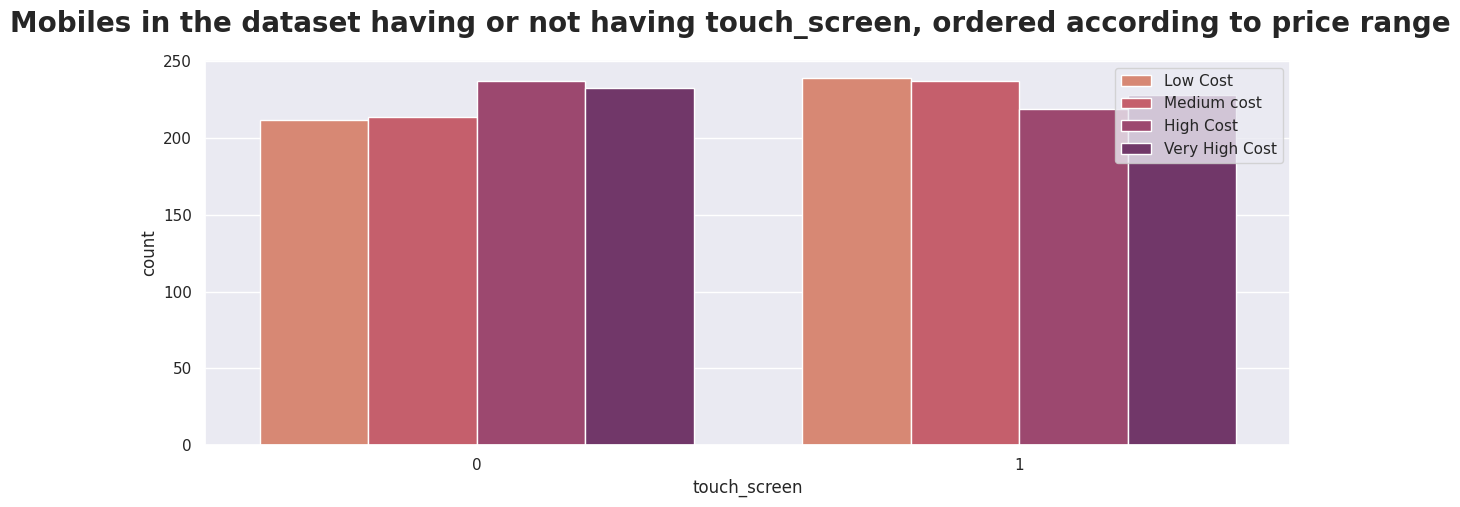

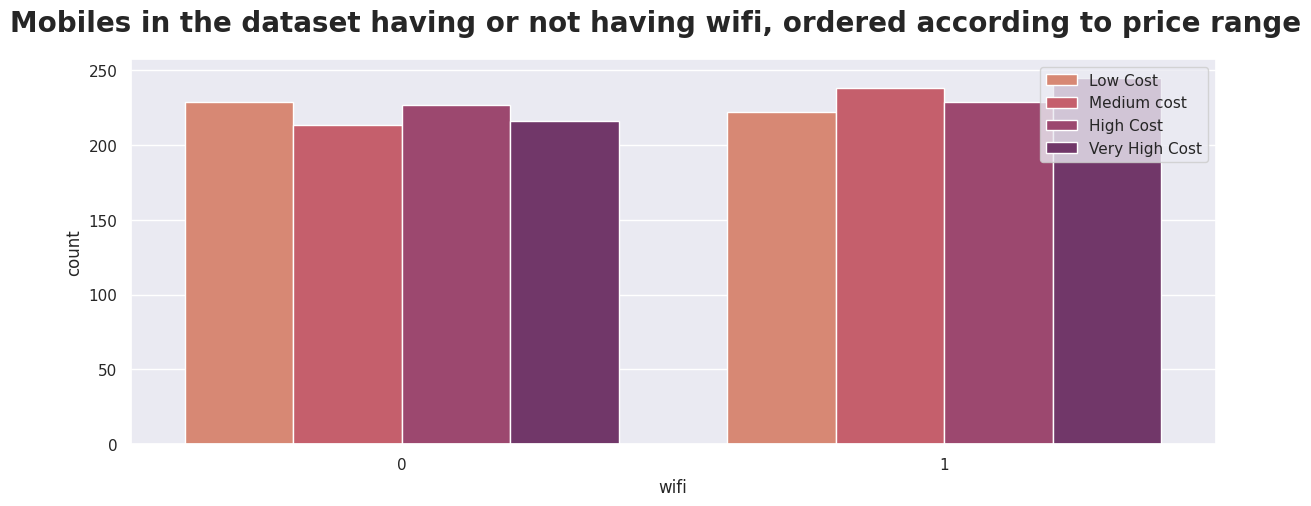

In [ ]:
for i in binary_variable:
  plt.figure(figsize=(14,5))
  plt.suptitle(f'Mobiles in the dataset having or not having {i}, ordered according to price range',fontsize=20,fontweight="bold")
  ax = sns.countplot(data = df, x = i, hue = 'price_range', palette = 'flare')
  ax.legend(label)
  # plt.savefig(f"download{binary_variable.index(i)}.png")
  # files.download(f'download{binary_variable.index(i)}.png')
  plt.show()

##### 1. Why did you pick the specific chart?

We use the countplot to see if the presence or absence of a particular feature affects the price. For that we plot the count of mobiles having and not having a feature which are separated by price range. This can tell if having or not having a feature affects the price of mobile.

##### 2. What is/are the insight(s) found from the chart?

The price of mobile is mostly unaffected by a single feature only. As we can see in each plot, we have almost equal amount of mobiles in each price range indicating that the presence or absence of a feature is not affecting the price. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since a single feature cannot describe the price of mobile, this plot is also not much useful from business perspective as companies cannot decide the price of mobile based on this plot.

### Chart 3 - Distribution of mobiles across price range for binary features

A single feature cannot describe the price of mobile. Now we plot the count of mobiles if it has all the 6 binary features of bluetooth, dual sim, 4G, 3G, touchscreen and wifi.

In [ ]:
# checking rows that have all binary features as 1
df[binary_variable][df[binary_variable].prod(axis = 1)==1]

bluetooth  dual_sim  four_g  three_g  touch_screen  wifi
25            1         1       1        1             1     1
70            1         1       1        1             1     1
80            1         1       1        1             1     1
84            1         1       1        1             1     1
160           1         1       1        1             1     1
...         ...       ...     ...      ...           ...   ...
1898          1         1       1        1             1     1
1923          1         1       1        1             1     1
1932          1         1       1        1             1     1
1980          1         1       1        1             1     1
1999          1         1       1        1             1     1

[68 rows x 6 columns]

We have 73 number of mobiles that have all the 6 features. Now we plot the distribution of those 73 mobiles according to price range.

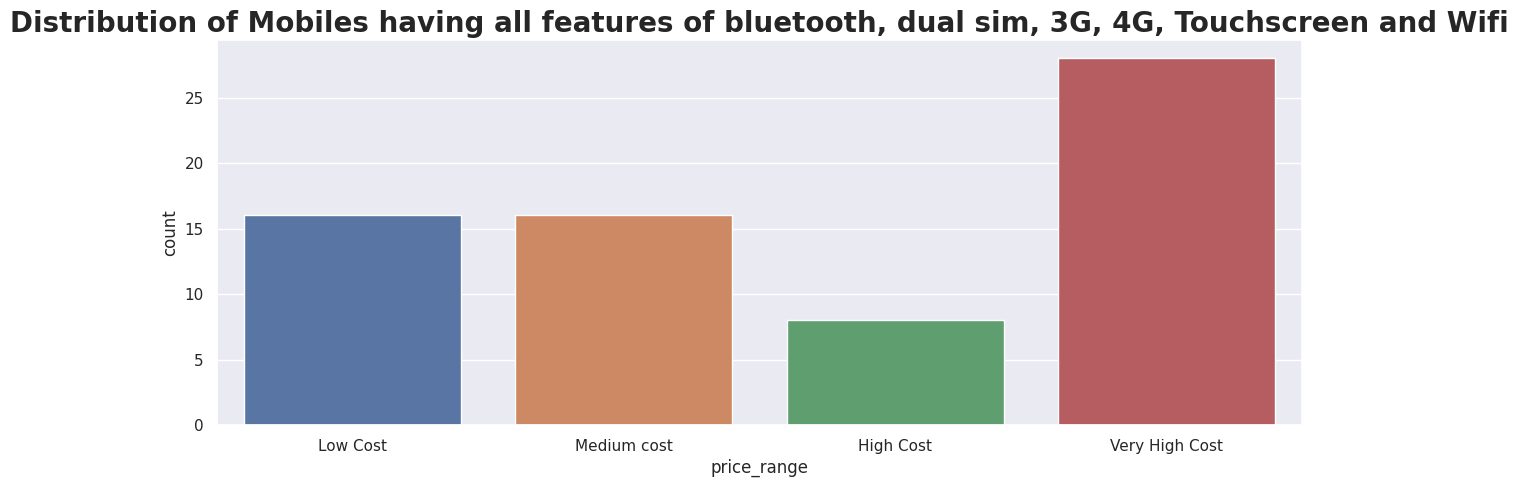

In [ ]:
plt.figure(figsize=(14,5))
plt.title('Distribution of Mobiles having all features of bluetooth, dual sim, 3G, 4G, Touchscreen and Wifi',fontsize=20,fontweight="bold")
ax = sns.countplot(data = df[df[binary_variable].prod(axis = 1)==1], x = 'price_range')
ax.set_xticklabels(label)
plt.show()

##### 1. Why did you pick the specific chart?

We use the countplot to plot the distribution of mobile having all the 6 features of bluetooth, dual sim, 4G, 3G, touchscreen and wifi to see if having all the features in mobiles affects the price.

##### 2. What is/are the insight(s) found from the chart?

 Having all the 6 features somewhat drives the price higher. As from the plot, higher number of mobiles fall in Very high cost. So a single feature may not affect price but combination of features is affecting the price i.e. using univariate analysis we cannot determine the price.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The companies can know from the plot that having all features increases the price and so they can plan on having different models of mobiles with few features missing to make it affordable.

### Chart 4 - Distribution of mobiles across price range for binary features

We now check the numeric variables in the dataset. First we plot the distribution of mobiles according to a particular numeric feature for different price range.

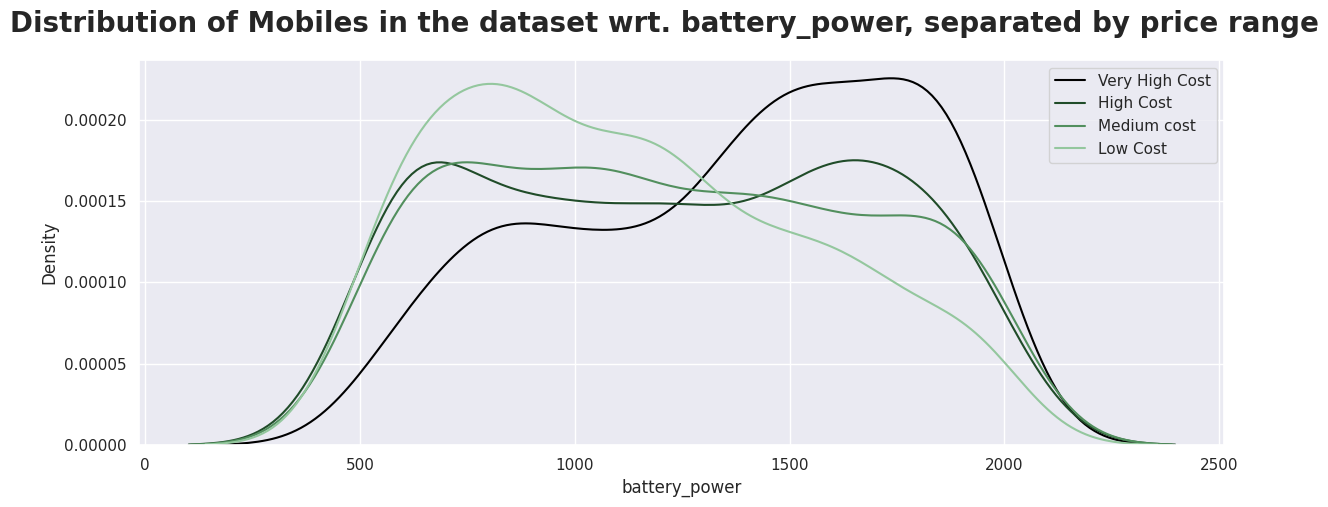

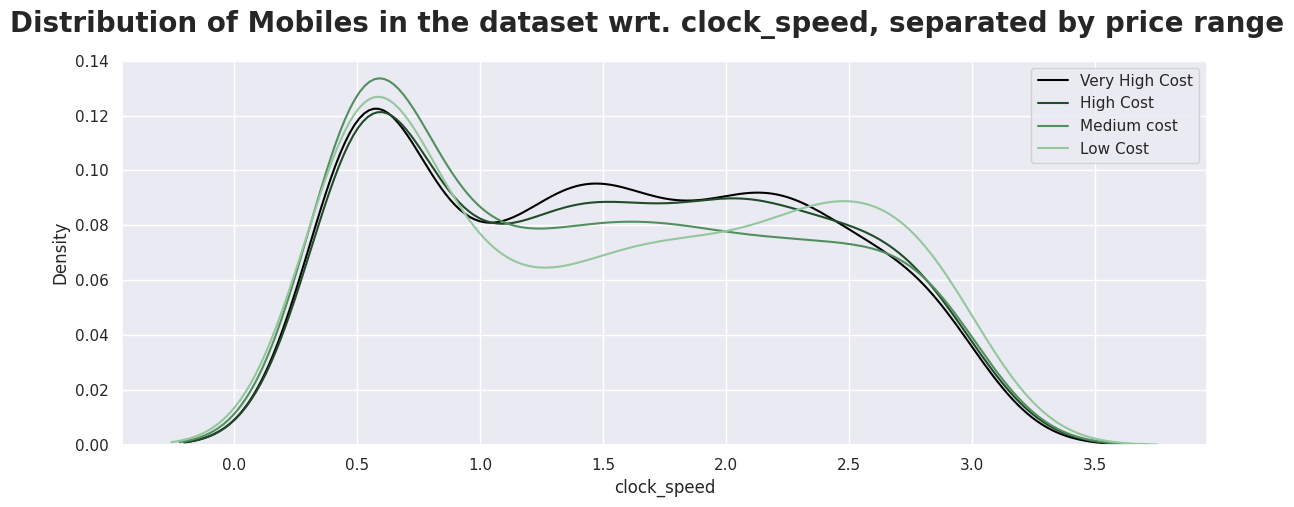

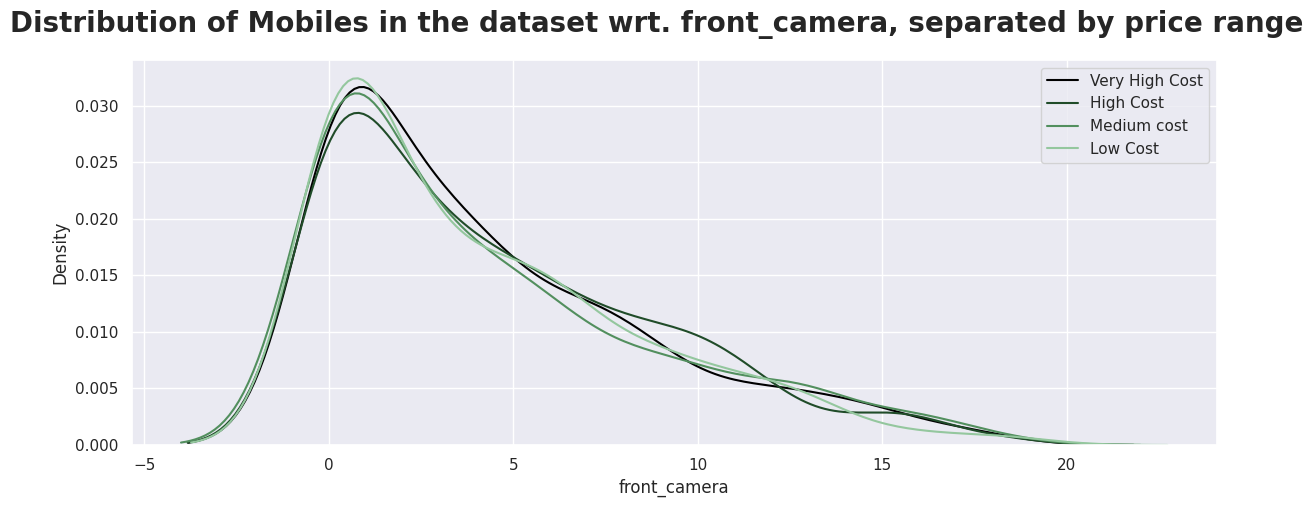

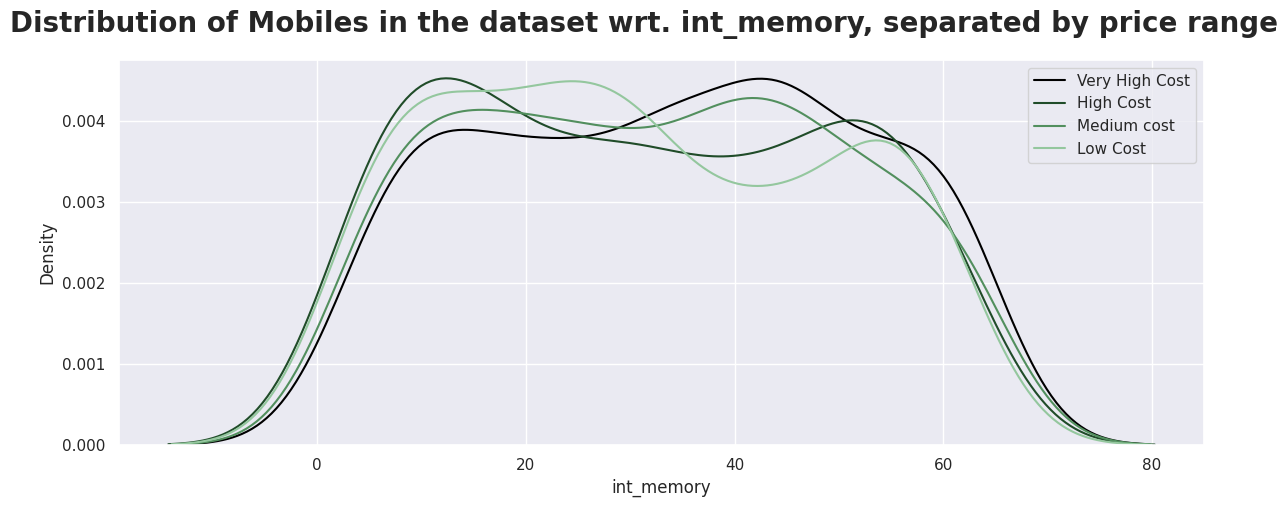

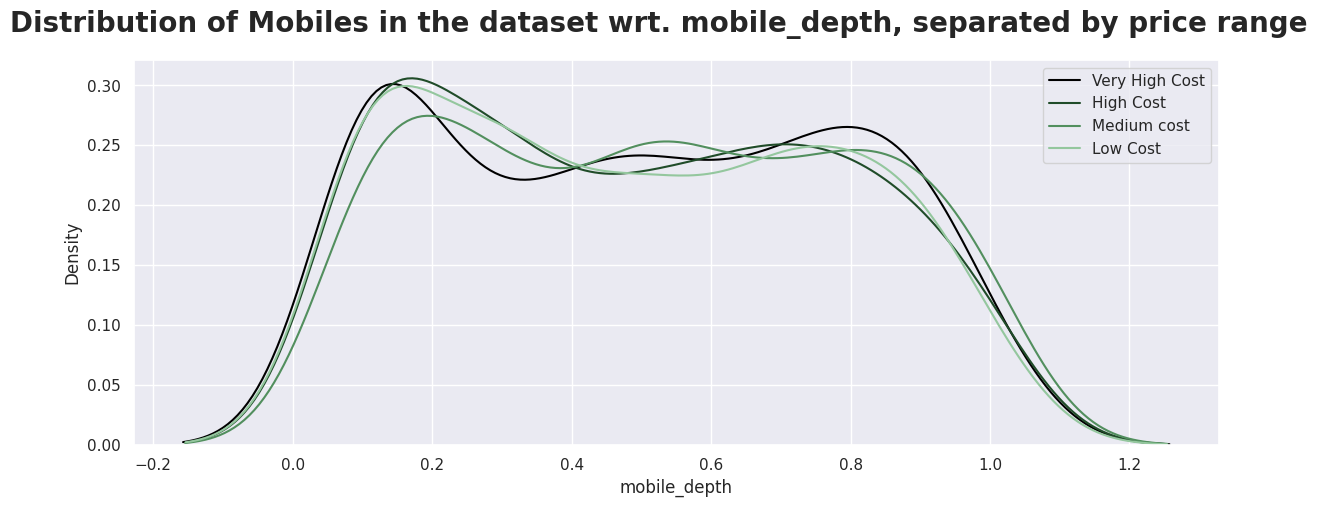

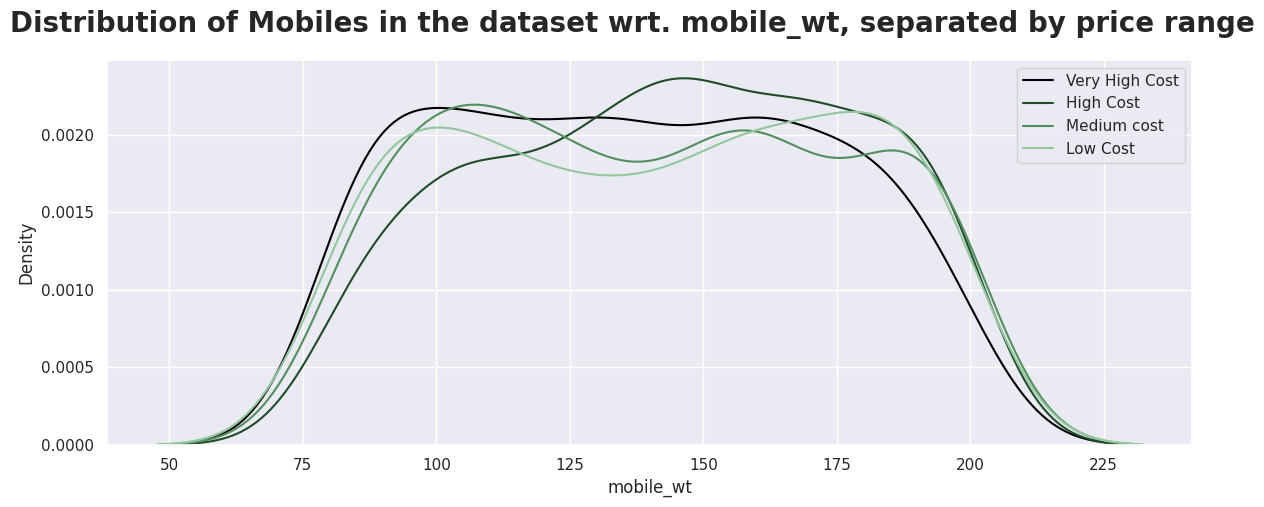

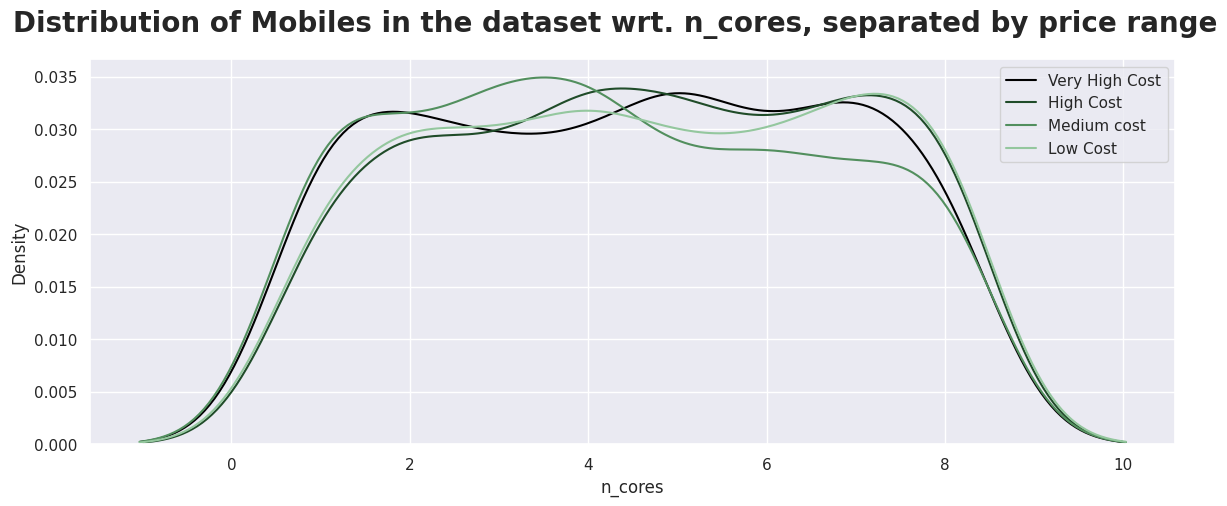

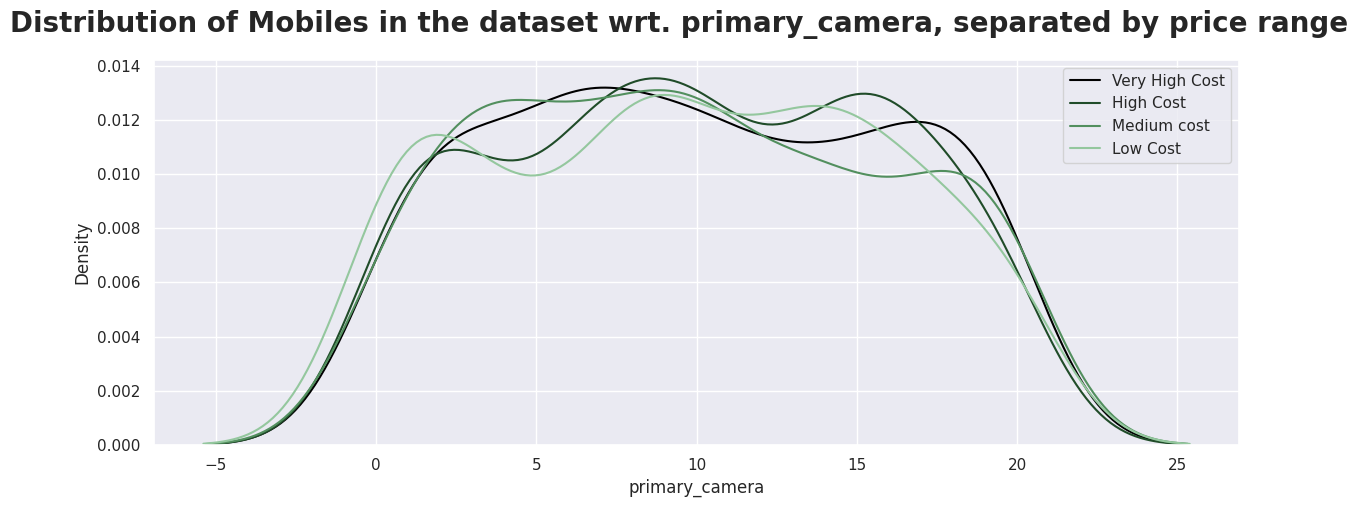

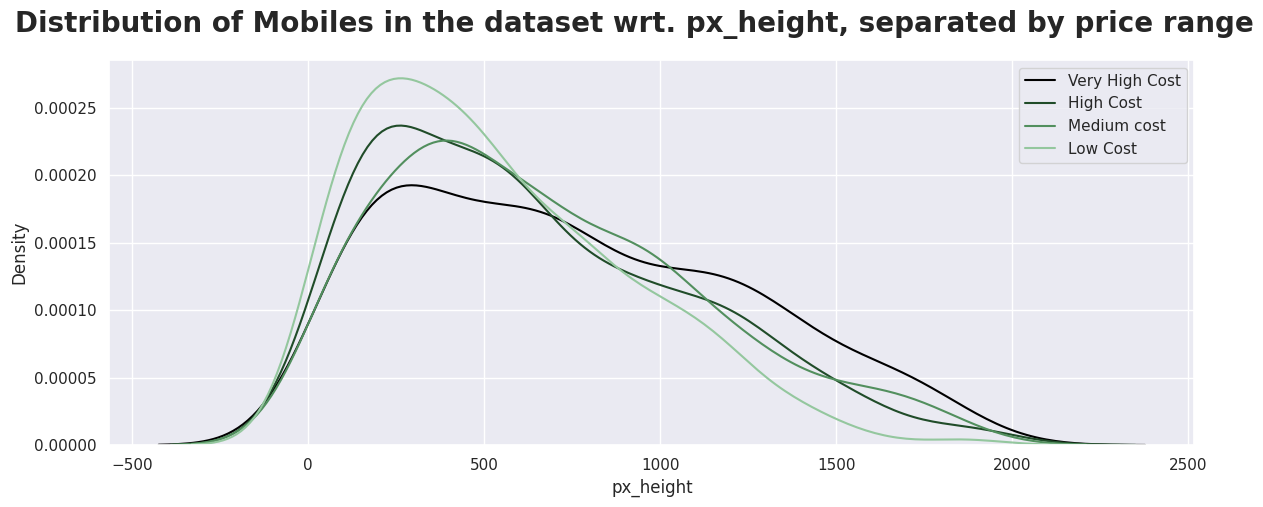

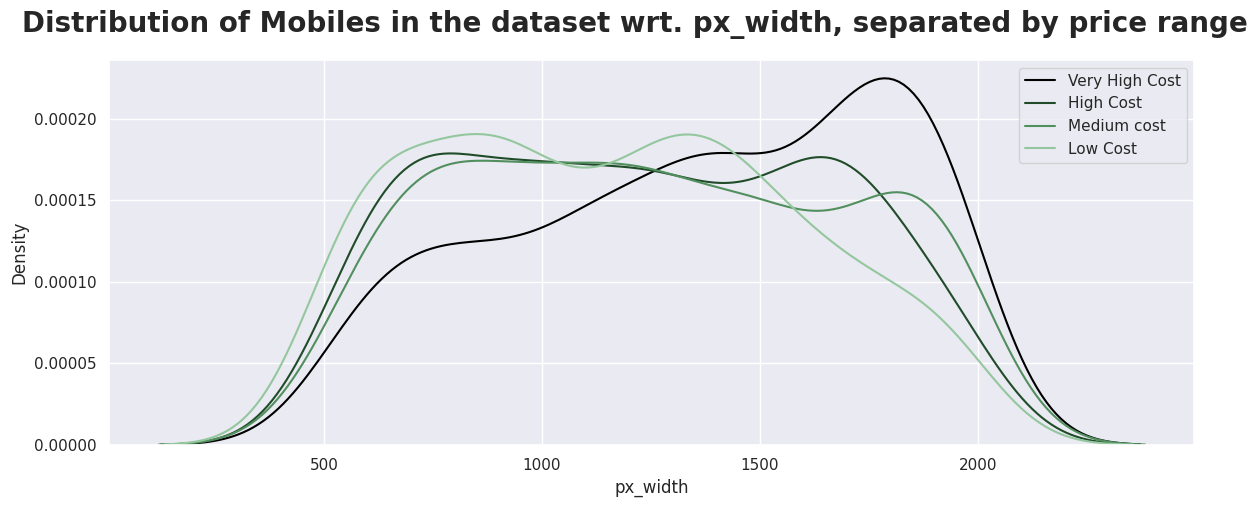

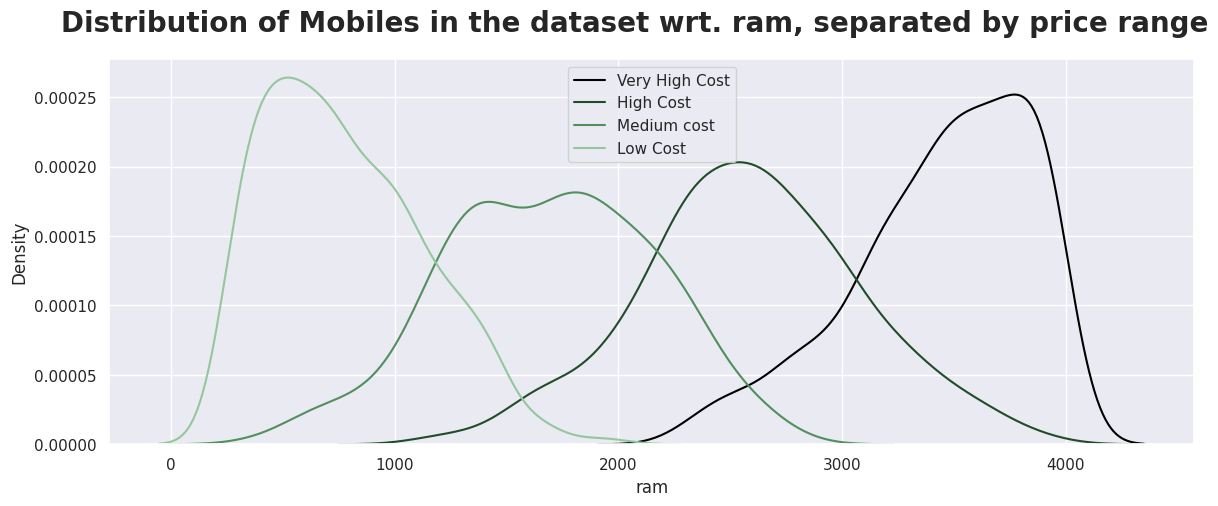

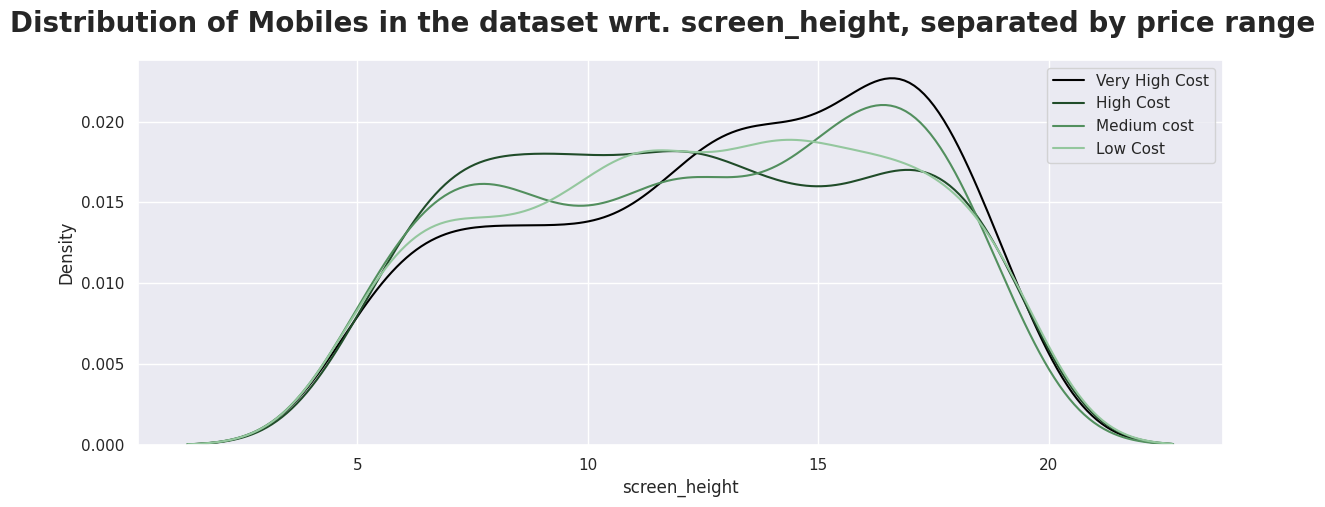

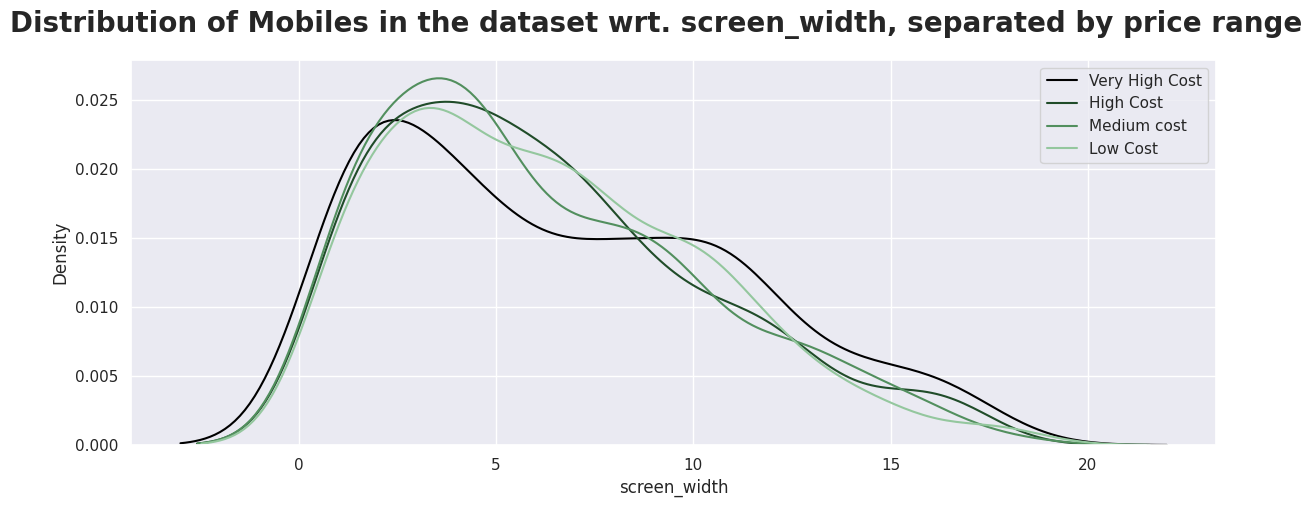

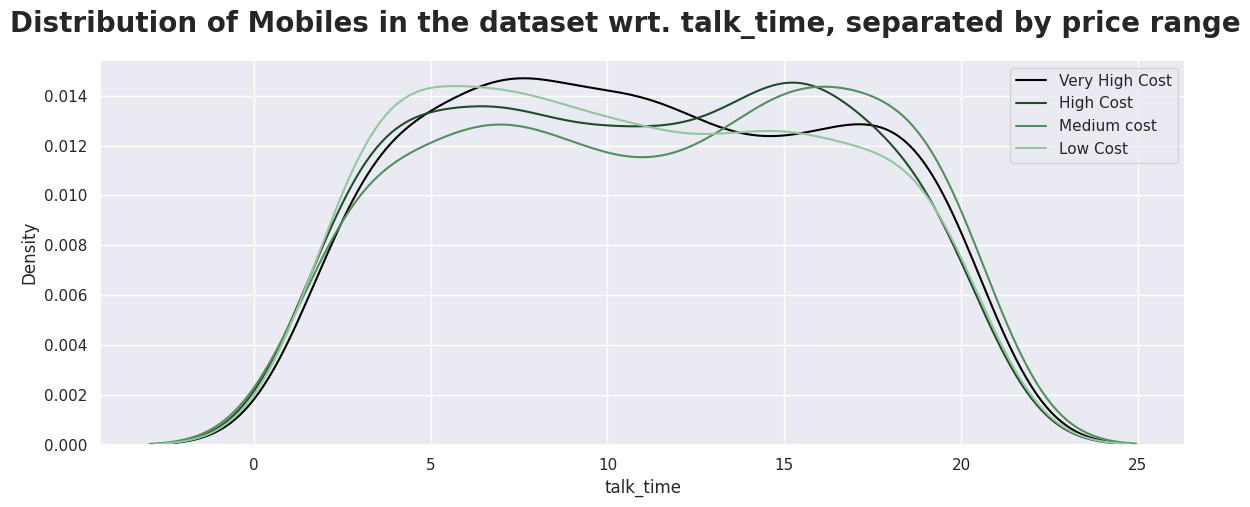

In [ ]:
# loop to plot for all numeric features
for i in numeric_variable:
  plt.figure(figsize=(14,5))
  plt.suptitle(f'Distribution of Mobiles in the dataset wrt. {i}, separated by price range',fontsize=20,fontweight="bold")
  # sequential color palette 
  palette = sns.cubehelix_palette(start=2, rot=0, light=0, dark = 0.7 , n_colors=4, reverse = True)
  # kde to plot density
  ax = sns.kdeplot(data = df, x = i, hue = 'price_range', palette = palette)
  ax.legend(label[::-1])
  # plt.savefig(f"download_{numeric_variable.index(i)}.png")
  # files.download(f'download_{numeric_variable.index(i)}.png')
  plt.show()

##### 1. Why did you pick the specific chart?

A density plot, also known as a kernel density plot, is a type of data visualization that displays the distribution of a continuous variable in a dataset. It is similar to a histogram, but instead of showing the frequency of values within each bin, a density plot shows the probability density of the variable at different values.

We use density plot to visualize the distribution of numeric variables like battery power, clock speed and we plot it for different price range so that we can know which numeric feature at what value, affects the price. 

##### 2. What is/are the insight(s) found from the chart?

Mobiles in the different price range have almost same distribution except for features RAM and upto some extent battery power. In case of RAM, the distribution of mobiles for different price range are separate i.e. higher the RAM value higher the price and lower the RAM value, lower the price. The battery power feature also has separate density plots for different price range but not like that of RAM. Other features do not affect the price much as evident by almost similar density plots for all price ranges for different features. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Its an important information to the companies that RAM is the driving factor for the prices of mobiles. The companies can indirectly control the price by setting the RAM of mobiles and also battery power upto some extent.

### Chart 5 - Distribution of mobiles across price range for binary features

We now plot the boxplot for all numeric features which shows the statistics for the features according to different price range.

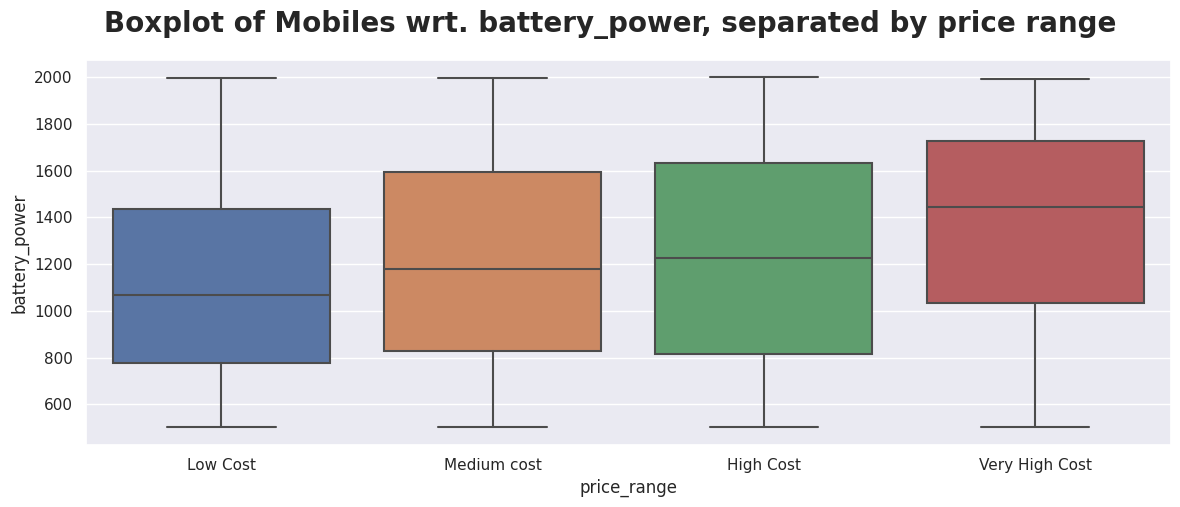

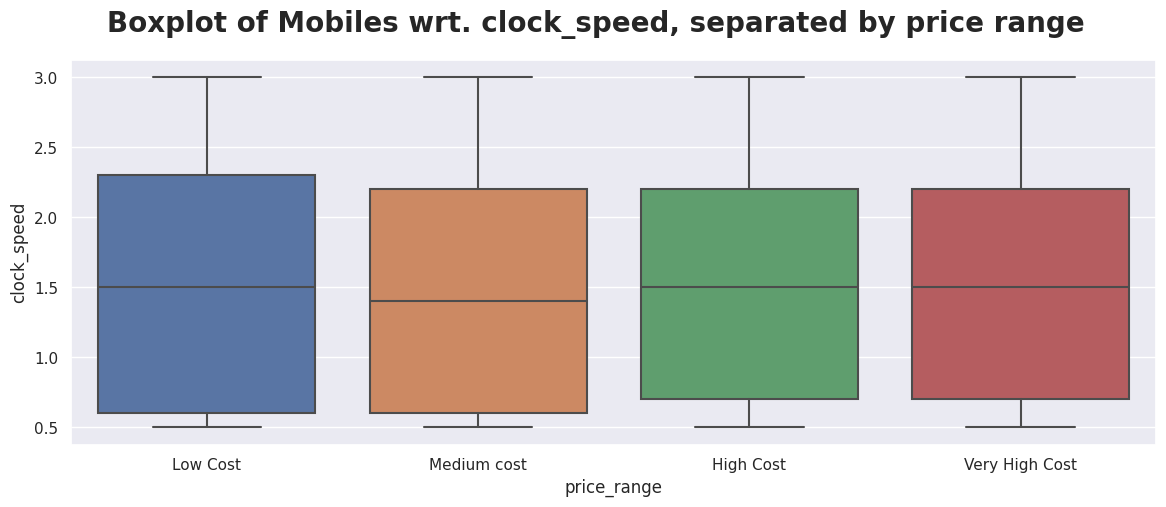

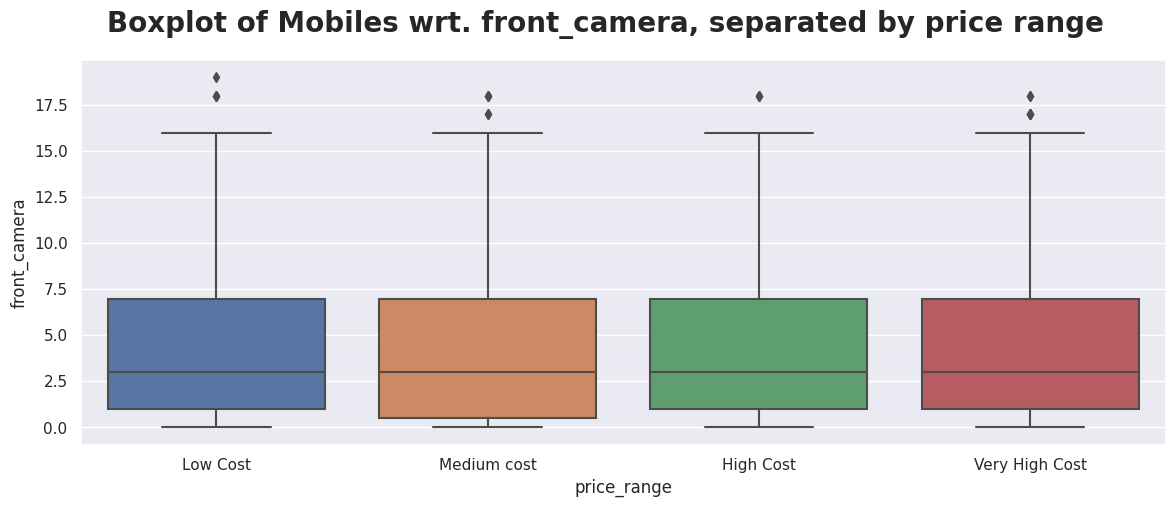

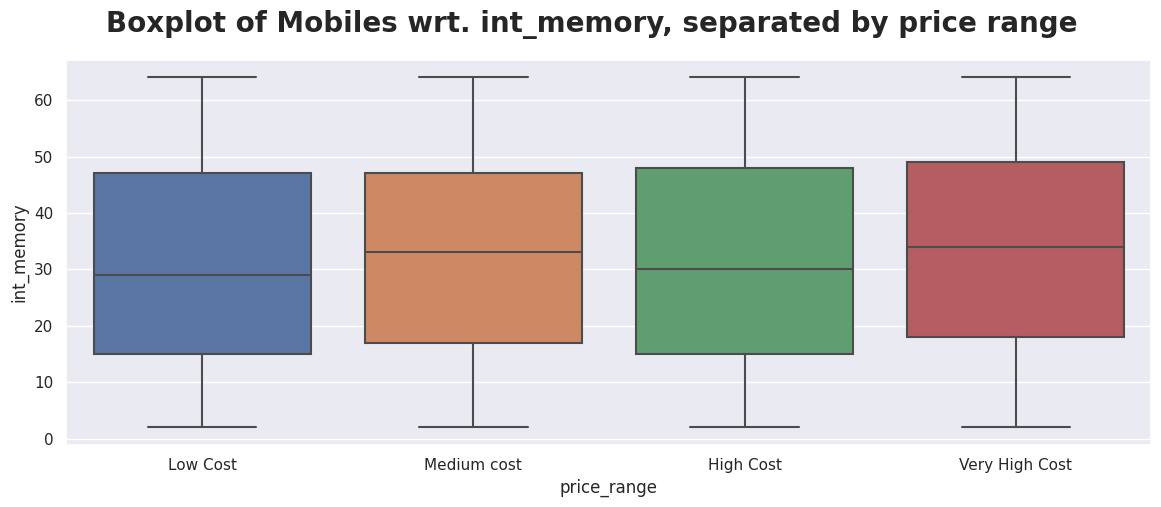

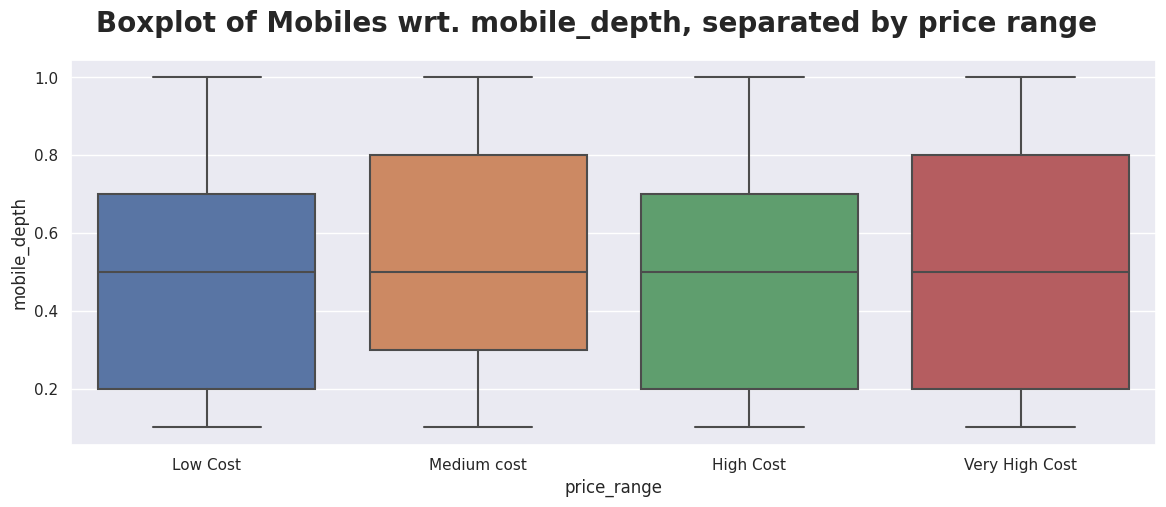

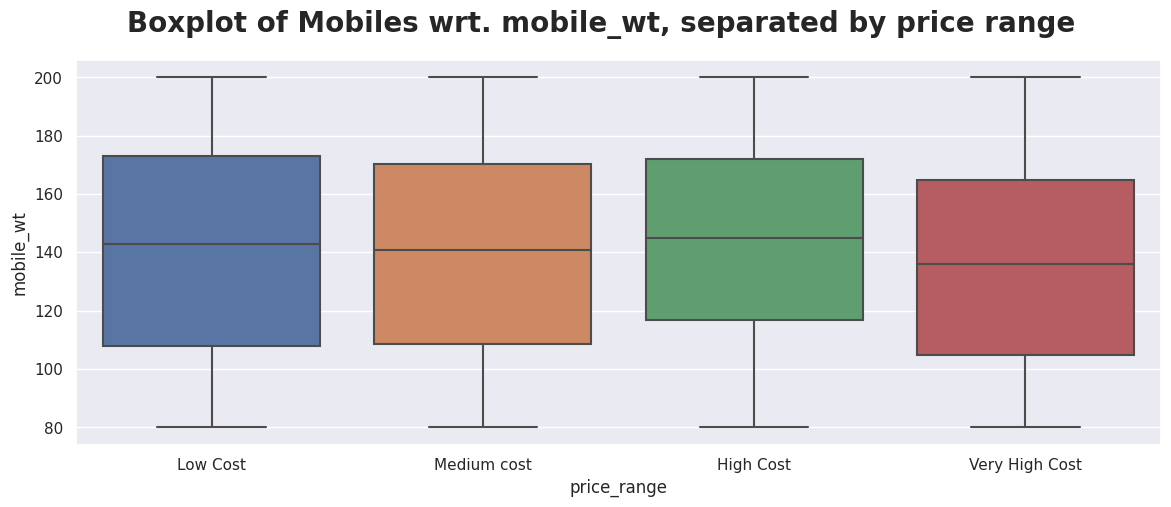

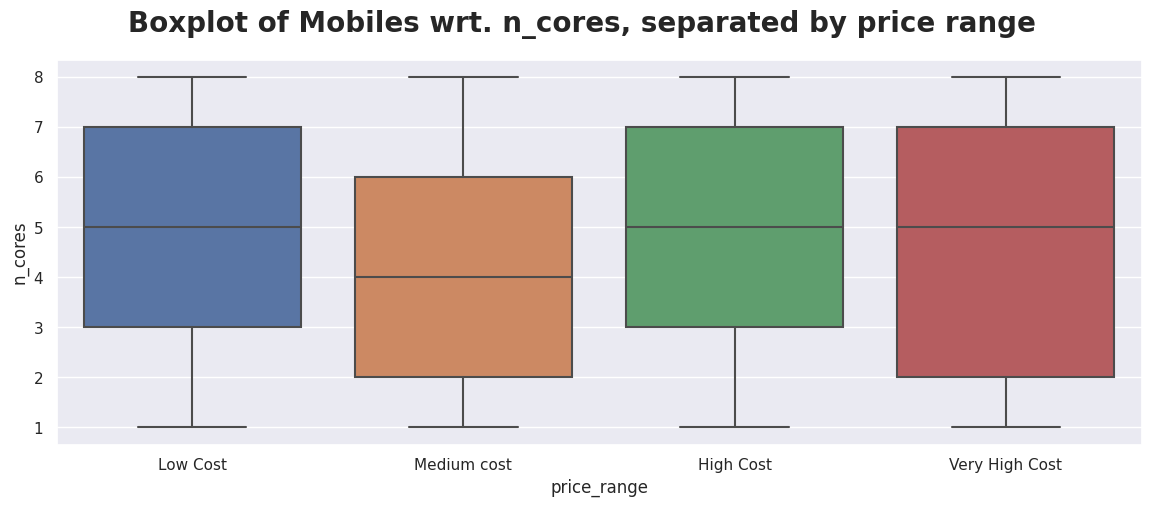

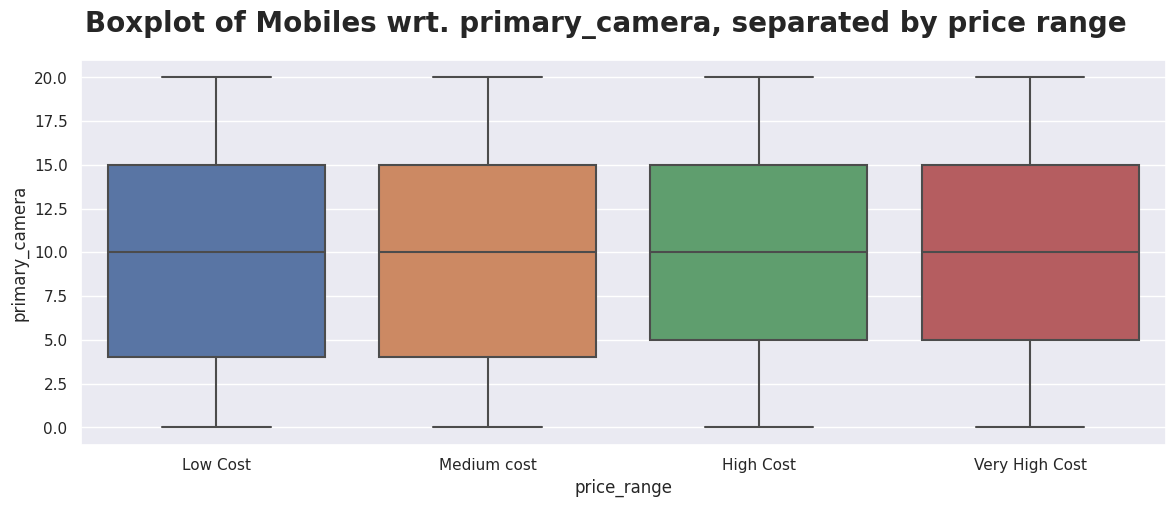

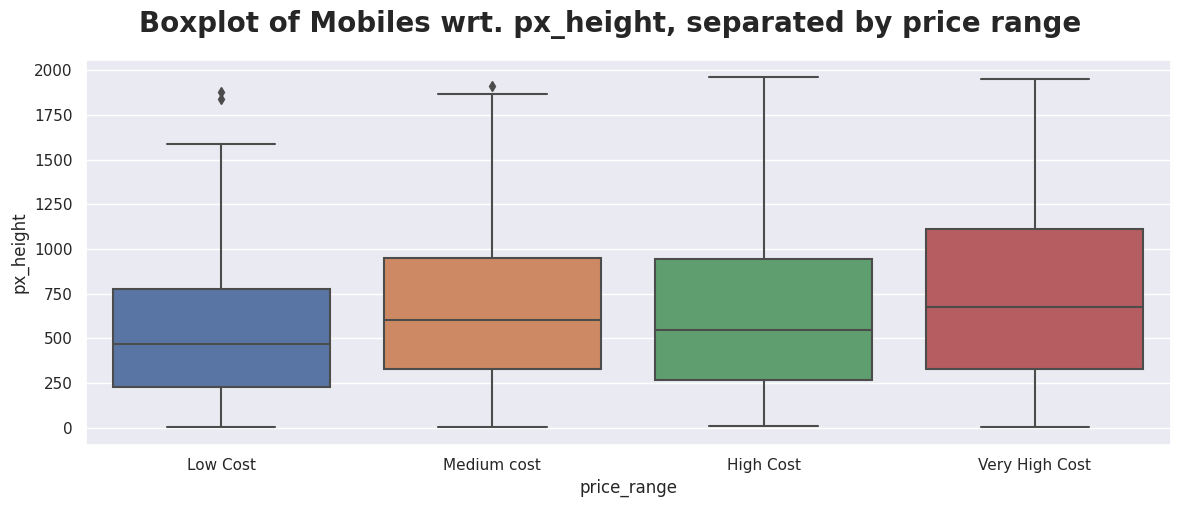

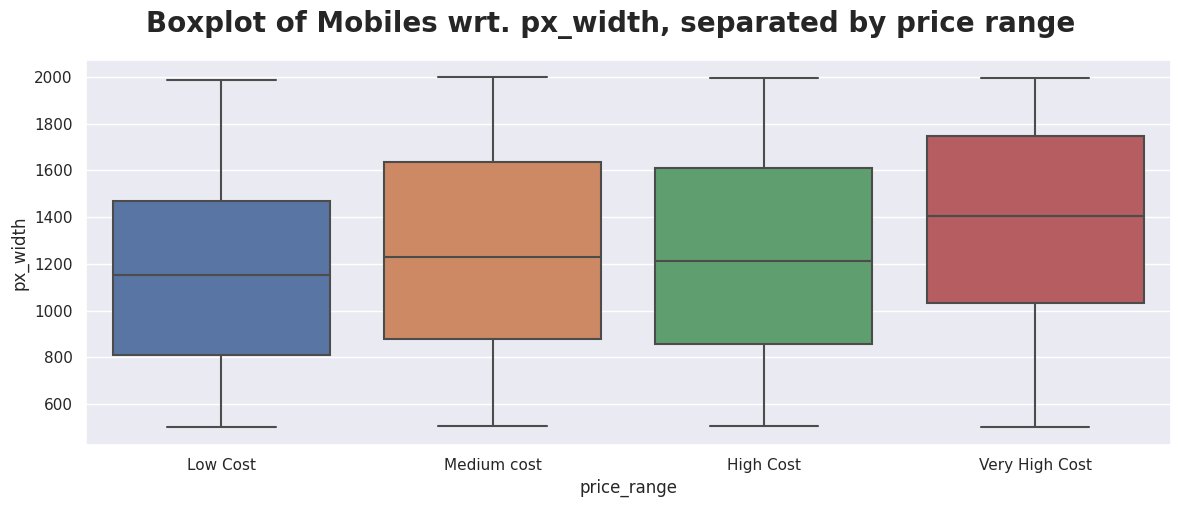

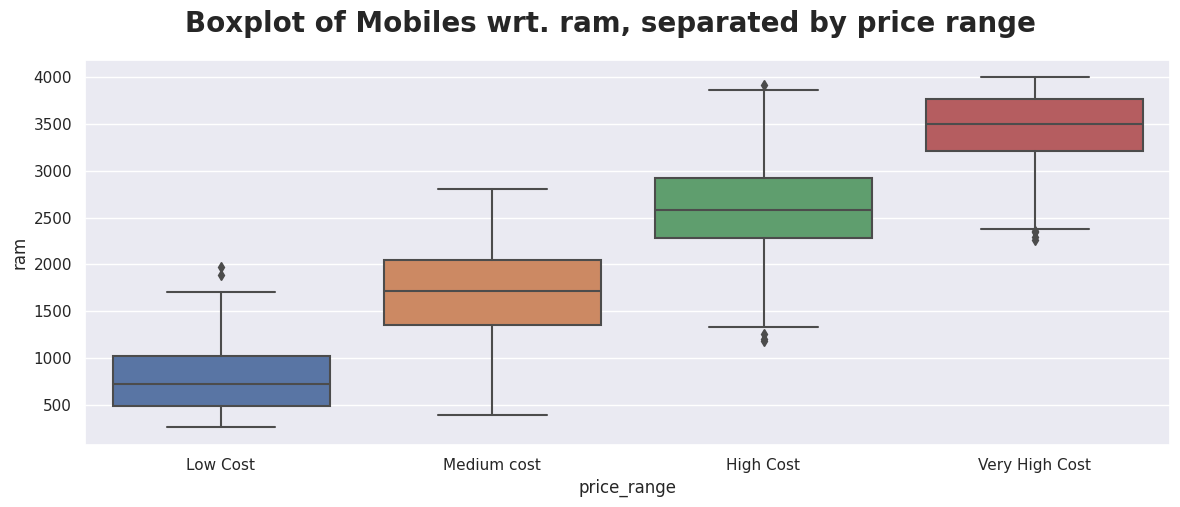

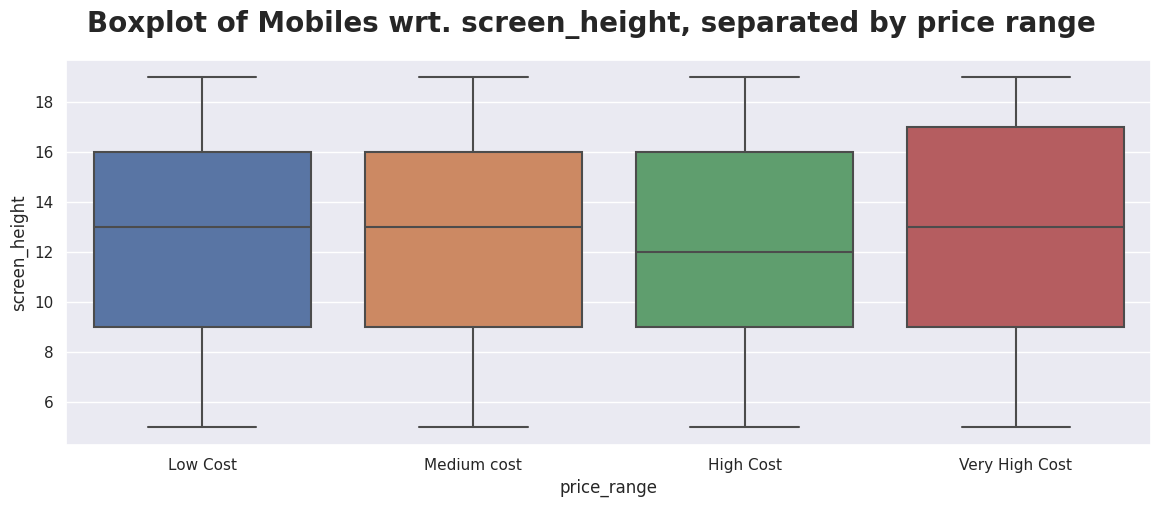

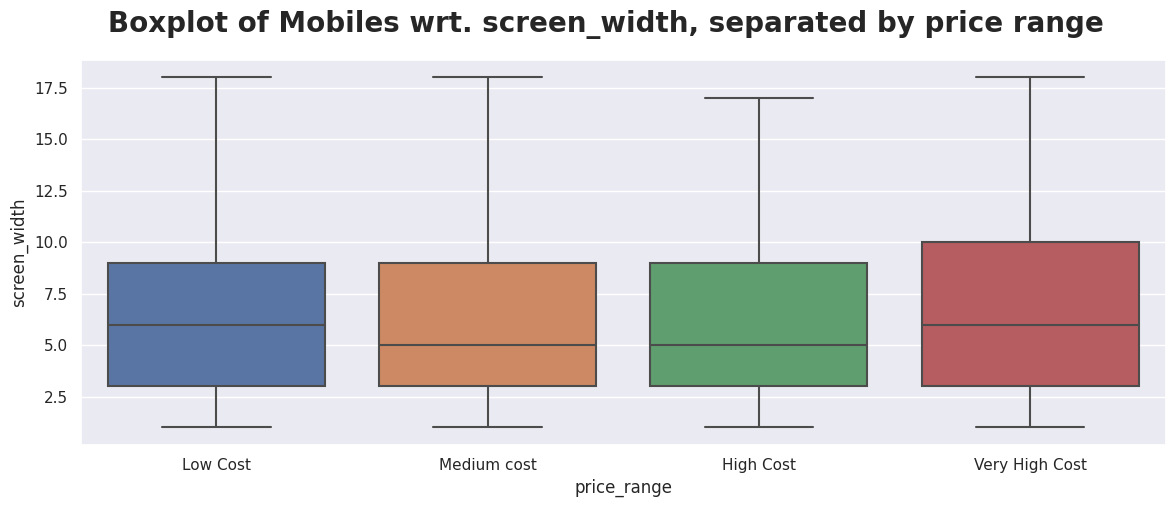

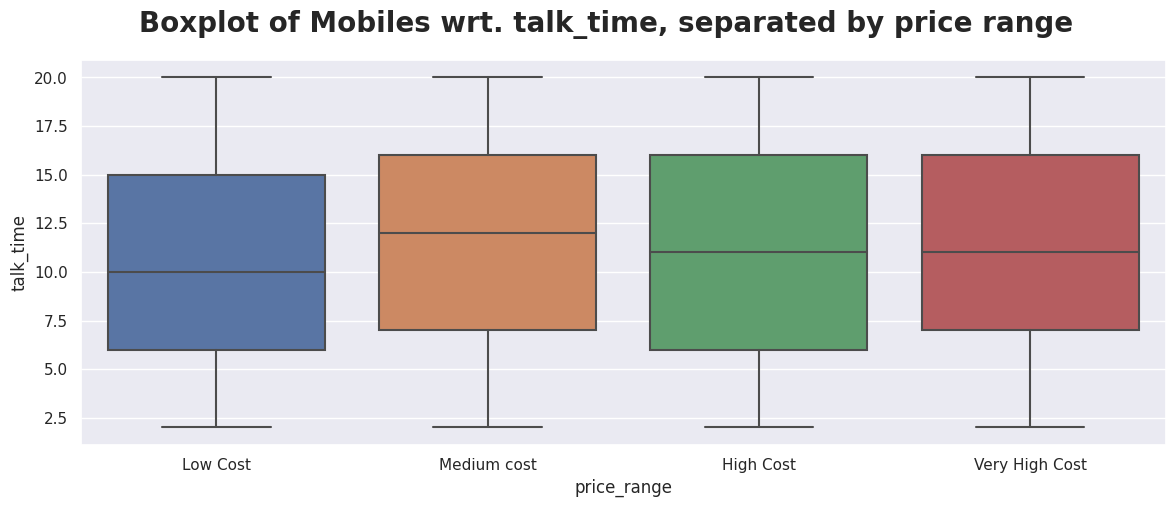

In [ ]:
for i in numeric_variable:
  plt.figure(figsize=(14,5))
  plt.suptitle(f'Boxplot of Mobiles wrt. {i}, separated by price range',fontsize=20,fontweight="bold")
  # boxplot for all numeric features
  ax = sns.boxplot(data = df, y=i, x='price_range')
  ax.set_xticklabels(label)
  # plt.savefig(f"download_{numeric_variable.index(i)}.png")
  # files.download(f'download_{numeric_variable.index(i)}.png')
  plt.show()

##### 1. Why did you pick the specific chart?

A Box and Whisker Plot (or Box Plot) is a convenient way of visually displaying the data distribution through their quartiles. It is a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum. A box plot allows a graphical display of the distribution of variable. Further any results of data that fall outside of the minimum and maximum values are known as outliers are easy to determine on a box plot graph.

So we use the boxplot to see the distribution of mobiles in different price range across the numeric variables.


##### 2. What is/are the insight(s) found from the chart?

The boxplot also shows the dependence of price range on RAM. Mobiles with higher RAM value have high price. Other features alone do not affect the price range much. There were very less outliers in the distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The fact that RAM has a major say in price of mobile is also inferred here and so companies can decide the amount of RAM needed for a mobile set as it will be the controlling factor of the prices.

### Chart 6 - Distribution of mobiles across RAM values for different price range

Since RAM is the most influential feature, we plot the histogram of RAM for different price range.

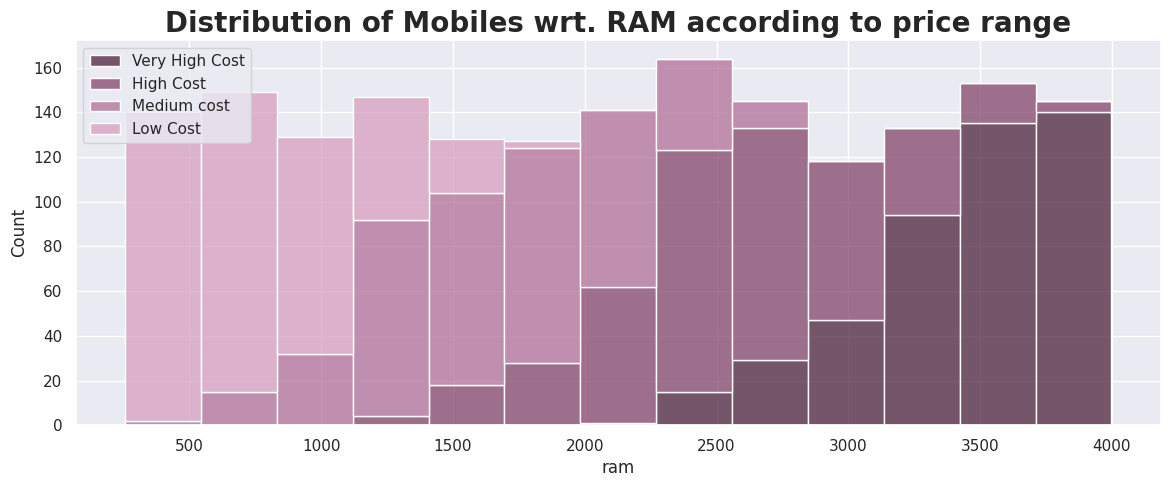

In [ ]:
plt.figure(figsize=(14,5))
plt.title('Distribution of Mobiles wrt. RAM according to price range',fontsize=20,fontweight="bold")
palette = sns.cubehelix_palette(start=0.6, rot=0, light=0.2, dark = 0.7 , n_colors=4, reverse = True)
# plotting histogram for RAM
ax = sns.histplot(data = df, x='ram', hue='price_range', multiple = 'stack', palette = palette)
ax.legend(label[::-1])
plt.show()

##### 1. Why did you pick the specific chart?

A stacked countplot is a type of data visualization that displays the count of data points for multiple categories in a stacked bar chart format. It is similar to a regular countplot, but with each bar representing the count of a category, and the different colors in each bar representing the count of a subcategory within that category. Stacked countplots are useful for comparing the counts of different subcategories across multiple categories and can help identify trends or patterns in the data.

Here we compare the count of mobiles across RAM values which are on x-axis and color difference tells about the different price range.

##### 2. What is/are the insight(s) found from the chart?

Higher RAM values have more count value for dark color (Very high range) and similarly lower RAM values have more count value for light color (Low range) meaning Higher priced mobiles have higher RAM and lower priced mobiles have lower RAM. However that does not mean other features have no effect on target variable. Other variable alone do not affect the target variable. Other features may affect the price range combiningly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot also tells about the RAM value being the driving factor for the prices of mobile phones. The businesses gain the same information as they did in previous plot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The RAM size of a mobile phone has a significant impact on its price category. 
2. The battery capacity of a mobile phone is an important factor in determining its price category. 
3. The availability of 4G connectivity has a significant impact on its price category. 

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** There is no difference in the mean price categories of mobile phones with different RAM values i.e. mobiles with different price range have equal mean RAM value (µ1 = µ2  = µ3 = µ4)

**Alternate Hypothesis:** There is a significant difference in the mean price categories of mobile phones with different RAM values i.e. mobiles with different price range have different mean RAM value (µ1 ≠ µ2  ≠ µ3 ≠ µ4)

**Test Type:** One-way ANOVA

#### 2. Perform an appropriate statistical test.

In [ ]:
# classifying data for different price range and selecting the ram values
category_0 = df[df['price_range'] == 0]['ram']
category_1 = df[df['price_range'] == 1]['ram']
category_2 = df[df['price_range'] == 2]['ram']
category_3 = df[df['price_range'] == 3]['ram']

In [ ]:
f_value, p_value = stats.f_oneway(category_0, category_1, category_2, category_3)

print("F-value:", f_value)
print('P-value: %f'%float("{:.12f}".format(p_value)))

F-value: 3202.9743602302883
P-value: 0.000000


Considering threshold value as 0.05, p-value is less than the threshold value, so we reject the null hypothesis. That means there is a significant difference between the means of RAM for different price ranges.

##### Which statistical test have you done to obtain P-Value?

Here we have performed the one-way ANOVA (Analysis of Variance) test which is used to find out whether there exists a statistically significant difference between the mean values of more than one group. We got the result that Null hypothesis has been rejected which means there is a significant difference between means of RAM for different price ranges meaning different RAM values affect the price of mobile. This was also evident from Exploratory Data Analysis.

##### Why did you choose the specific statistical test?

One-way ANOVA (Analysis of Variance) is a statistical test used to determine whether there are any significant differences between the means of two or more independent groups. It is called "one-way" because there is only one factor (or variable) being tested.

Since here we have multiple price range (0,1,2,3) and so multiple groups of RAM, we use ANOVA to see if these multiple groups have same mean or not.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** There is no difference in the mean price categories of mobile phones with different battery capacities i.e. mobiles with different price range have equal mean battery capacities (µ1 = µ2  = µ3 = µ4)

**Alternate Hypothesis:** There is a significant difference in the mean price categories of mobile phones with different battery capacities i.e. mobiles with different price range have different mean battery capacities (µ1 ≠ µ2  ≠ µ3 ≠ µ4)

**Test Type:** One-way ANOVA


#### 2. Perform an appropriate statistical test.

In [ ]:
# Divide the data into groups based on price category
category_0 = df[df['price_range'] == 0]['battery_power']
category_1 = df[df['price_range'] == 1]['battery_power']
category_2 = df[df['price_range'] == 2]['battery_power']
category_3 = df[df['price_range'] == 3]['battery_power']

In [ ]:
# Perform Statistical Test to obtain P-Value
f_value, p_value = stats.f_oneway(category_0, category_1, category_2, category_3)

print("F-value:", f_value)
print("P-value:", p_value)

F-value: 26.230328567810528
P-value: 1.3146177753123413e-16


Considering threshold value as 0.05, p-value is less than the threshold value, so we reject the null hypothesis. That means there is a significant difference between the means of Battery power for different price ranges.

##### Which statistical test have you done to obtain P-Value?

Here we have performed the one-way ANOVA (Analysis of Variance) test which is used to find out whether there exists a statistically significant difference between the mean values of more than one group. We got the result that Null hypothesis has been rejected which means there is a significant difference between means of battery power for different price ranges meaning different battery power capacities affect the price of mobile.

##### Why did you choose the specific statistical test?

One-way ANOVA (Analysis of Variance) is a statistical test used to determine whether there are any significant differences between the means of two or more independent groups. It is called "one-way" because there is only one factor (or variable) being tested.

Since here we have multiple price range (0,1,2,3) and so multiple groups of battery powers, we use ANOVA to see if these multiple groups have same mean or not.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** Availability of 4G doesn't have any effect on the price of mobiles.

**Alternate Hypothesis:** Mobile phones with 4G connectivity are priced significantly different than those without 4G connectivity.

**Test Type:** Chi-square test

#### 2. Perform an appropriate statistical test.

In [ ]:
cont_table = pd.crosstab(df['four_g'], df['price_range'])
cont_table

price_range    0    1    2    3
four_g                         
0            214  216  230  205
1            237  235  226  256

In [ ]:
# Perform the Chi-square test
stat, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print(f"Chi-square statistic: {stat:.2f}")
print(f"P-value: {pval:.4f}")

Chi-square statistic: 3.30
P-value: 0.3471


Considering threshold value as 0.05, p-value is more than the threshold value, so we fail to reject the null hypothesis. That means there is no significant effect of having 4G connectivity on the price of mobile.

##### Which statistical test have you done to obtain P-Value?

Here we have performed Chi-square test as the statistical testing to obtain P-Value and found that p-value is more than the threshold value of 0.05 and so we fail to reject the Null hypothesis which means having 4G has no effect on the price of mobile. This was also evident from the EDA where the distribution of mobiles across different price range for 4G feature was almost similar.

##### Why did you choose the specific statistical test?

The chi-square test is a statistical hypothesis test used to determine if there is a significant association between two categorical variables. The test works by comparing the observed frequencies in a contingency table (a table that displays the counts of each category for two variables) to the expected frequencies under the null hypothesis of no association between the variables. The difference between the observed and expected frequencies is then squared, divided by the expected frequency, and summed across all cells in the table to calculate the test statistic. The resulting value is then compared to a chi-square distribution to calculate the p-value.

Since we are checking if having 4G affects the price, where 4G is a binary categorical feature and price range is also a categorical feature with multiple groups, we use chi square test.

## ***6. Feature Engineering & Data Pre-processing***

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning.

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_camera      0
four_g            0
int_memory        0
mobile_depth      0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
screen_height     0
screen_width      0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64


<Axes: >

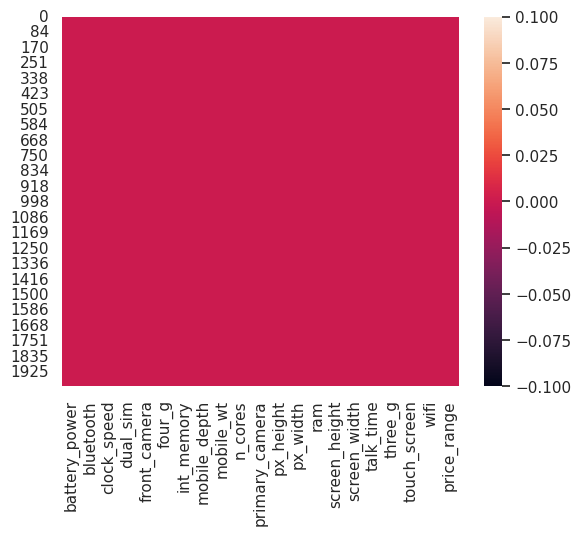

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull())

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were no missing values in the given dataset.

### 2. Handling Outliers

We plot the box plot for all numeric values to see the outliers.

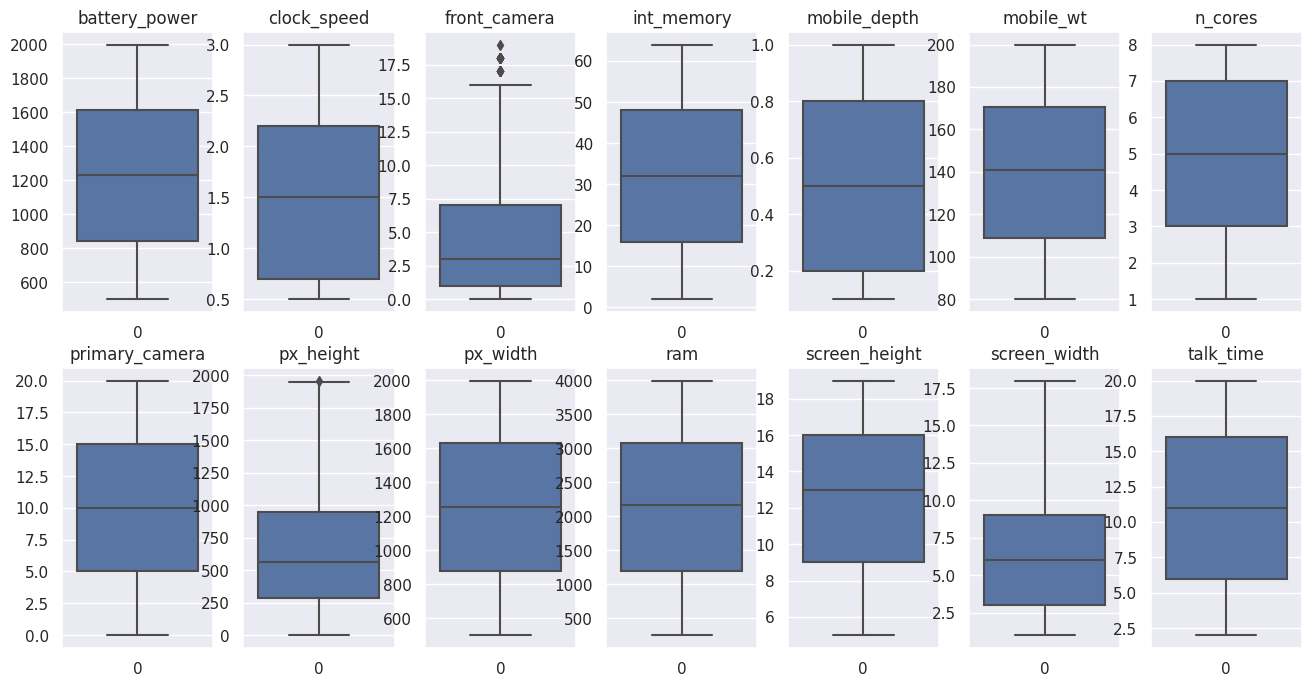

In [ ]:
# Checking for Outliers using Box Plots
numeric_cols = ['battery_power','clock_speed', 'front_camera',
        'int_memory', 'mobile_depth', 'mobile_wt', 'n_cores',
       'primary_camera', 'px_height', 'px_width', 'ram', 'screen_height',
       'screen_width', 'talk_time']
n=1
plt.figure(figsize=(16,8))
for col in numeric_cols:
  feature = df[col]
  ax = plt.subplot(2,7,n)
  ax.set_title(col)
  sns.boxplot(feature)
  n+=1
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We use the box plot graph to see the outliers in the dataset, which we have already used in the Exploratory Data Analysis section. When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot i.e. outside 1.5 times the interquartile range above the upper quartile and below the lower quartile (Q1 – 1.5 * IQR or Q3 + 1.5 * IQR).

We can notice very few outlier points in the distribution of front camera and px_height. Other distributions have no outliers.

Anyhow, we won't be dropping those records as these represent natural variations in the population which are called true outliers and not due to measurement errors, data entry or processing errors, or poor sampling. There is reasonable chance of these numbers appearing in the data so these data points need to be retained.

### 3. Feature Manipulation & Selection

#### Checking Multicollinearity

**Multicollinearity** occurs when independent variables in a regression model are correlated. Moderate multicollinearity may not be problematic. However, severe multicollinearity is a problem because it can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. It mainly affects the multiple linear regression models and tree based models are mostly immune to it.

In [ ]:
# Finding correlation between the features in the dataset.
df[numeric_cols].corr()

battery_power  clock_speed  front_camera  int_memory  \
battery_power        1.000000     0.002404      0.027073   -0.006117   
clock_speed          0.002404     1.000000     -0.005444    0.005311   
front_camera         0.027073    -0.005444      1.000000   -0.032046   
int_memory          -0.006117     0.005311     -0.032046    1.000000   
mobile_depth         0.034156    -0.011987     -0.002887   -0.006389   
mobile_wt            0.013188    -0.001745      0.032649   -0.024652   
n_cores             -0.027528    -0.015042     -0.021467   -0.028032   
primary_camera       0.025015    -0.008417      0.645880   -0.037135   
px_height            0.014913    -0.007822     -0.001558    0.005584   
px_width            -0.003276    -0.001906     -0.004116   -0.006458   
ram                 -0.006012     0.005045      0.011863    0.037720   
screen_height       -0.045429    -0.024307     -0.012501    0.035625   
screen_width        -0.022470    -0.003585     -0.017689    0.005413   
talk_time            0.054556    -0.023237     -0.018639   -0.005081   

                mobile_depth  mobile_wt   n_cores  primary_camera  px_height  \
battery_power       0.034156   0.013188 -0.027528        0.025015   0.014913   
clock_speed        -0.011987  -0.001745 -0.015042       -0.008417  -0.007822   
front_camera       -0.002887   0.032649 -0.021467        0.645880  -0.001558   
int_memory         -0.006389  -0.024652 -0.028032       -0.037135   0.005584   
mobile_depth        1.000000   0.030750 -0.003778        0.027840   0.034922   
mobile_wt           0.030750   1.000000 -0.014654        0.028541   0.003140   
n_cores            -0.003778  -0.014654  1.000000       -0.006213   0.001256   
primary_camera      0.027840   0.028541 -0.006213        1.000000  -0.021050   
px_height           0.034922   0.003140  0.001256       -0.021050   1.000000   
px_width            0.034770   0.009456  0.025480       -0.004242   0.514228   
ram                -0.011836  -0.000663 -0.014830        0.022292  -0.020384   
screen_height      -0.031653  -0.040303  0.000167        0.000101   0.060553   
screen_width       -0.011278  -0.038367  0.021724       -0.019056   0.043699   
talk_time           0.019228   0.009354  0.007751        0.008454  -0.010784   

                px_width       ram  screen_height  screen_width  talk_time  
battery_power  -0.003276 -0.006012      -0.045429     -0.022470   0.054556  
clock_speed    -0.001906  0.005045      -0.024307     -0.003585  -0.023237  
front_camera   -0.004116  0.011863      -0.012501     -0.017689  -0.018639  
int_memory     -0.006458  0.037720       0.035625      0.005413  -0.005081  
mobile_depth    0.034770 -0.011836      -0.031653     -0.011278   0.019228  
mobile_wt       0.009456 -0.000663      -0.040303     -0.038367   0.009354  
n_cores         0.025480 -0.014830       0.000167      0.021724   0.007751  
primary_camera -0.004242  0.022292       0.000101     -0.019056   0.008454  
px_height       0.514228 -0.020384       0.060553      0.043699  -0.010784  
px_width        1.000000 -0.014128       0.033194      0.035759  -0.001096  
ram            -0.014128  1.000000       0.015984      0.028033   0.002953  
screen_height   0.033194  0.015984       1.000000      0.524451  -0.009614  
screen_width    0.035759  0.028033       0.524451      1.000000  -0.025407  
talk_time      -0.001096  0.002953      -0.009614     -0.025407   1.000000

<Axes: >

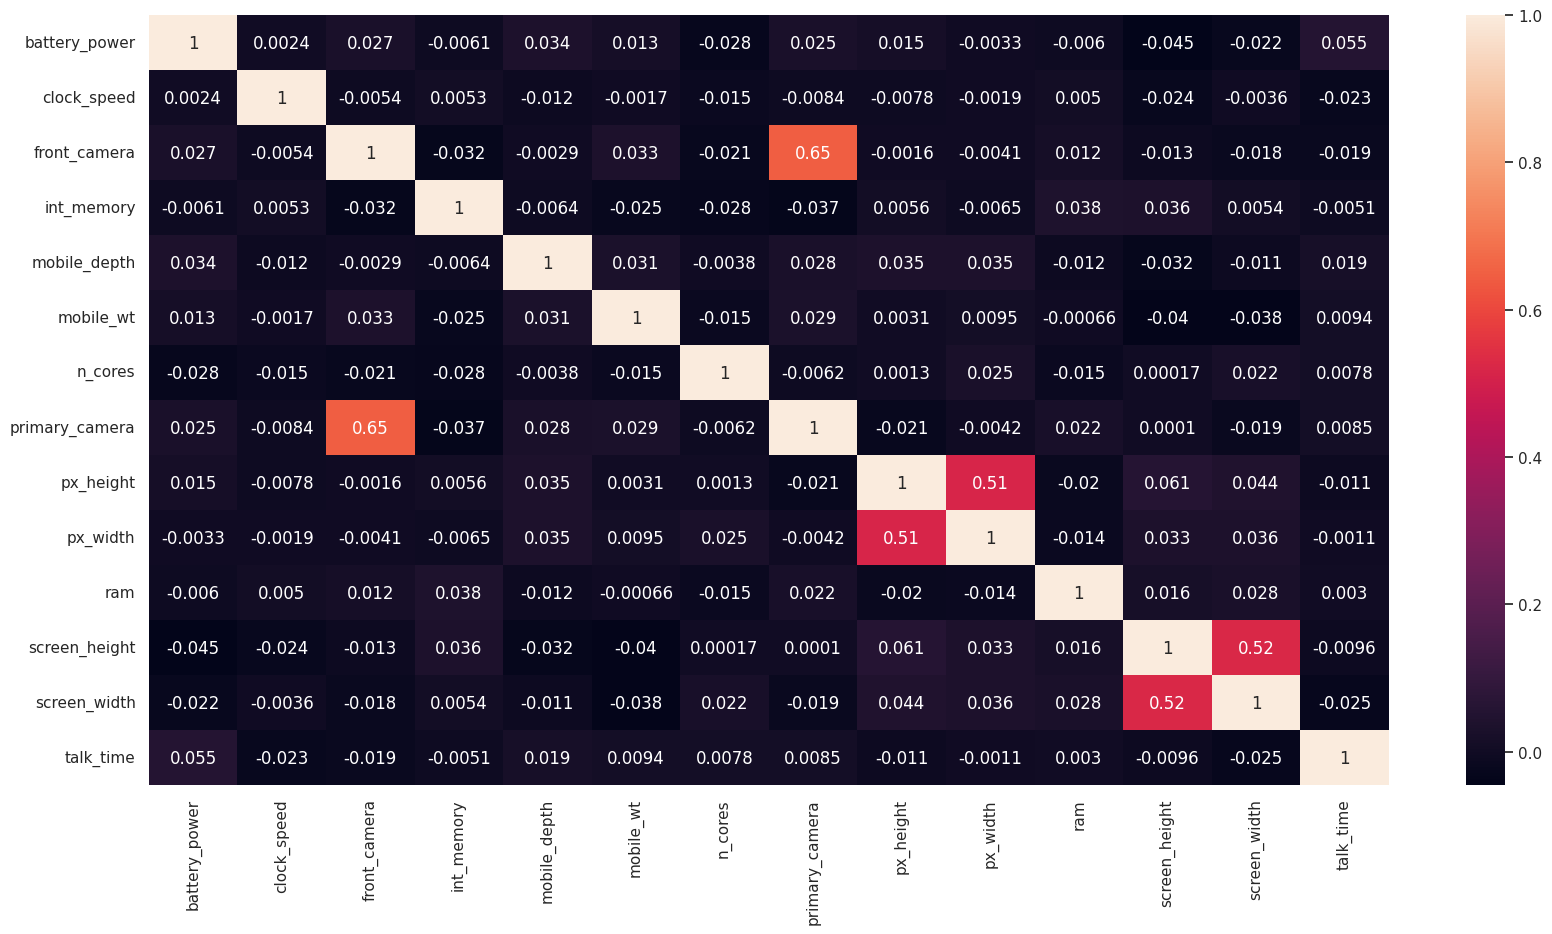

In [ ]:
# plotting correlation in heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df[numeric_cols].corr(), annot = True)

Among all the correlation values, 0.64 correlation value between primary camera and front camera and 0.58 correlation value between 4G and 3G is the highest. We won't be removing any feature as these are not strongly correlated. 

No feature engineering required as the data is clean and ready for supervised learning.




#### Variation Inflation Factor

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. It can estimate how much the variance of a regression coefficient is inflated due to multicollinearity. A large VIF on an independent variable indicates a highly collinear relationship to the other variables.

In [ ]:
# creating a function to calculate VIF for all numeric variables in the dataset
# we import variation_inflation_factor() function from Statsmodels module
def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(len(X.columns))]
  return vif

In [ ]:
# finding vif for numeric features
calc_vif(df[numeric_cols])

variables        VIF
0    battery_power   7.932585
1      clock_speed   4.213244
2     front_camera   3.416568
3       int_memory   3.966435
4     mobile_depth   3.884419
5        mobile_wt  12.761730
6          n_cores   4.596325
7   primary_camera   6.272184
8        px_height   4.258974
9         px_width  11.683121
10             ram   4.604375
11   screen_height  12.285683
12    screen_width   4.610204
13       talk_time   4.839840

As expected, the most correlated features (Temperature and Dew Point Temperature) in the dataset have very high VIF. The acceptable limit for VIF is around 10. Now we check the VIF for dataset by not including the Dew Point Temperature feature.

In [ ]:
calc_vif(df[[i for i in df[numeric_cols] if i not in ['px_width','screen_height']]])

variables        VIF
0    battery_power   7.778293
1      clock_speed   4.161009
2     front_camera   3.415352
3       int_memory   3.881827
4     mobile_depth   3.852917
5        mobile_wt  11.820415
6          n_cores   4.492700
7   primary_camera   6.213412
8        px_height   3.021907
9              ram   4.540736
10    screen_width   3.175545
11       talk_time   4.761633

Now the VIF for all numeric features is in acceptable limits. So we'll drop the Dew Point Temperature feature.

### 4. Categorical Encoding

The binary features have data type of 'int64'. So we convert those to 'boolean' data type. 

In [ ]:
df = df.astype({'bluetooth': 'bool','dual_sim': 'bool','four_g': 'bool','three_g': 'bool','touch_screen': 'bool','wifi': 'bool',})

In [ ]:
df['price_range']

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 1819, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   1819 non-null   int64  
 1   bluetooth       1819 non-null   bool   
 2   clock_speed     1819 non-null   float64
 3   dual_sim        1819 non-null   bool   
 4   front_camera    1819 non-null   int64  
 5   four_g          1819 non-null   bool   
 6   int_memory      1819 non-null   int64  
 7   mobile_depth    1819 non-null   float64
 8   mobile_wt       1819 non-null   int64  
 9   n_cores         1819 non-null   int64  
 10  primary_camera  1819 non-null   int64  
 11  px_height       1819 non-null   int64  
 12  px_width        1819 non-null   int64  
 13  ram             1819 non-null   int64  
 14  screen_height   1819 non-null   int64  
 15  screen_width    1819 non-null   int64  
 16  talk_time       1819 non-null   int64  
 17  three_g         1819 non-null   b

#### What all categorical encoding techniques have you used & why did you use those techniques?

The dataset already had categorical variables as integer format. So there was no need for any encoding techniques.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Feature transformation refers to the process of transforming the original features or variables of a dataset into a new set of features that may be more suitable for analysis or modeling. The goal of feature transformation is to improve the quality and relevance of the features used in modeling, while preserving the underlying information in the original data.

Some situations in which data transformation may be beneficial include:
1. When the data is highly skewed
2. When the data has outliers
3. When the relationship between the variables is non-linear


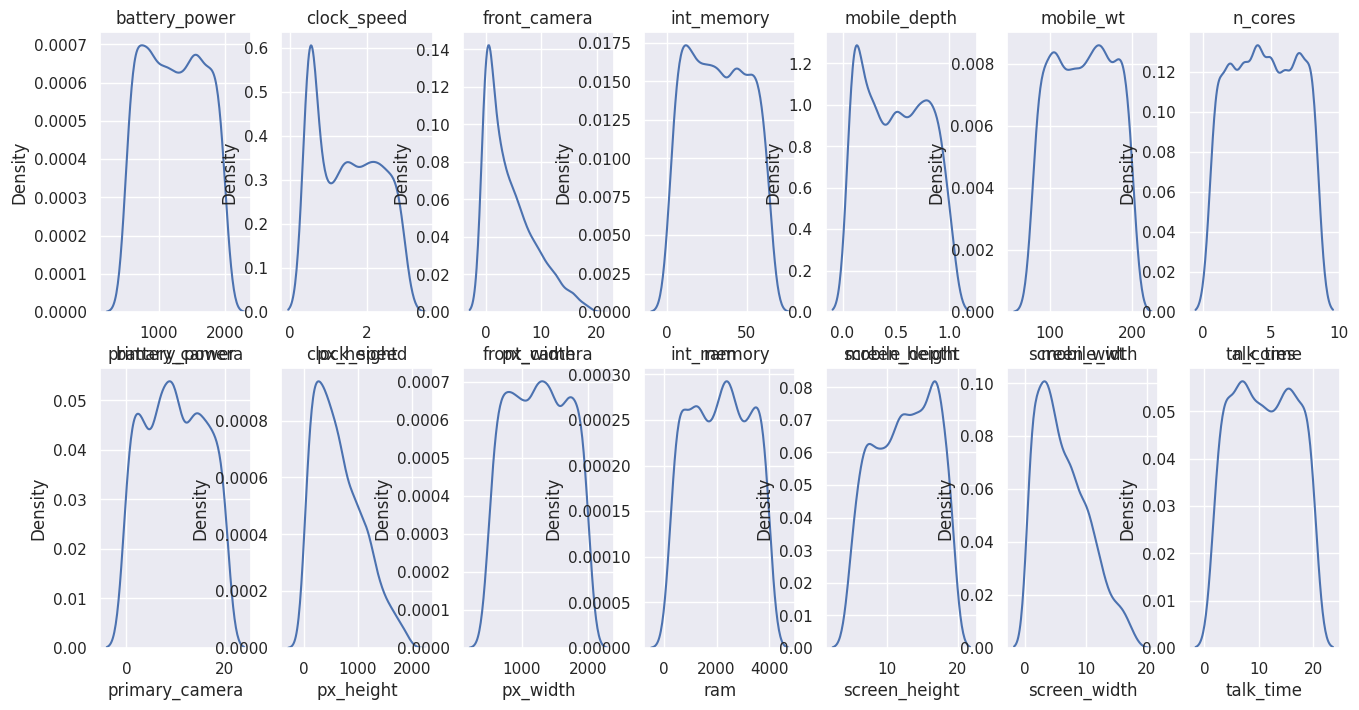

In [ ]:
# Checking density plot for numeric features
numeric_cols = ['battery_power','clock_speed', 'front_camera',
        'int_memory', 'mobile_depth', 'mobile_wt', 'n_cores',
       'primary_camera', 'px_height', 'px_width', 'ram', 'screen_height',
       'screen_width', 'talk_time']
n=1
plt.figure(figsize=(16,8))
for col in numeric_cols:
  feature = df[col]
  ax = plt.subplot(2,7,n)
  ax.set_title(col)
  sns.kdeplot(feature)
  n+=1
plt.show()

In feature of front camera, the data little is skewed. Further, these have some outliers too. So we apply power transformation. Power transformation is a type of data transformation that involves raising the original values to a specified power to create a new set of transformed values. Power transformations can be useful for several purposes, including:

1. Reducing the impact of extreme values or outliers: By raising the values to a power less than 1 (e.g., 0.5 or 0.1), the transformation can reduce the influence of large values and make the distribution of values more symmetrical.

2. Normalizing the distribution of values: Power transformations can be used to create a more normal or symmetric distribution of values, which can be useful for certain types of machine learning algorithms that assume a normal distribution of data. 

The transformation has a smoothing effect on the features and it creates a more normal distribution of values.

<Axes: ylabel='Density'>

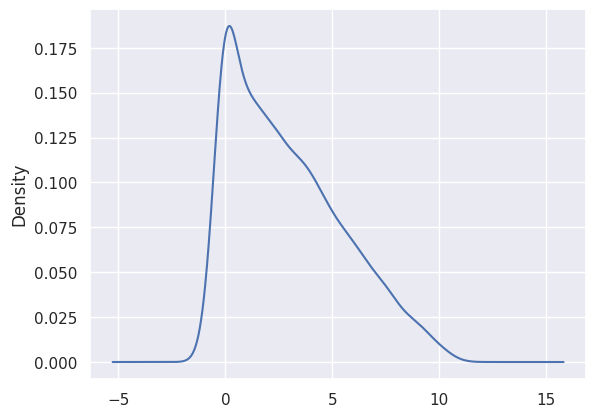

In [ ]:
df['front_camera']=df['front_camera']**.8
(df['front_camera']).plot(kind='kde')

### 6. Separating Dependent and Independent variables.

First we separate the independent features and dependent feature.

In [ ]:
df.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       'four_g', 'int_memory', 'mobile_depth', 'mobile_wt', 'n_cores',
       'primary_camera', 'px_height', 'px_width', 'ram', 'screen_height',
       'screen_width', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

In [ ]:
# output of model is the price_range
# creating list of feature names first
dependent_var = 'price_range'
independent_var = list(df.columns)
independent_var.remove(dependent_var)

In [ ]:
independent_var

['battery_power',
 'bluetooth',
 'clock_speed',
 'dual_sim',
 'front_camera',
 'four_g',
 'int_memory',
 'mobile_depth',
 'mobile_wt',
 'n_cores',
 'primary_camera',
 'px_height',
 'px_width',
 'ram',
 'screen_height',
 'screen_width',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [ ]:
X = df[independent_var]
X.tail()

battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
1995            794       True          0.5      True      0.000000    True   
1996           1965       True          2.6      True      0.000000   False   
1997           1911      False          0.9      True      1.000000    True   
1998           1512      False          0.9     False      3.031433    True   
1999            510       True          2.0      True      3.623898    True   

      int_memory  mobile_depth  mobile_wt  n_cores  primary_camera  px_height  \
1995           2           0.8        106        6              14       1222   
1996          39           0.2        187        4               3        915   
1997          36           0.7        108        8               3        868   
1998          46           0.1        145        5               5        336   
1999          45           0.9        168        6              16        483   

      px_width   ram  screen_height  screen_width  talk_time  three_g  \
1995      1890   668             13             4         19     True   
1996      1965  2032             11            10         16     True   
1997      1632  3057              9             1          5     True   
1998       670   869             18            10         19     True   
1999       754  3919             19             4          2     True   

      touch_screen   wifi  
1995          True  False  
1996          True   True  
1997          True  False  
1998          True   True  
1999          True   True

In [ ]:
y = df[[dependent_var]]
y.head()

price_range
0            1
1            2
2            2
3            2
4            1

### 7. Data Splitting

The train-test split is a technique for evaluating the performance of a machine learning algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset. The objective is to estimate the performance of the machine learning model on new data i.e. data not used to train the model.

In [ ]:
# splitting in ratio train:test = 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state = 0)

In [ ]:
X_train.shape, y_train.shape

((1364, 20), (1364, 1))

In [ ]:
X_test.shape, y_test.shape

((455, 20), (455, 1))

##### What data splitting ratio have you used and why? 

We have used 0.75 as the splitting ratio. Previously we had 1819 rows. Now training set has 0.75*1819 = 1364 rows and remaining 455 rows in testing data.
Since the dataset with 1819 rows is already a small data, we need to keep as many rows for testing set as possible. 455 seems to be good number against 1364 for training so we use 0.75 as splitting ratio. 

### 8. Data Scaling

In [ ]:
# using minmaxscaler to scale the data
scaler = StandardScaler()
# using scaler object to fit to training data and then transform the train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The training data is now scaled between 0 and 1 according to the minimum and maximum value in the data.

In [ ]:
X_train_scaled

array([[0.87307949, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.30327321, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.54241817, 1.        , 0.52      , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.14161657, 0.        , 0.44      , ..., 1.        , 0.        ,
        0.        ],
       [0.97327989, 1.        , 0.56      , ..., 0.        , 0.        ,
        0.        ],
       [0.51770207, 1.        , 0.96      , ..., 1.        , 1.        ,
        1.        ]])

##### Which method have you used to scale you data and why?

Normalization scales the values of a feature to a range between 0 and 1. This is done by subtracting the minimum value of the feature from each value, and then dividing by the range of the feature.

Standardization scales the values of a feature to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the feature from each value, and then dividing by the standard deviation.


We have used Normalization using MinMaxScaler function. Normalization of data is done when the data distribution is unknown or the data doesn't have Gaussian Distribution. Standardized data is usually preferred when the data has a bell curve i.e. it has gaussian distribution. Since all of our features do not have gaussian distribution, we use Normalization.

### 9. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is a technique used to reduce the number of features or variables in a dataset while preserving the most important information. Dimensionality reduction is useful mainly in following cases:

1. High-Dimensional Data: When the dataset has a large number of features, it may be challenging to fit a regression model without overfitting. Dimensionality reduction can help reduce the number of features, making the model more manageable and reducing the risk of overfitting.

2. Multicollinearity: When two or more variables in the dataset are highly correlated, it can cause problems for the regression model, as it can be challenging to distinguish between the effects of each variable. Dimensionality reduction can help remove the redundant features and improve the accuracy of the model.

3. Computationally Expensive Models: Some regression models may be computationally expensive, especially when working with large datasets. By reducing the number of features, dimensionality reduction can make the model more efficient and faster to run.

In this dataset, we have only 21 features, which is not high compared to real life machine learning problems. And again we do not have many rows (less than 1400 after splitting). All in all, the data is not very large and so we do not want to reduce the dimension. So we won't use dimensionality reduction.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced datasets are typically an issue in classification tasks, where there are discrete target classes, and the imbalance occurs when the number of instances in one class is significantly higher or lower than the number of instances in other classes.

In [ ]:
df['price_range'].value_counts()

3    461
2    456
1    451
0    451
Name: price_range, dtype: int64

Here, all the 4 target classes have almost similar numbers and so the target variable is not imbalanced.

## ***7. ML Model Implementation***

For each of the model, we first create the model and then train the model on training dataset. Then we make the predictions on testing dataset. To measure the performance of model we use performance metrics of accuracy, precision, recall, f1-score and roc-auc score along with roc curve. We also plot the features along with the importances given by the model. 

### ML Model 1 - Decision Tree

First we create decision tree model without tuning the hyper-parameters so that the tree overfits and we can compare the tuned tree with overfit tree.

In [ ]:
# creating decision tree classifier
clf_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
# fitting the model on training dataset
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# making predictions using the model on test dataset
y_pred_dt = clf_dt.predict(X_test)

In [ ]:
# checking the test data and predicted data side by side
y_test[:20], y_pred_dt[:20]

(      price_range
 1593            2
 714             3
 1054            1
 18              1
 1709            3
 754             1
 1448            1
 803             2
 633             1
 678             3
 738             1
 1916            1
 1273            1
 6               3
 563             1
 781             2
 1397            0
 1093            0
 1175            2
 129             0,
 array([2, 2, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 2, 0, 0, 2, 0]))

Before going for hyper-parameter tuning, we check the attributes of the overfitted tree.

In [ ]:
# getting number of leaf nodes
clf_dt.get_n_leaves()

139

In [ ]:
# depth level of the tree
clf_dt.get_depth()

12

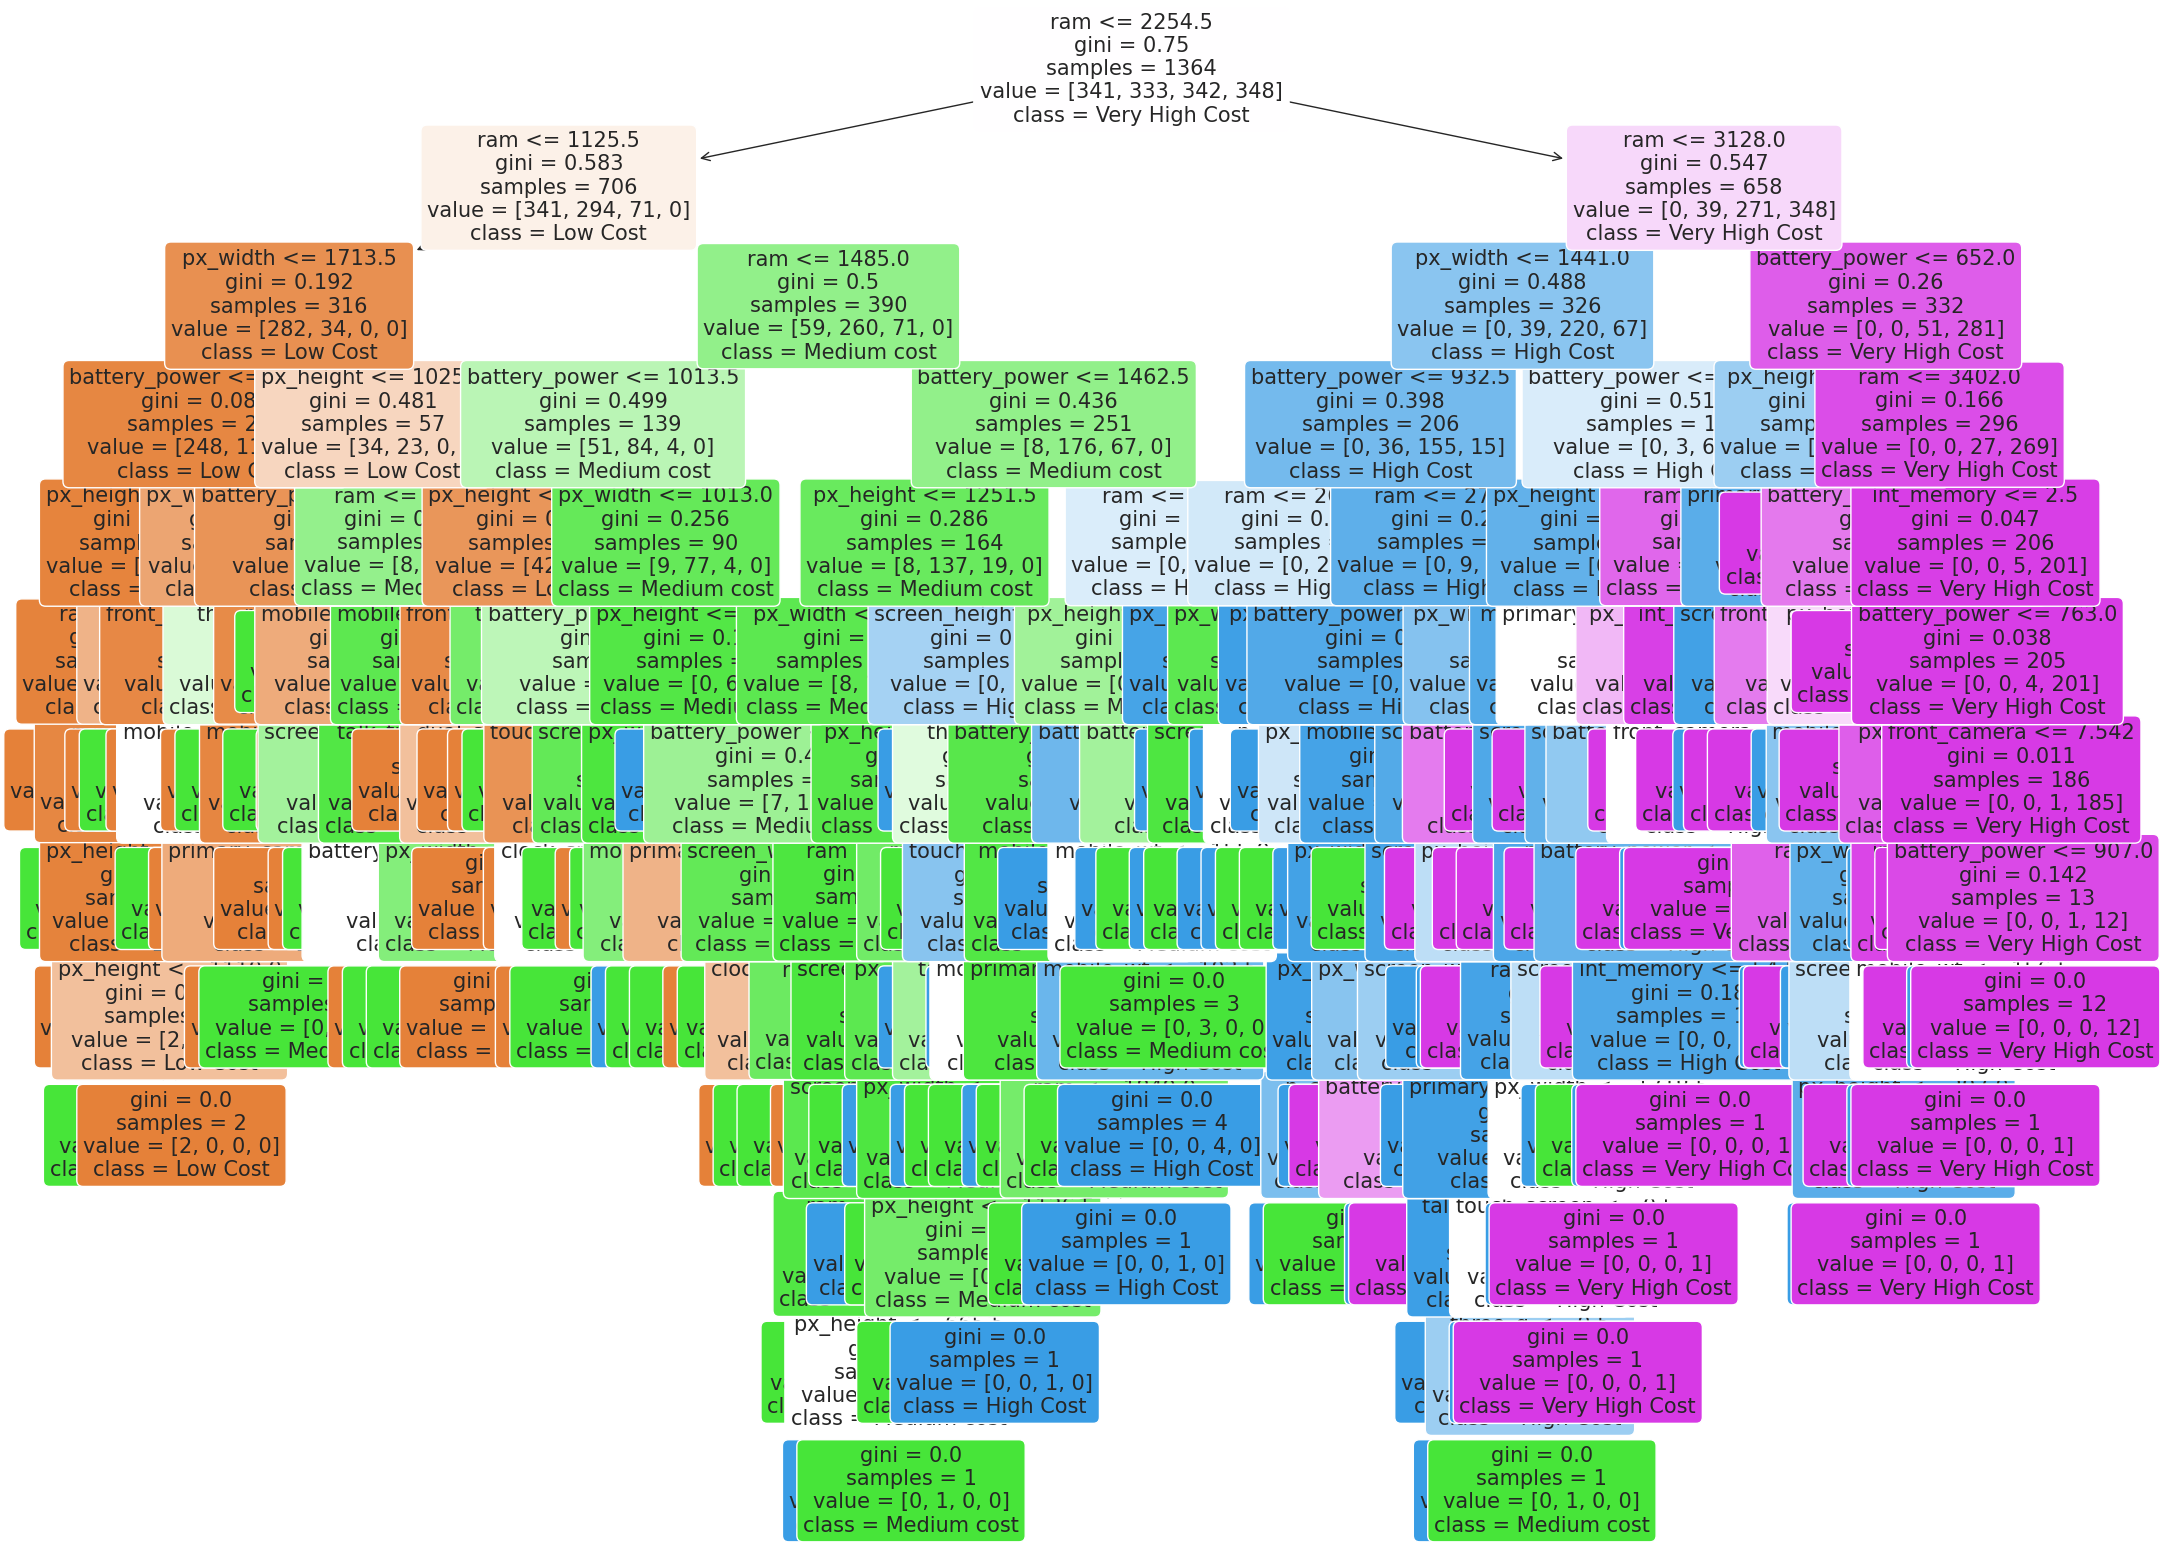

In [ ]:
# plotting the decision tree
plt.figure(figsize=(25,20))
plot_tree(clf_dt, feature_names = independent_var , class_names = label, filled = True, rounded = True, fontsize = 15)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A decision tree is a graphical representation of a decision-making process that follows a tree-like structure. It starts with a single node, known as the root node, and then branches out into several possible outcomes or decisions at each subsequent node. Each decision or outcome is based on a set of criteria or conditions, which are typically expressed as a series of if-then statements. The final outcomes of the decision tree are represented by the leaves or endpoints of the tree.

Now we check the performance of model using performance metrices.

In [ ]:
# accuracy on predictions on test data
accuracy_score(y_test, y_pred_dt)

0.810989010989011

In [ ]:
# accuracy on predictaion on training data
accuracy_score(y_train, clf_dt.predict(X_train))

1.0

100% accuracy on training data means the model has overfitted on the training data.

In [ ]:
# classification report containing recall, precision and f1-score for the label classes 
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       110
           1       0.71      0.81      0.76       118
           2       0.76      0.71      0.73       114
           3       0.91      0.87      0.89       113

    accuracy                           0.81       455
   macro avg       0.82      0.81      0.81       455
weighted avg       0.82      0.81      0.81       455



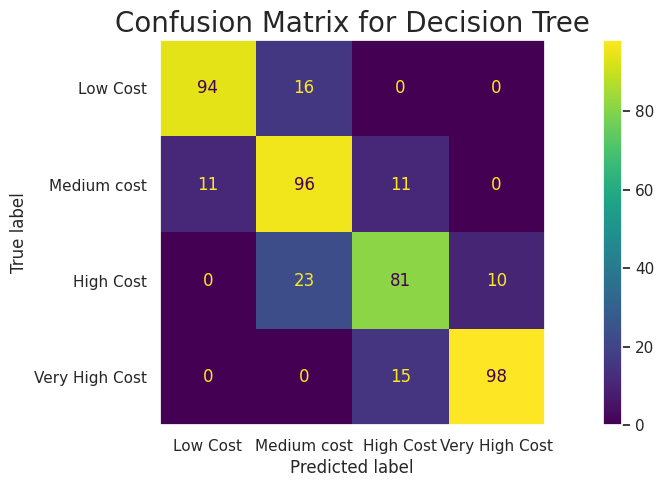

In [ ]:
# displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt),display_labels = label).plot()
fig = disp.ax_.get_figure() 
plt.title('Confusion Matrix for Decision Tree', fontsize = 20)
fig.set_figwidth(15)
fig.set_figheight(5) 
plt.grid(False)
plt.show()

To improve modularity of code, we define function to plot receiver operating characteristics (ROC) curve.

In [ ]:
# function to plot roc curve
def plot_roc_curve(classifier, algorithm):
  # using a LabelBinarizer to binarize the target by one-hot-encoding in a One vs Rest fashion
  y_pred_prob = classifier.predict_proba(X_test)

  label_binarizer = LabelBinarizer().fit(y_train)
  y_onehot_test = label_binarizer.transform(y_test)
  # y_onehot_test.shape

  fig, ax = plt.subplots(figsize=(12, 8))
  colors = ["aqua", "darkorange", "cornflowerblue", "red"]
  for i in range(len(label)):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],
        y_pred_prob[:, i],
        name=f"{label[i]} vs the rest",
        color=colors[i],
        ax=ax
    )
  macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_pred_prob,
    multi_class="ovr",
    average="weighted",
  ) 
  
  plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"One-vs-Rest ROC curves for {algorithm} \n Macro-averaged One-vs-Rest ROC AUC score:, {macro_roc_auc_ovr}")
  plt.legend()
  plt.show()

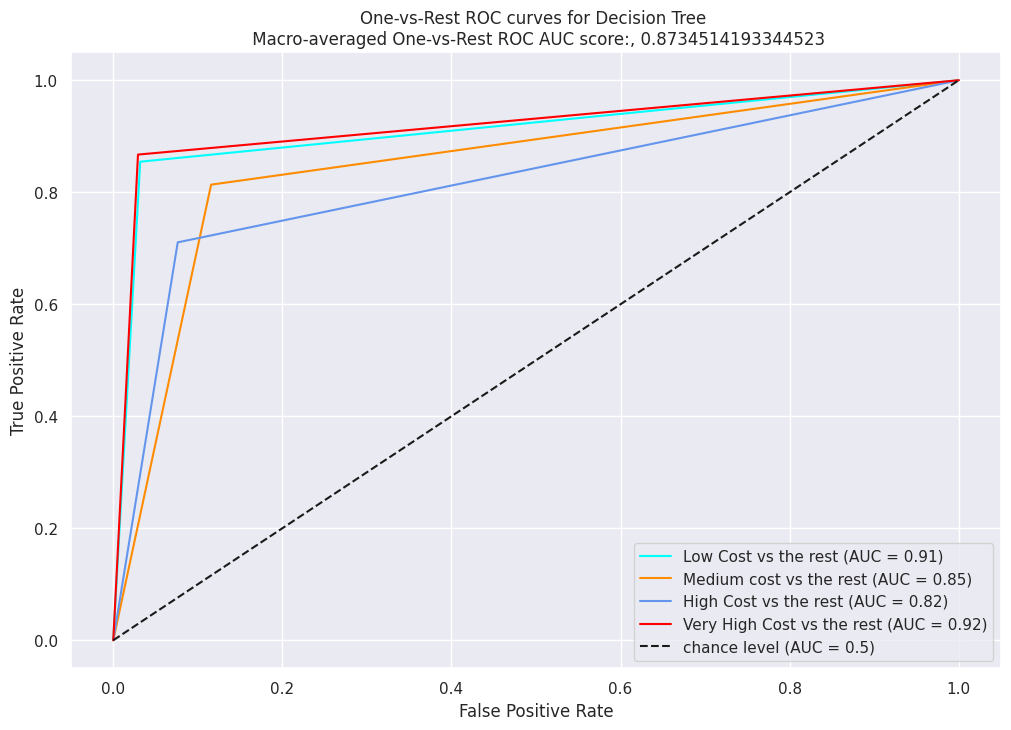

In [ ]:
# plotting roc curve for decision tree
plot_roc_curve(clf_dt, 'Decision Tree')

**INFERENCE:** Since the decision tree model is not tuned, it has overfitted as we have a training accuracy of 100%. The precision and recall are low for the middle classes of medium and high cost (less than 0.8) which is also evident from the confusion matrix where the predicted labels have spilled over to other classes and we also see low roc-auc score for those classes.

#### 2. Cross- Validation & Hyperparameter Tuning

Now we perform hyper-parameter tuning on decision tree. Previously the tree had 155 node leaves and depth 13. So we perform grid search on node leaves between 10 to 150 and on depth between 1 to 13.

In [ ]:
# creating dictionary of parameters for grid search
params = {'max_leaf_nodes':range(10,150,5), 'max_depth': range(1,13,2)}
# performing grid search and fitting it on training dataset
clf_dt2 = GridSearchCV(DecisionTreeClassifier(criterion = 'gini', random_state = 0), param_grid = params, scoring = 'accuracy')
clf_dt2.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 13, 2),
                         'max_leaf_nodes': range(10, 150, 5)},
             scoring='accuracy')

In [ ]:
# bestvestimator attributes gives the decisin tree with best accuracy
clf_dt2.best_estimator_

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=50, random_state=0)

In [ ]:
# result of gridsearchcv for all combination from parameter grid and sorting based on rank
pd.set_option('display.max_rows', 500)
pd.DataFrame(clf_dt2.cv_results_).sort_values('rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
92        0.010235      0.000109         0.004852        0.000157   
95        0.010798      0.000467         0.005656        0.001761   
120       0.010797      0.000776         0.004756        0.000389   
148       0.010123      0.000135         0.004470        0.000102   
90        0.010274      0.000697         0.004521        0.000194   
96        0.010521      0.000144         0.004813        0.000078   
97        0.011970      0.001740         0.005341        0.000848   
99        0.010728      0.000256         0.004695        0.000076   
100       0.010918      0.000109         0.004988        0.000640   
101       0.011653      0.001412         0.005242        0.001332   
102       0.010764      0.000393         0.004582        0.000017   
98        0.011342      0.001289         0.004752        0.000167   
104       0.011319      0.000570         0.005133        0.000470   
106       0.011061      0.000297         0.005041        0.000113   
107       0.011016      0.000269         0.004864        0.000159   
108       0.011053      0.000201         0.004740        0.000199   
109       0.010876      0.000523         0.004541        0.000231   
110       0.010539      0.000126         0.004459        0.000130   
103       0.010610      0.000148         0.004560        0.000157   
105       0.011271      0.000479         0.004975        0.000179   
111       0.010936      0.000291         0.004723        0.000213   
93        0.010350      0.000065         0.004932        0.000269   
94        0.010534      0.000205         0.004748        0.000122   
91        0.010157      0.000241         0.004611        0.000119   
124       0.010680      0.000297         0.004854        0.000132   
152       0.011404      0.001606         0.005043        0.001291   
153       0.011094      0.001099         0.005032        0.000946   
154       0.011074      0.000511         0.004488        0.000278   
122       0.010541      0.000207         0.004887        0.000642   
157       0.010902      0.000213         0.004512        0.000210   
155       0.010818      0.000276         0.004377        0.000125   
150       0.010402      0.000287         0.004481        0.000081   
119       0.010217      0.000203         0.004480        0.000067   
147       0.010902      0.000876         0.004983        0.001336   
125       0.010850      0.000240         0.004676        0.000101   
126       0.011487      0.001236         0.005354        0.001151   
158       0.011767      0.001617         0.004597        0.000406   
89        0.010631      0.001810         0.004555        0.000170   
145       0.009900      0.000364         0.004740        0.000666   
117       0.009975      0.000191         0.004676        0.000231   
128       0.011050      0.000280         0.004882        0.000485   
129       0.012088      0.001303         0.004749        0.000364   
156       0.011162      0.000503         0.004836        0.000749   
127       0.011300      0.000333         0.004851        0.000422   
146       0.010006      0.000310         0.004697        0.000377   
118       0.009996      0.000110         0.004443        0.000116   
123       0.011084      0.000660         0.005041        0.000638   
151       0.010439      0.000219         0.004549        0.000449   
159       0.011279      0.000304         0.004795        0.000695   
130       0.011804      0.000781         0.004766        0.000094   
167       0.011266      0.000167         0.004724        0.000210   
166       0.011233      0.000216         0.004471        0.000045   
165       0.011162      0.000172         0.004452        0.000070   
164       0.012522      0.001910         0.004991        0.000587   
163       0.012033      0.000425         0.005211        0.000744   
162       0.011547      0.000296         0.004722        0.000209   
161       0.012164      0.001625         0.004948        0.000501   
160

The decision tree with maximum 50 leaf nodes has the best accuracy and is selected by gridsearchcv.

In [ ]:
# making predictions on test dataset
y_pred_dt2 = clf_dt2.predict(X_test)

In [ ]:
# see 1st 20 predictions along with original
y_test[:20], y_pred_dt2[:20]

(      price_range
 1593            2
 714             3
 1054            1
 18              1
 1709            3
 754             1
 1448            1
 803             2
 633             1
 678             3
 738             1
 1916            1
 1273            1
 6               3
 563             1
 781             2
 1397            0
 1093            0
 1175            2
 129             0,
 array([2, 2, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 2, 1, 0, 2, 0]))

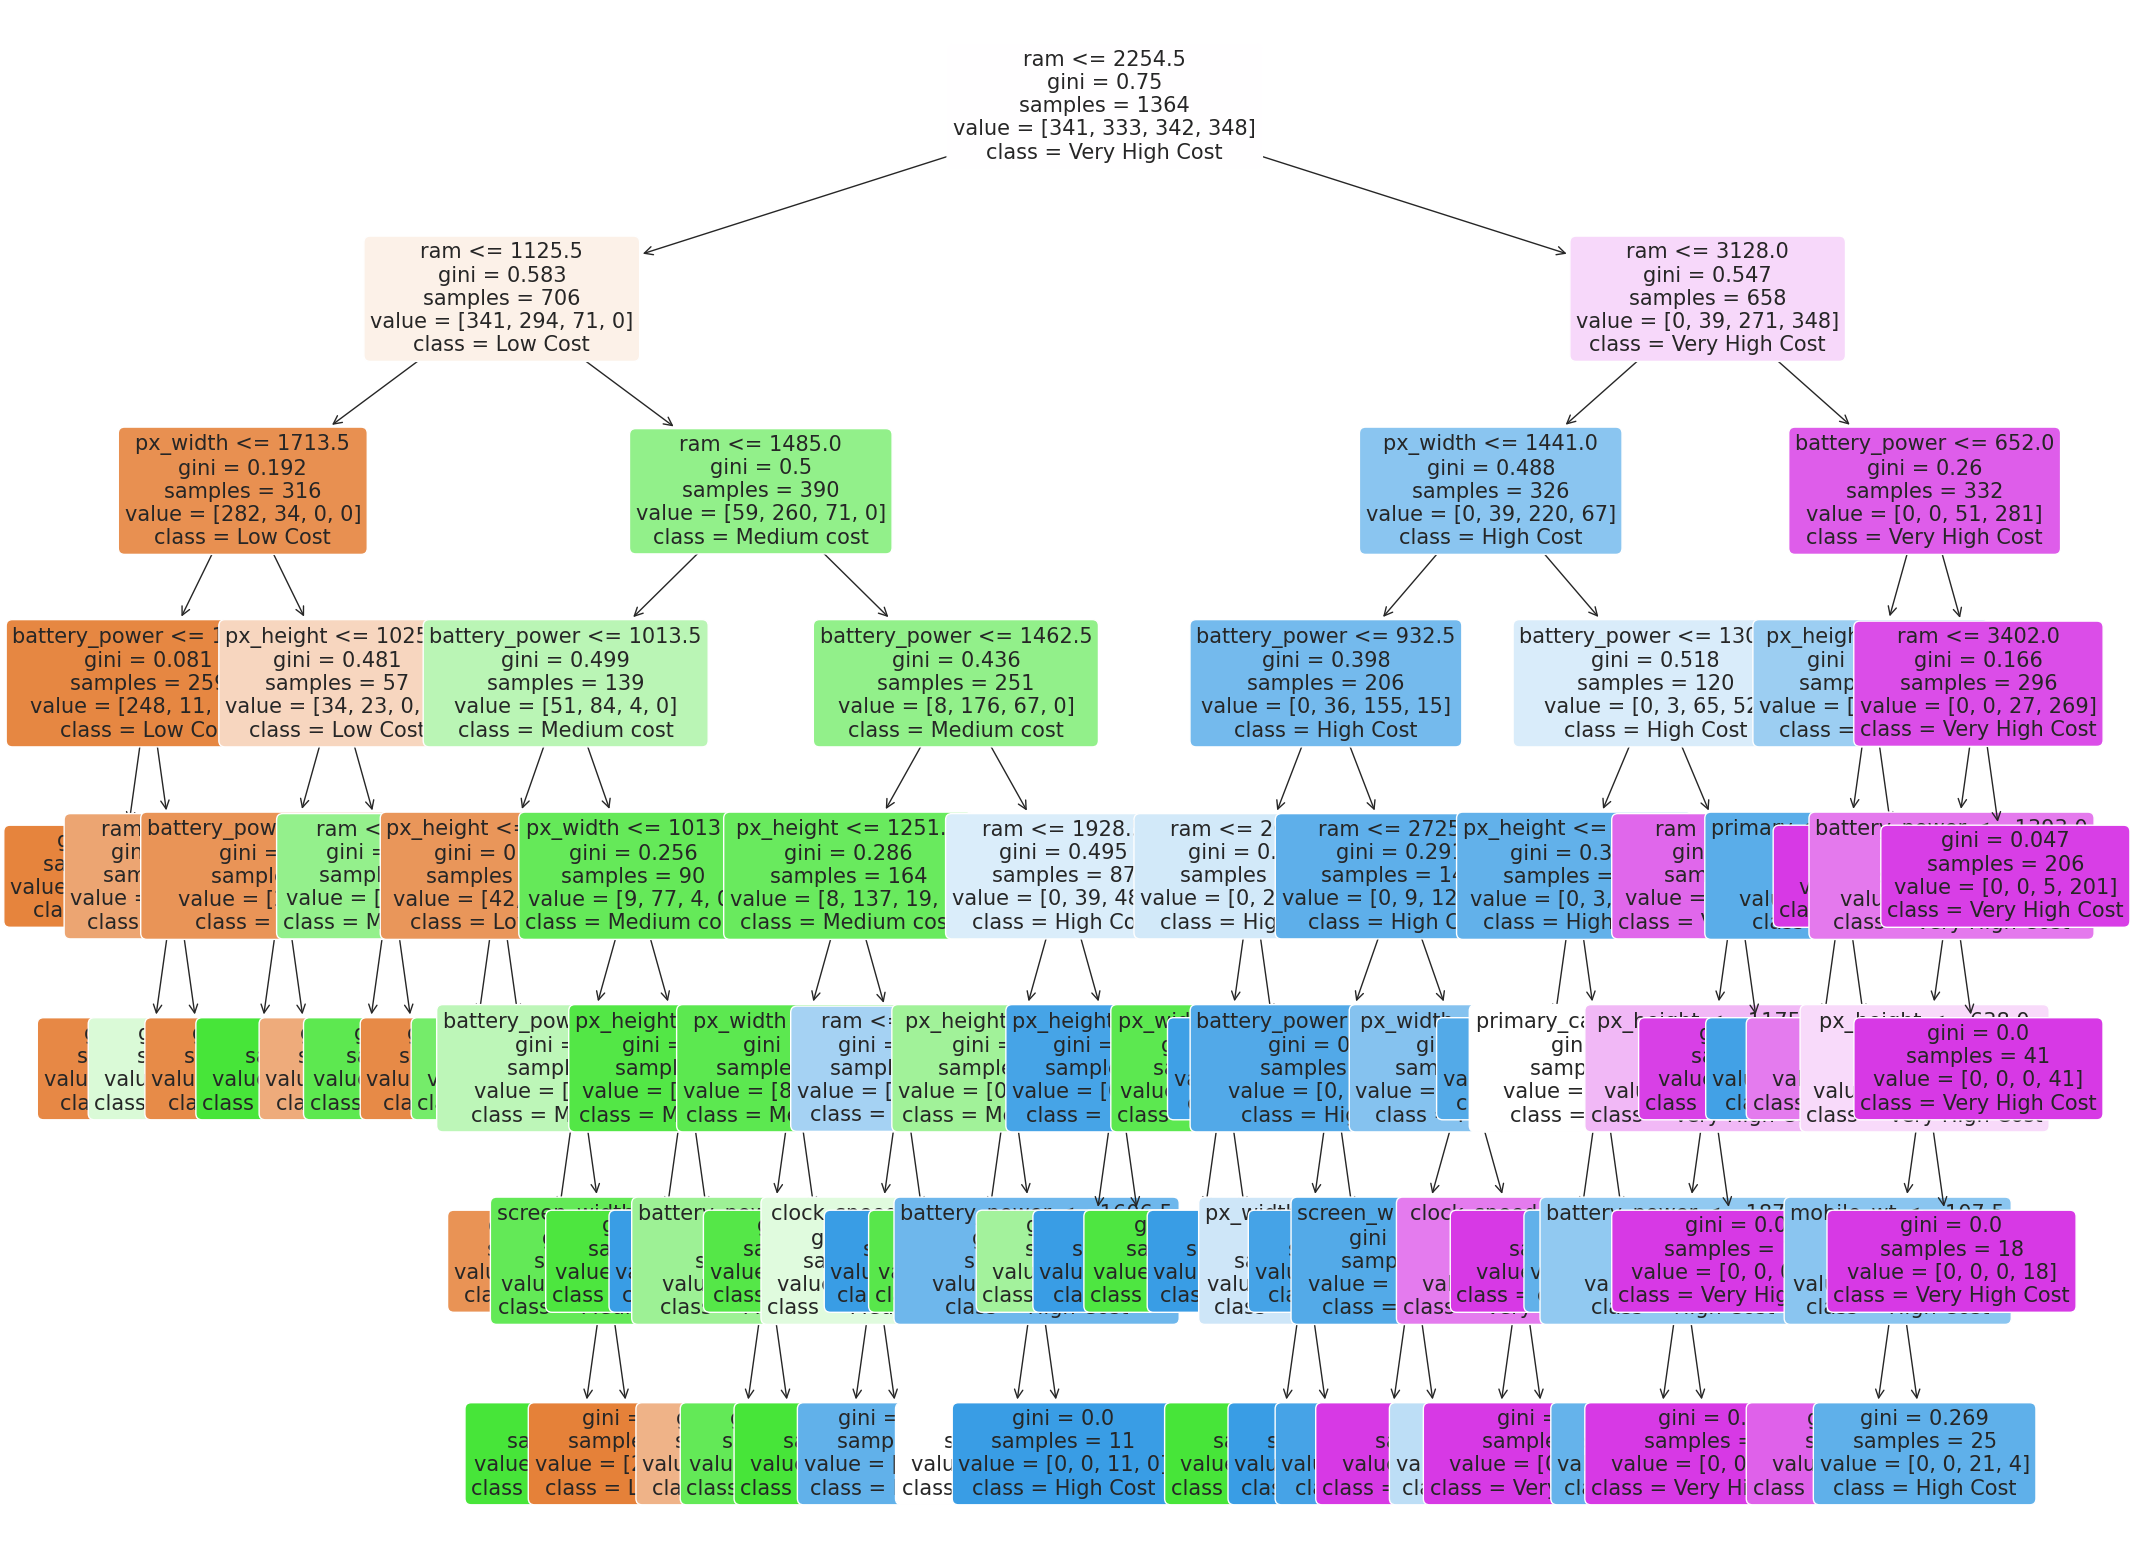

In [ ]:
# plotting the decision tree
plt.figure(figsize=(25,20))
plot_tree(clf_dt2.best_estimator_, feature_names = independent_var , class_names = label, filled = True, rounded = True, fontsize = 15)
plt.show()

In [ ]:
# accuracy on predictions on test data
accuracy_score(y_test, y_pred_dt2)

0.8417582417582418

In [ ]:
# accuracy on predictsion on training data
accuracy_score(y_train, clf_dt2.predict(X_train))

0.9420821114369502

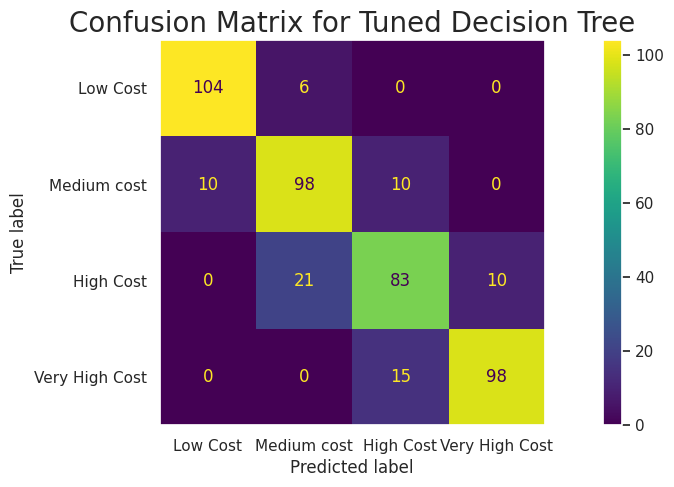

In [ ]:
# displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt2),display_labels = label).plot()
fig = disp.ax_.get_figure() 
plt.title('Confusion Matrix for Tuned Decision Tree', fontsize = 20)
fig.set_figwidth(15)
fig.set_figheight(5) 
plt.grid(False)
plt.show()

In [ ]:
# classification report containing recall, precision and f1-score for the label classes 
print(classification_report(y_test, y_pred_dt2, target_names = label))

                precision    recall  f1-score   support

      Low Cost       0.91      0.95      0.93       110
   Medium cost       0.78      0.83      0.81       118
     High Cost       0.77      0.73      0.75       114
Very High Cost       0.91      0.87      0.89       113

      accuracy                           0.84       455
     macro avg       0.84      0.84      0.84       455
  weighted avg       0.84      0.84      0.84       455



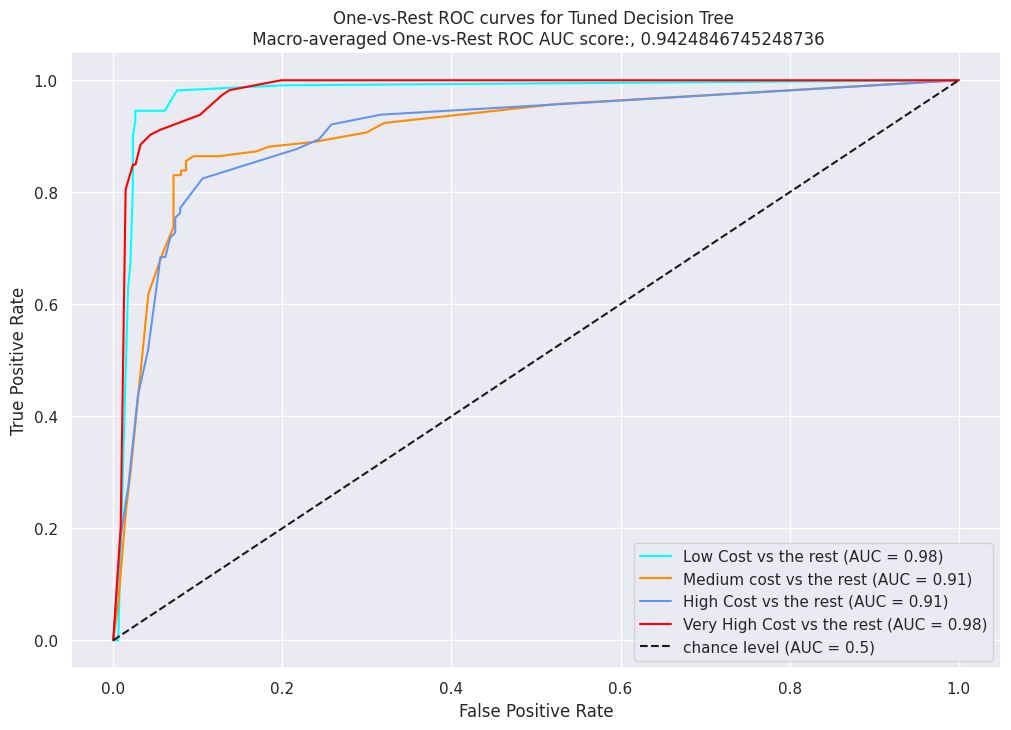

In [ ]:
# plotting roc curve for tuned decision tree
plot_roc_curve(clf_dt2, 'Tuned Decision Tree')

##### Which hyperparameter optimization technique have you used and why?

Here, we use GridsearchCV. GridSearchCV is a hyperparameter tuning technique that is commonly used to improve the performance of machine learning models. GridSearchCV is used to search for the best hyperparameters by systematically testing all possible combinations of hyperparameters from a predefined grid of values. It works by performing a cross-validation on each combination of hyperparameters and evaluating the model's performance based on a chosen metric. The best set of hyperparameters is selected based on the performance metric and returned as the final model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning the hyper-parameters, accuracy on training set has reduced thus reducing overfitting even though the accuracy on testing data has marginally increased. Recall, Precision and f1-score also marginally increased.  Roc-auc score has increased compared to overfitted tree. Overall we see an improvement in predictions after hyper-parameter tuning.

### ML Model 2 - Random Forest

In Random forest algorithm, many decision trees are combined to get a more accurate result as compared to a single tree. It avoids and prevents overfitting by using multiple trees. Here we implement Random forest.

In [ ]:
# creating random forest model
clf_rf = RandomForestClassifier(random_state = 0)
# fitting the model to training dataset
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# predicting values for testing dataset
y_pred_rf = clf_rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random forest is an ensemble machine learning algorithm that combines multiple decision trees to improve the accuracy and robustness of predictions. Each tree in the forest is trained on a randomly sampled subset of the training data and a randomly selected subset of the input features. During prediction, each tree votes on the final outcome, and the most commonly predicted outcome is selected as the final prediction. This helps to reduce the risk of overfitting and improve the generalization performance of the model.

In [ ]:
# accuracy for testing dataset
accuracy_score(y_test, y_pred_rf)

0.8637362637362638

In [ ]:
# accuracy on predictsion on training data
accuracy_score(y_train, clf_rf.predict(X_train))

1.0

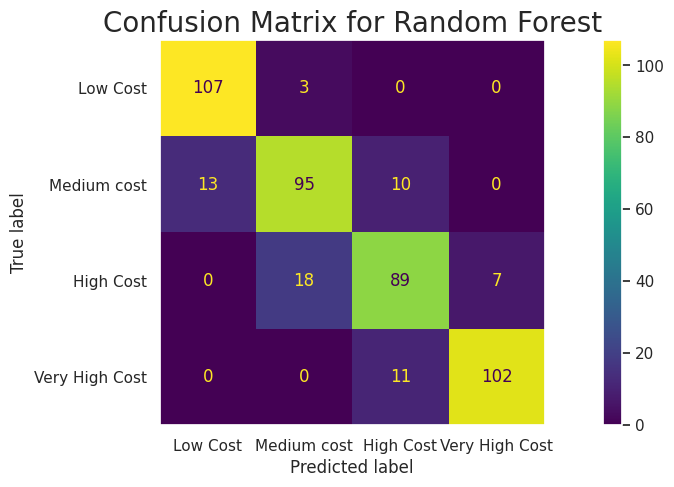

In [ ]:
# displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf),display_labels = label).plot()
fig = disp.ax_.get_figure() 
plt.title('Confusion Matrix for Random Forest', fontsize = 20)
fig.set_figwidth(15)
fig.set_figheight(5) 
plt.grid(False)
plt.show()

In [ ]:
# classification report containing recall, precision and f1-score for the label classes 
print(classification_report(y_test, y_pred_rf, target_names = label))

                precision    recall  f1-score   support

      Low Cost       0.89      0.97      0.93       110
   Medium cost       0.82      0.81      0.81       118
     High Cost       0.81      0.78      0.79       114
Very High Cost       0.94      0.90      0.92       113

      accuracy                           0.86       455
     macro avg       0.86      0.87      0.86       455
  weighted avg       0.86      0.86      0.86       455



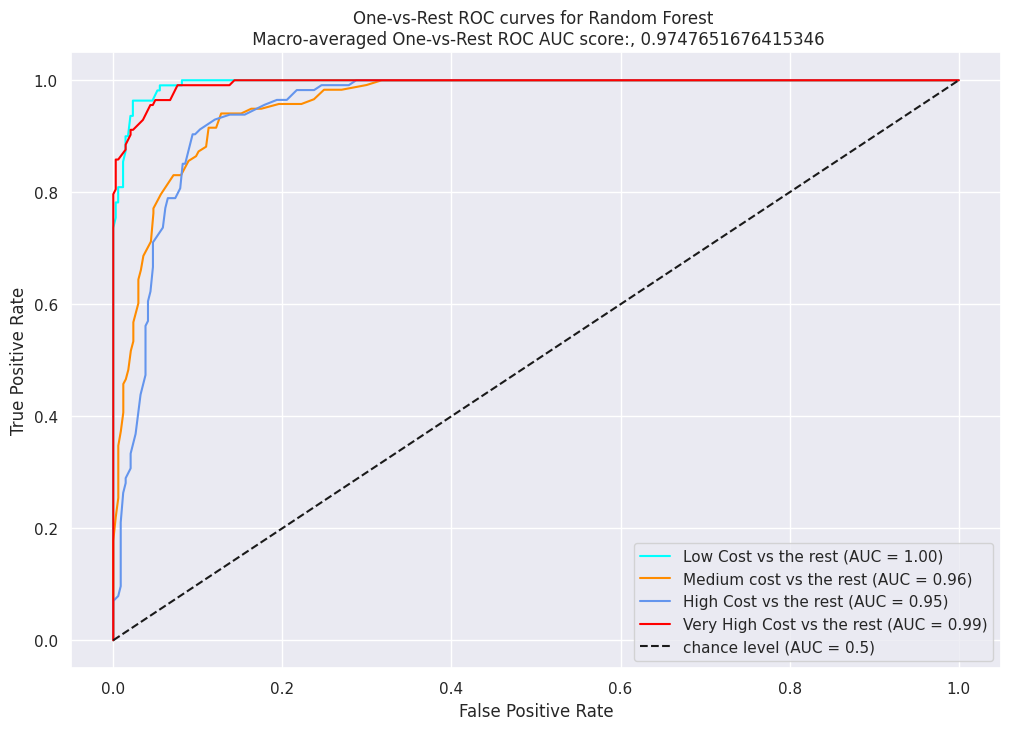

In [ ]:
# plotting roc curve for random forest
plot_roc_curve(clf_rf, 'Random Forest')

**INFERENCE:** The accuracy on testing data and training data both has increased compared to single decision tree, thus reducing overfitting. Precision, Recall, f1-score and Roc-auc score also increased for all the classes compared to decision tree.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# setting the values for hyperparameters out of which the RandomSearchCV will run the model for best estimator
parameters = {'n_estimators':np.arange(100, 1000, 50),'min_samples_split': np.arange(2,50,2),"max_depth": np.arange(2,20,2)}

rf=RandomForestClassifier(random_state = 0)
# using the above range of parameters for random forest and negative mean square error as the scoring method and 5 fold cross-validation
clf_rf2 = RandomizedSearchCV(rf, parameters, scoring='accuracy',cv=5)

In [ ]:
# fitting on training set
clf_rf2.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   scoring='accuracy')

In [ ]:
# estimator with the best performance
clf_rf2.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=450, random_state=0)

In [ ]:
# predicting test data
y_pred_rf2 = clf_rf2.predict(X_test)

In [ ]:
# comparing predicted and test values
y_pred_rf2[:10],y_test[:10]

(array([2, 2, 1, 1, 3, 1, 1, 2, 1, 3]),
       price_range
 1593            2
 714             3
 1054            1
 18              1
 1709            3
 754             1
 1448            1
 803             2
 633             1
 678             3)

In [ ]:
# accuracy on predictions on test data
accuracy_score(y_test, y_pred_rf2)

0.8747252747252747

In [ ]:
# accuracy on predictsion on training data
accuracy_score(y_train, clf_rf2.predict(X_train))

1.0

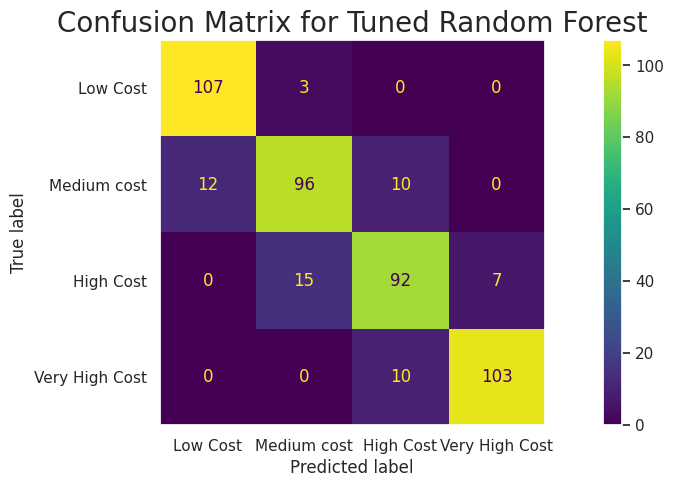

In [ ]:
# displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf2),display_labels = label).plot()
fig = disp.ax_.get_figure() 
plt.title('Confusion Matrix for Tuned Random Forest', fontsize = 20)
fig.set_figwidth(15)
fig.set_figheight(5) 
plt.grid(False)
plt.show()

In [ ]:
# classification report containing recall, precision and f1-score for the label classes 
print(classification_report(y_test, y_pred_rf2, target_names = label))

                precision    recall  f1-score   support

      Low Cost       0.90      0.97      0.93       110
   Medium cost       0.84      0.81      0.83       118
     High Cost       0.82      0.81      0.81       114
Very High Cost       0.94      0.91      0.92       113

      accuracy                           0.87       455
     macro avg       0.87      0.88      0.88       455
  weighted avg       0.87      0.87      0.87       455



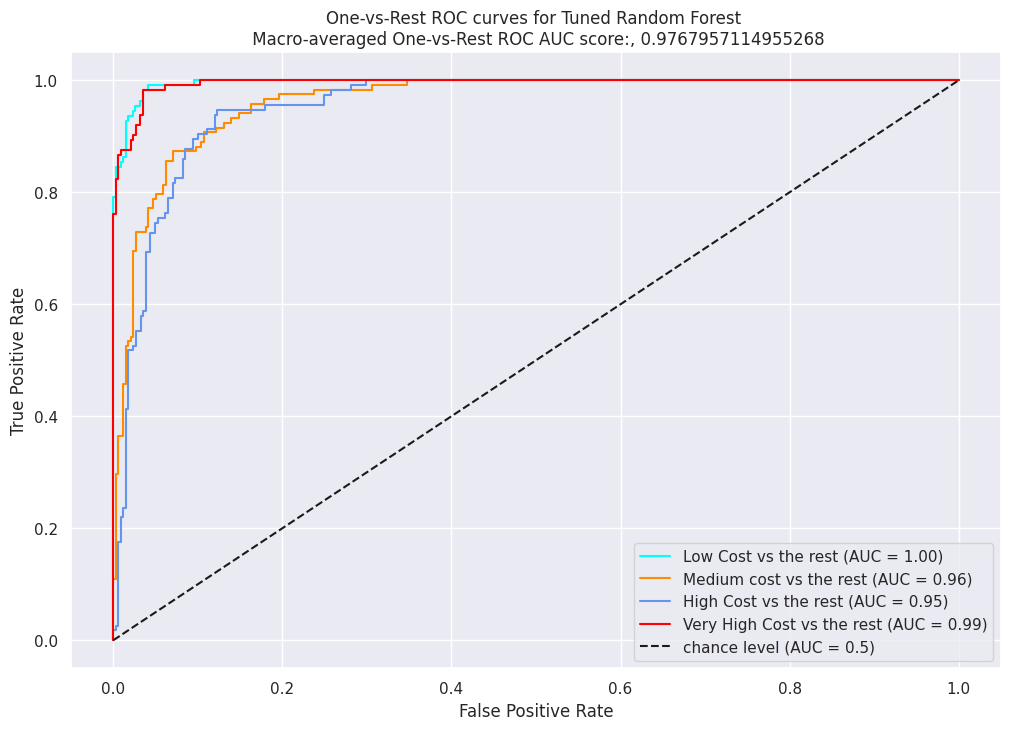

In [ ]:
# plotting roc curve for tuned random forest
plot_roc_curve(clf_rf2, 'Tuned Random Forest')

##### Which hyperparameter optimization technique have you used and why?

Randomized Search Cross-Validation (CV) works by randomly selecting a subset of hyperparameters from a defined search space and evaluating the model's performance using cross-validation. By randomly searching a subset of the hyperparameter space, Randomized Search CV is more time efficient and computationally inexpensive than Grid Search CV. And since Random Forest will be using decision trees of upto 500 in number, we use Random Search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After performing hyperparameter tuning on our model, we found that the model's performance remained the same as before tuning. This suggests that the default hyperparameters of the model were already optimal for our data and task, and no improvement in performance could be achieved by tweaking the hyperparameters. It's also possible that the hyperparameters we tested were not the right ones to tune for this particular model.

### ML Model 3 - XGBoost

In [ ]:
# creating XGboost model
clf_xg = XGBClassifier()
# fitting the model to training dataset
clf_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# predicting values for testing dataset
y_pred_xg = clf_xg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost (Extreme Gradient Boosting) involves sequentially adding weak decision trees to a model, with each new tree correcting the errors of the previous trees. XGBoost uses a combination of gradient descent and regularization techniques to minimize a loss function and improve the accuracy of predictions. It also has several advanced features, such as the ability to handle missing values, parallel processing, and support for different types of objective functions.

In [ ]:
# accuracy for testing dataset
accuracy_score(y_test, y_pred_xg)

0.9098901098901099

In [ ]:
# accuracy on predictsion on training data
accuracy_score(y_train, clf_xg.predict(X_train))

1.0

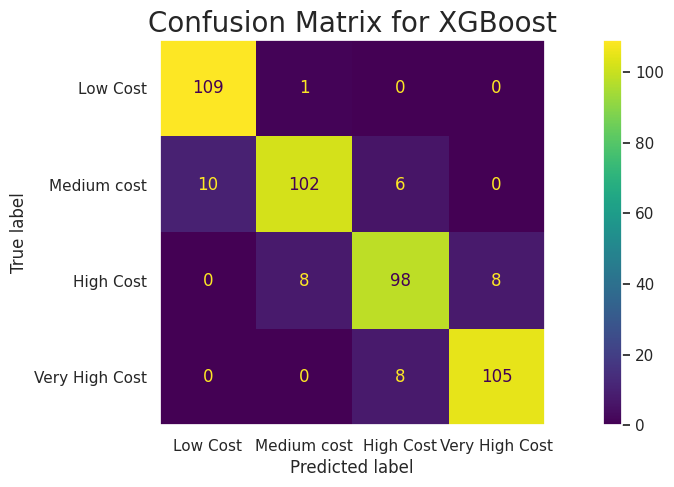

In [ ]:
# displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xg),display_labels = label).plot()
fig = disp.ax_.get_figure() 
plt.title('Confusion Matrix for XGBoost', fontsize = 20)
fig.set_figwidth(15)
fig.set_figheight(5) 
plt.grid(False)
plt.show()

In [ ]:
# classification report containing recall, precision and f1-score for the label classes 
print(classification_report(y_test, y_pred_xg, target_names = label))

                precision    recall  f1-score   support

      Low Cost       0.92      0.99      0.95       110
   Medium cost       0.92      0.86      0.89       118
     High Cost       0.88      0.86      0.87       114
Very High Cost       0.93      0.93      0.93       113

      accuracy                           0.91       455
     macro avg       0.91      0.91      0.91       455
  weighted avg       0.91      0.91      0.91       455



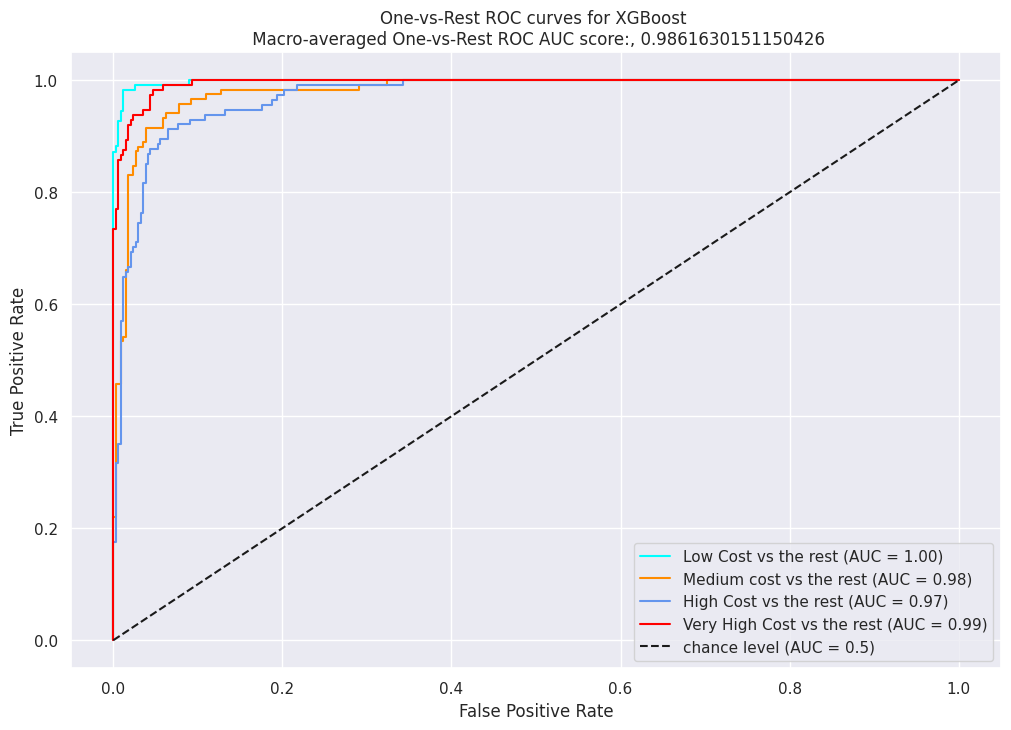

In [ ]:
# plotting roc curve for XGboost model
plot_roc_curve(clf_xg, 'XGBoost')

**INFERENCE:** XGBoost has outperformed decision tree and random forest with testing accuracy of more than 90%. It also gives 100% accuracy on train set meaning it has overfitted upto some degree, however 91% accuracy on the test set suggests that it is generalizing well to new, unseen data, and is not simply memorizing the training set. Precision, Recall, f1-score and roc-auc score have also increased. Though it still underperforms for classes Medium and High Cost as f1-score is below 0.9, compared to Low and Very high cost classes. 

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# setting the values for hyperparameters out of which the RandomSearchCV will run the model for best estimator
parameters = {'learning_rate': np.arange(0.01, 0.2, 0.01),
            'max_depth': np.arange(3, 10),
            'min_child_weight': np.arange(1, 10),
             'subsample': np.arange(0.5, 1, 0.05),
             'colsample_bytree': np.arange(0.5, 1, 0.05),
            'gamma': np.arange(0, 5, 0.5),
            'n_estimators': np.arange(100, 1000, 50)
}

xg=XGBClassifier(random_state = 0)
# using the above range of parameters for random forest and negative mean square error as the scoring method and 5 fold cross-validation
clf_xg2 = RandomizedSearchCV(xg, parameters, scoring='accuracy',cv=5)

In [ ]:
# fitting on training set
clf_xg2.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950]),
                                        'subsample': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
                   scoring='accuracy')

In [ ]:
# estimator with the best performance
clf_xg2.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9500000000000004, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15000000000000002,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=650, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# predicting test data
y_pred_xg2 = clf_xg2.predict(X_test)

In [ ]:
# comparing predicted and test values
y_pred_xg2[:10],y_test[:10]

(array([2, 3, 1, 1, 3, 1, 1, 2, 1, 3]),
       price_range
 1593            2
 714             3
 1054            1
 18              1
 1709            3
 754             1
 1448            1
 803             2
 633             1
 678             3)

In [ ]:
# accuracy on predictions on test data
accuracy_score(y_test, y_pred_xg2)

0.9252747252747253

In [ ]:
# accuracy on predictsion on training data
accuracy_score(y_train, clf_xg2.predict(X_train))

1.0

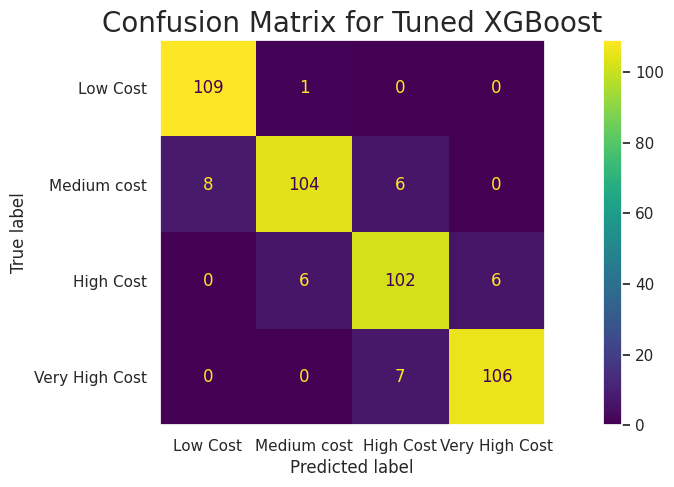

In [ ]:
# displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xg2),display_labels = label).plot()
fig = disp.ax_.get_figure() 
plt.title('Confusion Matrix for Tuned XGBoost', fontsize = 20)
fig.set_figwidth(15)
fig.set_figheight(5) 
plt.grid(False)
plt.show()

In [ ]:
# classification report containing recall, precision and f1-score for the label classes 
print(classification_report(y_test, y_pred_xg2, target_names = label))

                precision    recall  f1-score   support

      Low Cost       0.93      0.99      0.96       110
   Medium cost       0.94      0.88      0.91       118
     High Cost       0.89      0.89      0.89       114
Very High Cost       0.95      0.94      0.94       113

      accuracy                           0.93       455
     macro avg       0.93      0.93      0.93       455
  weighted avg       0.93      0.93      0.92       455



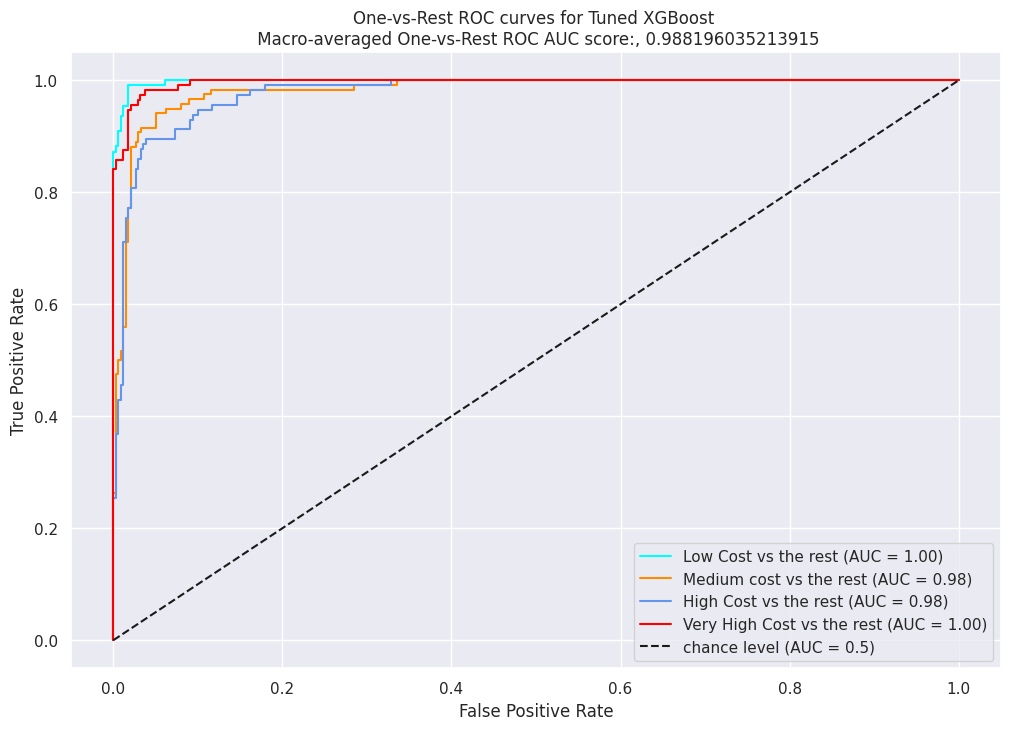

In [ ]:
# plotting roc curve for tuned XGBoost
plot_roc_curve(clf_xg2, 'Tuned XGBoost')

##### Which hyperparameter optimization technique have you used and why?

Randomized Search Cross-Validation (CV) works by randomly selecting a subset of hyperparameters from a defined search space and evaluating the model's performance using cross-validation. By randomly searching a subset of the hyperparameter space, Randomized Search CV is more time efficient and computationally inexpensive than Grid Search CV. And since we have large space of hyperparameters out of which random search cv will search, that too for a complex model like XGBoost, we use Randomized search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There was a slight dip in performance after hyperparameter tuning on test set even though on train set its accuracy is 100% meaning the degree of overfitting has increased. Few of the reasons could be:


*   If the optimization metric is not well-suited to the problem or the data, the hyperparameters that are selected may not result in the best performance on the test data.
*   Randomness is inherent in the XGBoost algorithm, and the performance of the model can be affected by the random initialization of the model and the stochastic nature of the gradient boosting process. This can result in different outcomes when hyperparameters are tuned, even if the same search space and methodology are used.


*   It is possible that the tuning process did not explore the hyperparameter space thoroughly enough, resulting in suboptimal hyperparameters.


*   It is possible to overfit the model to the training data by selecting hyperparameters that work well on the training data, but do not generalize well to the test data. This can result in a decrease in performance on the test data.





### ML Model 4 - K-Nearest Neighbours

To implement K-nearest neighbour algorithm, we have to give specify the value of k which refers to the number of nearest neighbours to include in the majority of the voting process. So for k between 1 to 15, we plot the training and testing accuracy for model and we choose the model which has maximum training and testing accuracy. KNN works on scaled data as its a distance based algorithm, so we use scaled train and test dataset.

In [ ]:
neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# creating knn model for different k and storing the accuracies
for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

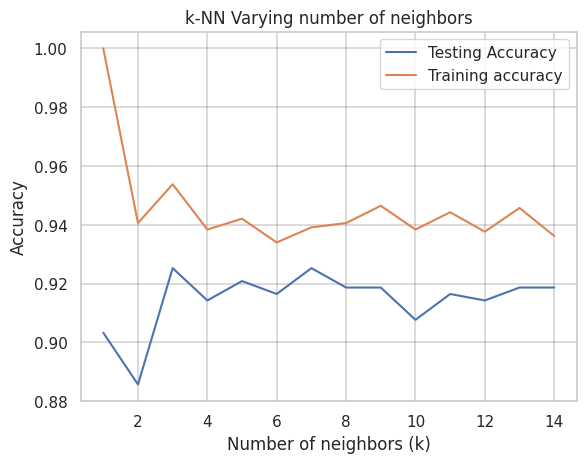

In [ ]:
# Plot the accuracy for different k
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.grid(visible =True, color='black', linestyle='-', linewidth=0.2)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

For k = 8, we have highest training and testing accuracy together. When k is increased, training accuracy decreases and model moves towards underfitting. And when k is decreased, testing accuracy decreases and training accuracy increases and model moves towards overfitting. So k = 8, is an optimum choice.

In [ ]:
# Setup a knn classifier with 8 neighbors
clf_knn = KNeighborsClassifier(n_neighbors=8)

In [ ]:
# Fit the model
clf_knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_pred_knn = clf_knn.predict(X_test_scaled)
# see 1st 20 predictions along with original
y_test[:20], y_pred_knn[:20]

(      price_range
 1593            2
 714             3
 1054            1
 18              1
 1709            3
 754             1
 1448            1
 803             2
 633             1
 678             3
 738             1
 1916            1
 1273            1
 6               3
 563             1
 781             2
 1397            0
 1093            0
 1175            2
 129             0,
 array([1, 3, 2, 2, 3, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 3, 2]))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Nearest Neighbors (KNN)  works by comparing a new observation or data point with its K nearest neighbors in the training set, where K is a user-defined hyperparameter. The class of the new observation is then determined by a majority vote among its K nearest neighbors. KNN is a non-parametric algorithm and does not make any assumptions about the underlying data distribution. 

In [ ]:
# accuracy for testing dataset
accuracy_score(y_test, y_pred_knn)

0.44835164835164837

In [ ]:
# accuracy on predictsion on training data
accuracy_score(y_train, clf_knn.predict(X_train))

0.9391495601173021

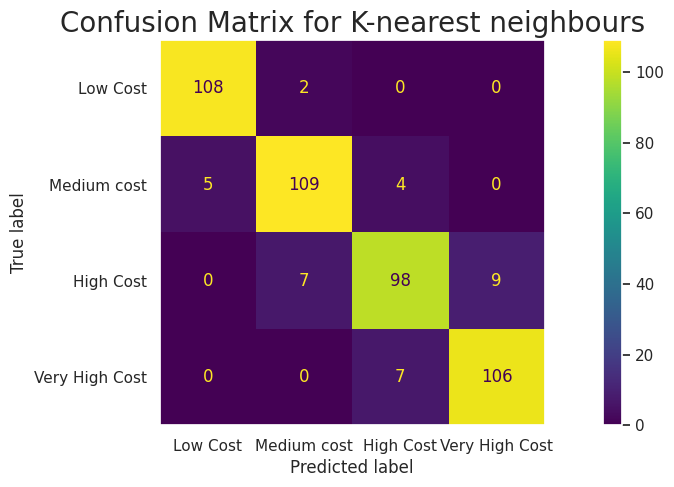

In [ ]:
# displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn),display_labels = label).plot()
fig = disp.ax_.get_figure() 
plt.title('Confusion Matrix for K-nearest neighbours', fontsize = 20)
fig.set_figwidth(15)
fig.set_figheight(5) 
plt.grid(False)
plt.show()

In [ ]:
# classification report containing recall, precision and f1-score for the label classes 
print(classification_report(y_test, y_pred_knn, target_names = label))

                precision    recall  f1-score   support

      Low Cost       0.96      0.98      0.97       110
   Medium cost       0.92      0.92      0.92       118
     High Cost       0.90      0.86      0.88       114
Very High Cost       0.92      0.94      0.93       113

      accuracy                           0.93       455
     macro avg       0.93      0.93      0.93       455
  weighted avg       0.92      0.93      0.92       455



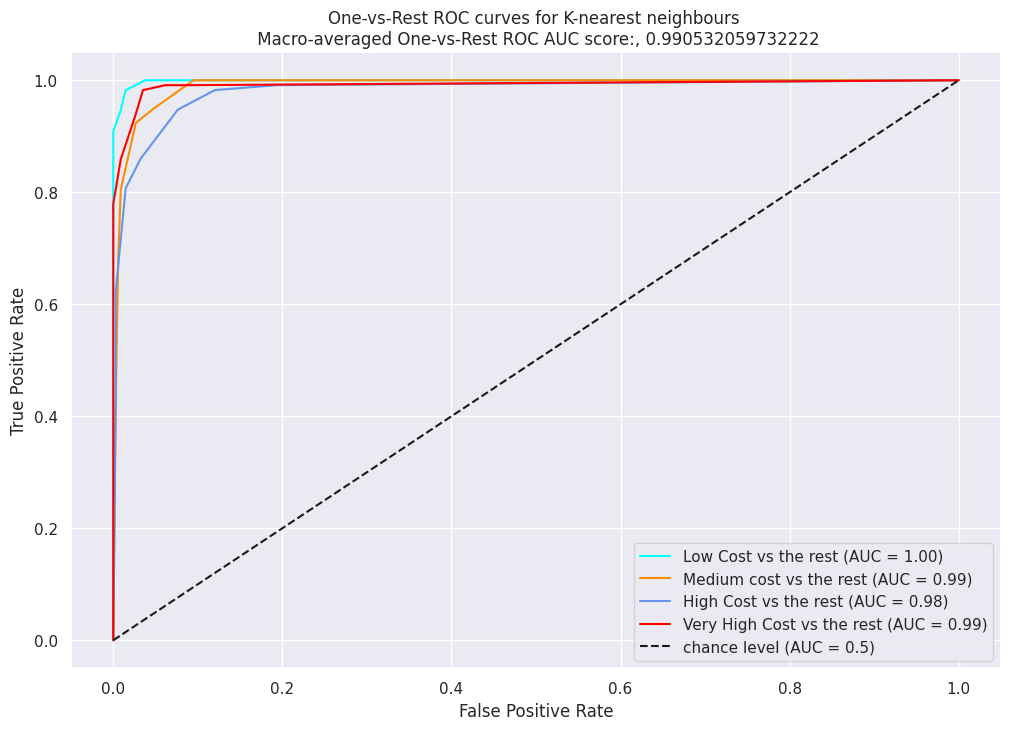

In [ ]:
# plotting roc curve for KNN model
plot_roc_curve(clf_knn, 'K-nearest neighbours')

**INFERENCE:** K-Nearest Neighbour algorithm has outperformed every tree based algorithm. It has test accuracy of more than 92%. Further there is no overfitting as train accuracy is almost same as the test accuracy. Recall, Precision and f1-score are higher for every class. It has recall of 100% for class 'Low cost'. Roc-auc score is highest at 0.99.

#### 2. Cross- Validation & Hyperparameter Tuning

Selecting 'k' in the beginning was also a type of hyperparameter tuning. Here we tune other hyperparameters.

In [ ]:
# setting the values for hyperparameters out of which the RandomSearchCV will run the model for best estimator
parameters = {
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
    
}

knn=KNeighborsClassifier(n_neighbors=7)
# using the above range of parameters for random forest and negative mean square error as the scoring method and 5 fold cross-validation
clf_knn2 = GridSearchCV(knn, parameters, scoring='accuracy',cv=5)

In [ ]:
# fitting on training set
clf_knn2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# estimator with the best performance
clf_knn2.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=7, weights='distance')

In [ ]:
# predicting test data
y_pred_knn2 = clf_knn2.predict(X_test)

In [ ]:
# comparing predicted and test values
y_pred_knn2[:10],y_test[:10]

(array([2, 3, 1, 1, 3, 1, 1, 2, 1, 3]),
       price_range
 1593            2
 714             3
 1054            1
 18              1
 1709            3
 754             1
 1448            1
 803             2
 633             1
 678             3)

In [ ]:
# accuracy on predictions on test data
accuracy_score(y_test, y_pred_knn2)

0.9296703296703297

In [ ]:
# accuracy on predictsion on training data
accuracy_score(y_train, clf_knn2.predict(X_train))

1.0

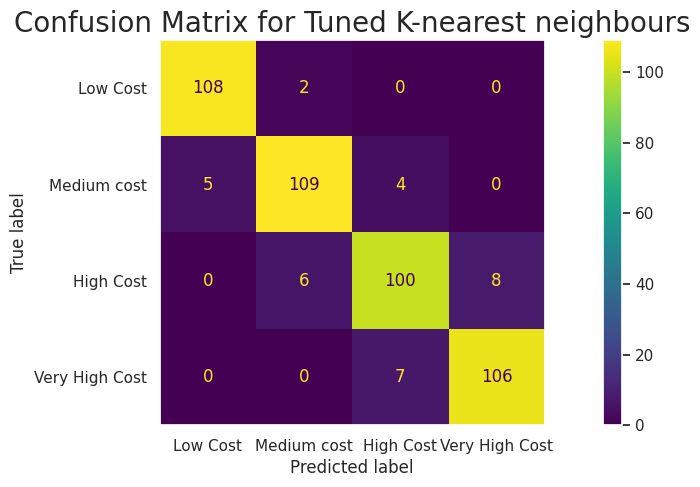

In [ ]:
# displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn2),display_labels = label).plot()
fig = disp.ax_.get_figure() 
plt.title('Confusion Matrix for Tuned K-nearest neighbours', fontsize = 20)
fig.set_figwidth(15)
fig.set_figheight(5) 
plt.grid(False)
plt.show()

In [ ]:
# classification report containing recall, precision and f1-score for the label classes 
print(classification_report(y_test, y_pred_knn2, target_names = label))

                precision    recall  f1-score   support

      Low Cost       0.96      0.98      0.97       110
   Medium cost       0.93      0.92      0.93       118
     High Cost       0.90      0.88      0.89       114
Very High Cost       0.93      0.94      0.93       113

      accuracy                           0.93       455
     macro avg       0.93      0.93      0.93       455
  weighted avg       0.93      0.93      0.93       455



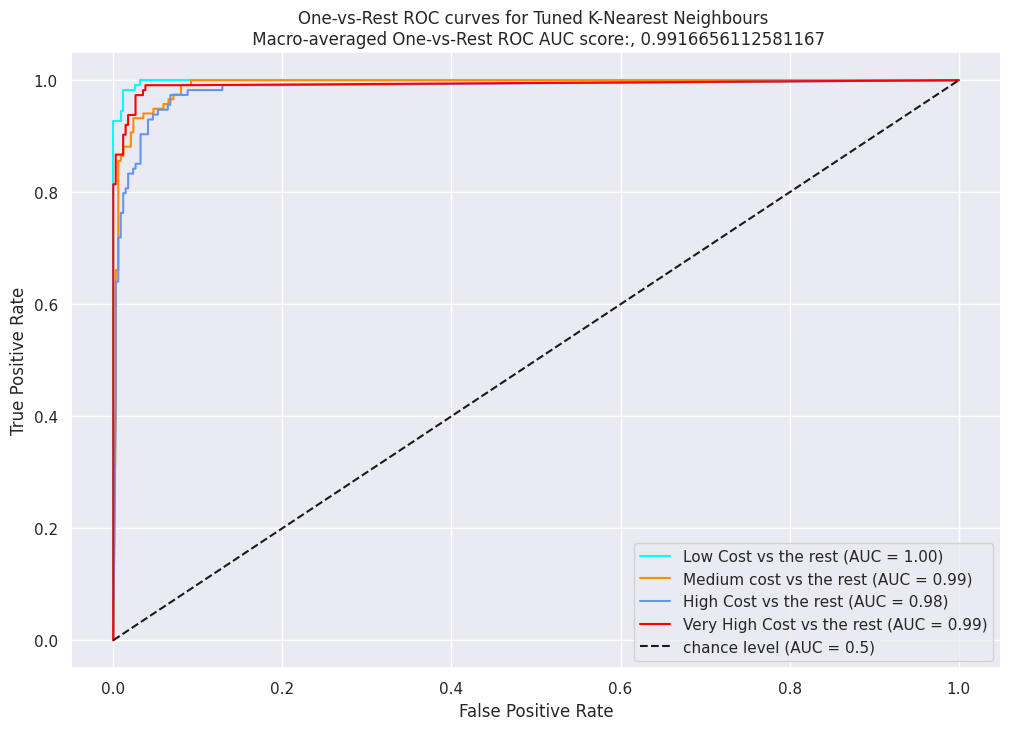

In [ ]:
# plotting roc curve for tuned K-Nearest Neighbours
plot_roc_curve(clf_knn2, 'Tuned K-Nearest Neighbours')

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a hyperparameter tuning technique that exhaustively searches over a predefined set of hyperparameters to find the optimal combination that yields the best performance of the model. Since knn is not a complex algorithm and we have less search space, we use gridsearchcv.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Again we see there is very less change in performance of model after hyperparameter tuning. However, accuracy on train set has increased to 100% meaning it has overfit.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have considered accuracy and roc-auc score as our main evaluation metrics.

Accuracy measures the proportion of correctly classified instances out of the total number of instances. In other words, accuracy is the ratio of the number of true positives and true negatives to the total number of instances. However, it can be misleading in imbalanced datasets where one class is much more prevalent than the other. So we also consider roc-auc score.

The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) of a classifier as the decision threshold is varied. The AUC score is the area under the ROC curve, and it provides a measure of the classifier's ability to distinguish between the positive and negative classes. An AUC score of 0.5 indicates a random classifier, while an AUC score of 1.0 indicates a perfect classifier. It is robust to imbalanced datasets and can provide insight into the classifier's performance across different decision thresholds.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After analyzing all the performance metrics for all the classifier models, we choose K-nearest neighbours classifier as our final prediction model. It has test accuracy of more than 92%, precision, recall and F1-score are all highest and roc-auc score is 0.99. Since we have already selected the model with k=7, the decision to tune the other hyperparameters is upto the user as after tuning, the performance is almost same.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

SHAP (SHapley Additive exPlanations) is an explainability tool for machine learning models that provides a unified way to interpret model predictions. SHAP measures the contribution of each feature to a prediction by considering all possible combinations of features and their values.

In [ ]:
# Get the model explainer object
explainer = shap.KernelExplainer(clf_knn.predict_proba, X_train)

# Get shap values for the test data observation whose index is 0, i.e. first observation in the test set
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap_values

[array([-0.03788205,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.000331  ,  0.02180448, -0.00543556, -0.22930795,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([-0.21512776,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.02901392, -0.04669276, -0.00982384,  0.        ,
         0.        ,  0.        ,  0.        , -0.0031802 ,  0.        ]),
 array([1.87096081e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.99534187e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.29629616e-03,
        4.63427015e-02, 5.04022838e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.57627330e-03, 0.00000000e+00]),
 array([ 0.06570798,  0.        ,  0.        ,  0.

In [ ]:
len(shap_values)

4

SHAP values is list of value which are assigned to each feature that indicates how much that feature contributed to the model's prediction for a particular instance. Since we have 4 output classes here, it contains 4 arrays, each array containing values for each feature's contribution. Now we plot the force plot for each output class.

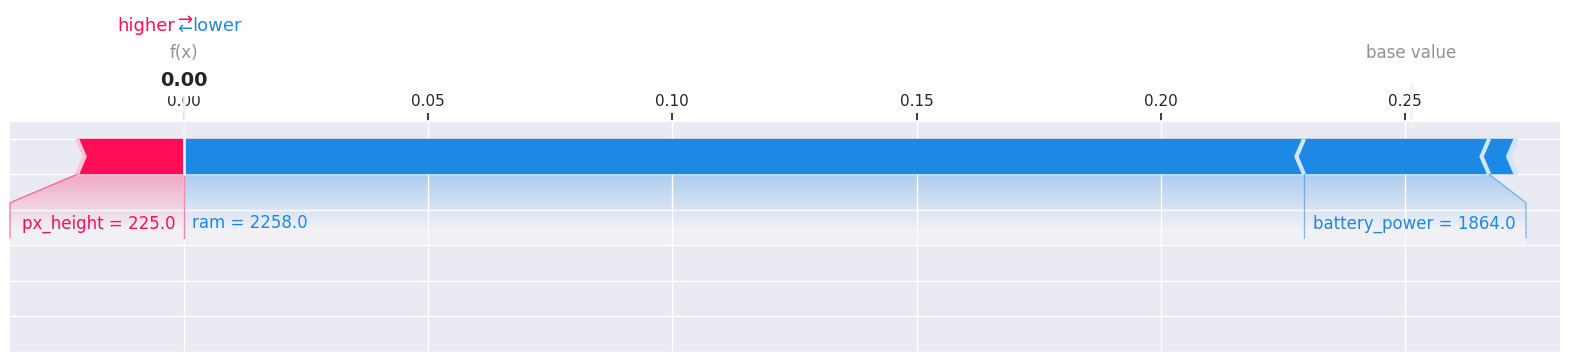

In [ ]:
# Force plot for Low cost
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:],matplotlib=True)

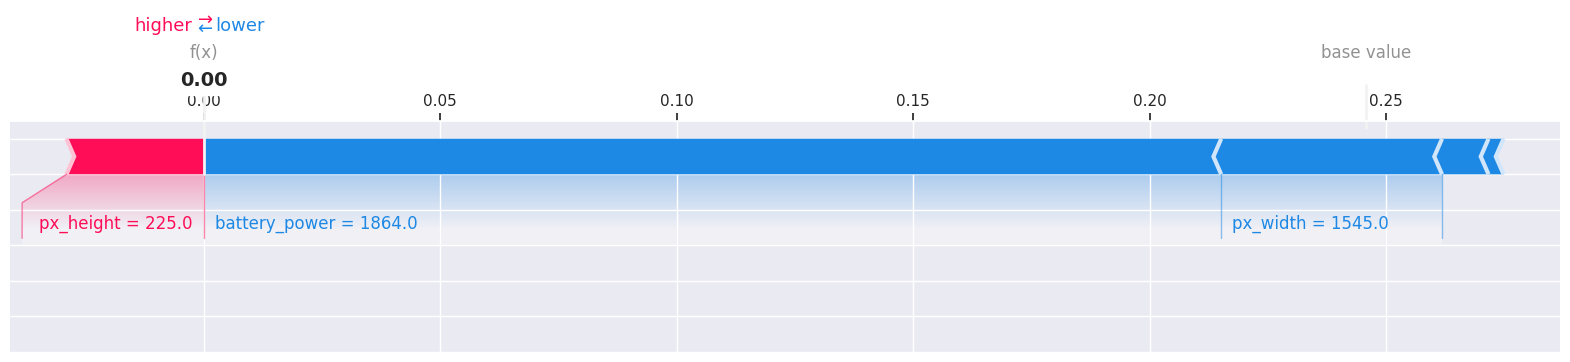

In [ ]:
# Force plot for Medium Cost
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0,:],matplotlib=True)

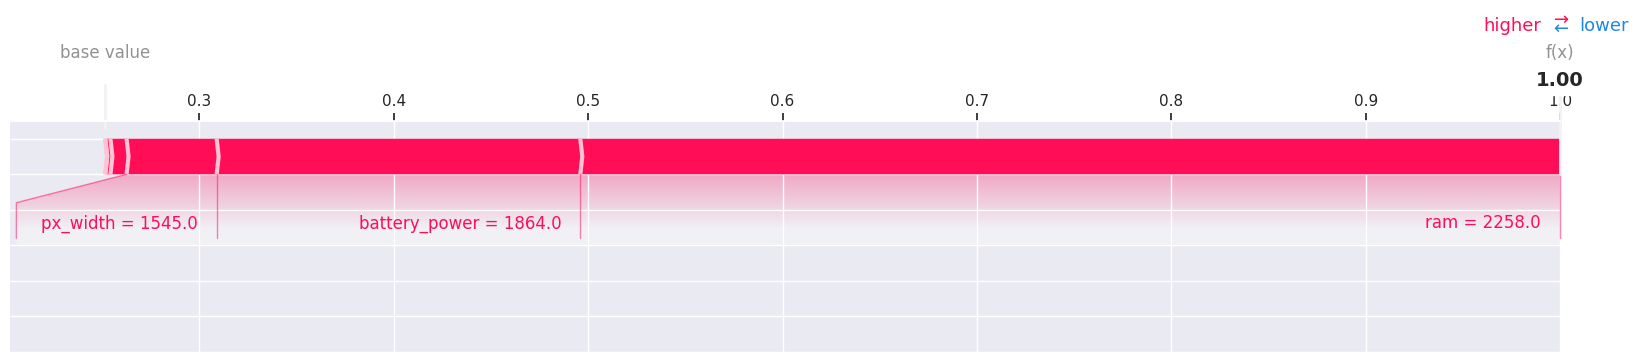

In [ ]:
# Force plot for High cost
shap.force_plot(explainer.expected_value[2], shap_values[2], X_test.iloc[0,:],matplotlib=True)

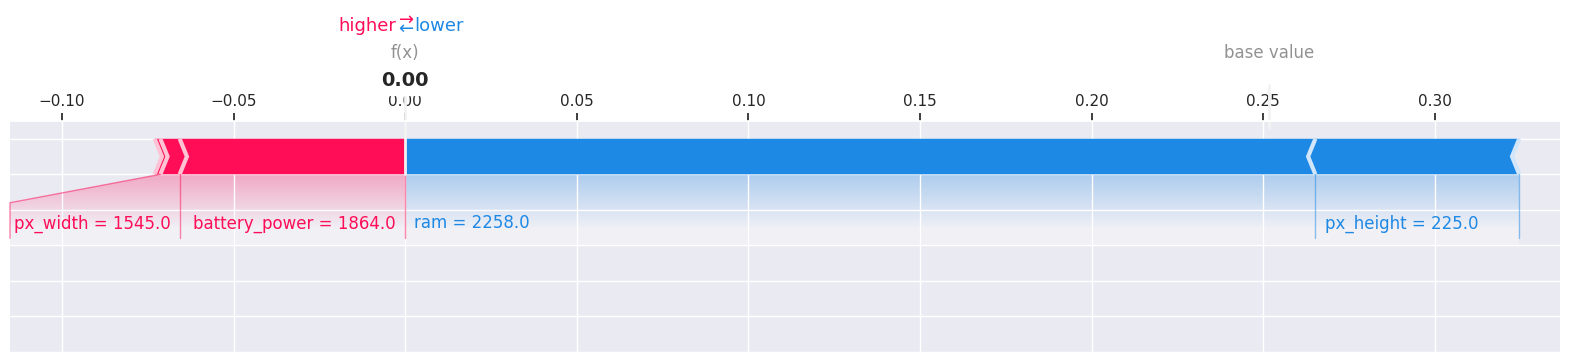

In [ ]:
# Force plot for Very High cost
shap.force_plot(explainer.expected_value[3], shap_values[3], X_test.iloc[0,:],matplotlib=True)

A force plot consists of a vertical bar chart that shows how much each feature contributes to the final prediction. The bar chart is oriented along the y-axis, with each feature represented by a horizontal bar. The length of the bar represents the magnitude of the contribution, and the color indicates whether the feature has a positive or negative impact on the prediction. The plot also includes a reference value, which is the base value of the prediction without any features considered. In other words, it represents what the model would predict if all the features were set to their average or default values.

The features that were important to making the prediction for this observation are shown in red and blue, with red representing features that pushed the model score higher, and blue representing features that pushed the score lower. Features that had more of an impact on the score are located closer to the dividing boundary between red and blue. We can estimate the magnitude of this impact by looking at the length of the bar for particular feature.

 By analyzing the summary plot, we can gain insights into Feature importance and feature directionality. We have four features which are most important in making predictions, RAM is the most important feature followed by battery power, then pixel width and then pixel height. Other features have negligible impact on the output of model. We now analyze each plot for each class.

 1. *Low Cost:* RAM and battery power work together negatively for Low class against pixel height, meaning if RAM or battery power is increased then probability for getting Low class as output is reduced and if pixel height is increased then probability for getting Low class is increased. RAM is more influential than battery power as it's closer to dividing line. RAM is almost more than 5 times more important than battery power which is inferred by approximately measuring the length of the bars.
 


 2. *Middle Cost:* Here, pixel width along with RAM and battery power work together negatively for Middle class against pixel height i.e. if any of pixel width, RAM or battery power is increased, then probability of getting output as Middle class is reduced and if pixel height is increased then probability for getting Middle class is increased. Here, battery power has most impact followed by pixel width and RAM.


 3. *High Cost:* Here RAM, battery power and pixel width work positively towards increasing the chances of getting High Cost i.e. if any of these is increased then probability of getting High class as output is increased. Features working against these 3 features have negligible impact. RAM has the most impact followed by battery power and pixel width. 

 4. *Very High Cost:* RAM and pixel height work together negatively for Low class against battery power and pixel width, meaning if RAM or pixel height is increased then probability for getting Very High class as output is reduced and if battery power or pixel width is increased then probability for getting Very High class is increased. RAM is more influential than pixel height in negative direction and battery power is more influential than pixel width in positive direction.
 

# Conclusion

After analyzing the performance of all the algorithms, we compare the algorithms by plotting the testing accuracy and the ROC-AUC score of each algorithms.   

In [ ]:
arr = np.array([[81.09,84.17,86.37,85.05,90.98,90.11,92.53,92.96],[.8734,0.9425,0.9746,0.9707,0.9861,0,0.9905,0.9916]])
comp_df = pd.DataFrame(arr,columns = ['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest','XGBoost','Tuned XGBoost','K-Nearest Neighbours',
                                        'Tuned K-Nearest Neighbours'], index = ['Testing Accuracy in %', 'ROC-AUC Curve'])
comp_df

Decision Tree  Tuned Decision Tree  Random Forest  \
Testing Accuracy in %        81.0900              84.1700        86.3700   
ROC-AUC Curve                 0.8734               0.9425         0.9746   

                       Tuned Random Forest  XGBoost  Tuned XGBoost  \
Testing Accuracy in %              85.0500  90.9800          90.11   
ROC-AUC Curve                       0.9707   0.9861           0.00   

                       K-Nearest Neighbours  Tuned K-Nearest Neighbours  
Testing Accuracy in %               92.5300                     92.9600  
ROC-AUC Curve                        0.9905                      0.9916

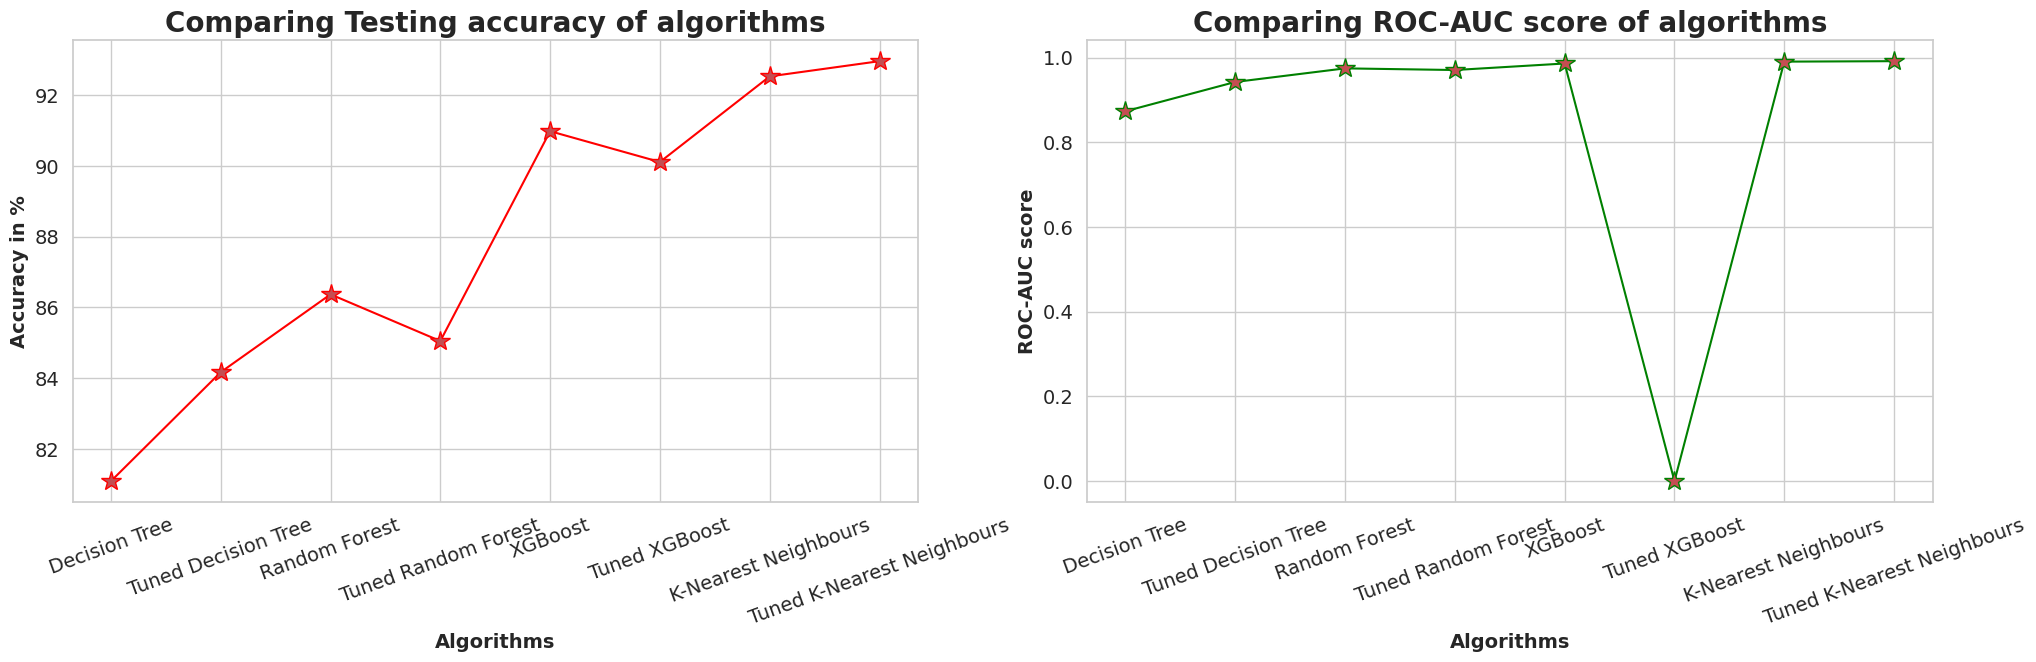

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (24,6))
plt.subplot(121)
comp_df.T['Testing Accuracy in %'].plot(fontsize = 14,color = 'red',marker = '*', mfc = 'r', ms = 15)
plt.title('Comparing Testing accuracy of algorithms', fontsize = 20, fontweight='bold')
plt.xlabel('Algorithms', fontsize = 14, fontweight='bold')
plt.ylabel('Accuracy in %', fontsize = 14, fontweight='bold')
plt.xticks(rotation=20)
plt.subplot(122)
comp_df.T['ROC-AUC Curve'].plot(fontsize = 14,color = 'green',marker = '*', mfc = 'r', ms = 15)
plt.title('Comparing ROC-AUC score of algorithms', fontsize = 20, fontweight='bold')
plt.xlabel('Algorithms', fontsize = 14, fontweight='bold')
plt.ylabel('ROC-AUC score', fontsize = 14, fontweight='bold')
plt.xticks(rotation=20)
plt.show()

1.   K-nearest Neighbors algorithm has performed the best classification on this data, followed by XGboost with test accuracy of 92.53% and roc-auc score of 0.9905. 

2.   RAM is the most important feature which decides the classification. Battery power, Pixel-width and pixel height are the next most important features. RAM and pixel height try to keep the output to 'High Cost' while battery power and pixel width push the output to as high as they can. 

3.   Every algorithm has performed best classification for the extreme classes of 'Low Cost' and 'Very High Cost' and performed relatively bad for the middle classes of 'Medium Cost' and 'High Cost'.

